# README

Before execute the code above in google colab, execute the steps of section "**Steps for run in Google Colab**". These steps will configure the execution environment in colab, with all requirements necessaries. Otherwhise, skip to section "**Library**".

# Steps for run in Google Colab

## FIRST HERE! Accessing Google Drive from Google Colab

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Install [python 3.8](https://stackoverflow.com/a/71512702/13976785)

### Run de commands below

In [ ]:
!apt install chromium-chromedriver
#!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.10.3-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y jupyter
!conda install -q -y google-colab -c conda-forge
!python -m ipykernel install --name "py38" --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 20 not upgraded.
Need to get 95.6 MB of archives.
After this operation, 321 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 108.0.5359.71-0ubuntu0.18.04.5 [1,159 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 108.0.5359.71-0ubuntu0.18

### Before check the current version, save the file (Ctrl+s) and reload the page (F5) and than check the current version

In [ ]:
import sys
print("User Current Version:-", sys.version)

User Current Version:- 3.8.10 (default, Jun  4 2021, 15:09:15) 
[GCC 7.5.0]


## Move to the project directory



> **WARNING: For this step you will need to have downloaded the repository on your google drive. [How to do here](https://colab.research.google.com/drive/156ye97gzuYg4jFlL49495WQy9t-_oJnH?authuser=2#scrollTo=NNQ-wTalk-Fn).** 



In [ ]:
%cd /content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/run_analysis_reports_target_categoria_04012023/precoce-ms-classification
!pwd

/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/run_analysis_reports_target_categoria_04012023/precoce-ms-classification
/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/run_analysis_reports_target_categoria_04012023/precoce-ms-classification


### Install requirements

#### Instaling project requirements

In [ ]:
!pip install -U -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60 kB 3.0 MB/s 
     |████████████████████████████████| 45 kB 3.1 MB/s 
     |████████████████████████████████| 160 kB 10.5 MB/s 
     |████████████████████████████████| 6.6 MB 48.3 MB/s 
     |████████████████████████████████| 1.8 MB 55.9 MB/s 
     |████████████████████████████████| 944 kB 50.2 MB/s 
     |████████████████████████████████| 158 kB 59.2 MB/s 
     |████████████████████████████████| 61 kB 7.8 MB/s 
     |████████████████████████████████| 132 kB 73.8 MB/s 
     |████████████████████████████████| 750 kB 67.9 MB/s 
     |████████████████████████████████| 297 kB 71.7 MB/s 
     |████████████████████████████████| 81 kB 7.7 MB/s 
     |████████████████████████████████| 132 kB 69.9 MB/s 
     |████████████████████████████████| 88 kB 7.0 MB/s 
     |████████████████████████████████| 1.2 MB 70.0 MB/s 
     |████████████████████████████████| 1

#### Restart [runtime](https://stackoverflow.com/a/53165687/13976785)

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
# Another way, if first doesn't work
exit()

#### Move to the project folder, again

In [ ]:
%cd /content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/run_analysis_reports_target_categoria_04012023/precoce-ms-classification
!pwd

/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/run_analysis_reports_target_categoria_04012023/precoce-ms-classification
/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/run_analysis_reports_target_categoria_04012023/precoce-ms-classification


# Library

In [ ]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import csv_treatments
import pre_processing
import reports
import utils
import settings

# Settings

In [ ]:
# Some settings are configured by default. If you want to change any settings,
# just follow the instruction for the specific setting. For more information, view the settings.py file.

# Number of jobs to run in parallel
settings.n_jobs = -1

# Folder path where the CSV file is located
settings.dataset_folder_path = '/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/base_dados/'
# settings.dataset_folder_path = '/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/base_dados/'

# Path to the dataset
settings.csv_path = csv_treatments.choose_csv_path(
        sampling='after_correlation-05-11-2022_18:16:37', folder_path=settings.dataset_folder_path)

# List with columns to delete when loading dataset
settings.delete_columns_names_on_load_data = [
    'DataAbate',
    'Frigorifico_ID', 'Frigorifico_CNPJ', 'Frigorifico_RazaoSocial', 'Municipio_Frigorifico',
    'EstabelecimentoIdentificador', 'Data_homol', 'Questionario_ID',
    'area so confinamento', 'Lista Trace', 'Motivo', 'data_homol_select', 'dif_datas',
    'DataAbate_6m_ANT', 'data12m', 'data6m', 'data3m', 'data1m', 'data7d',
    'tot7d_Chuva', 'med7d_TempInst', 'med7d_TempMin', 'med7d_UmidInst', 'med7d_formITUmax', 'med7d_NDVI', 'med7d_EVI',
    'tot1m_Chuva', 'med1m_TempInst', 'med1m_UmidInst', 'med1m_NDVI', 'med1m_EVI',
    'tot3m_Chuva', 'med3m_TempInst', 'med3m_UmidInst', 'med3m_formITUmax', 'med3m_NDVI', 'med3m_EVI',
    'tot6m_Chuva', 'med6m_TempInst', 'med6m_UmidInst', 'med6m_NDVI', 'med6m_EVI',
    'tot12m_Chuva', 'med12m_TempInst', 'med12m_TempMin', 'med12m_UmidInst', 'med12m_NDVI', 'med12m_EVI',
]

# Dict with ordinal encoding
# settings.ordinal_encoder_columns_names.update(
#     {
#         'DataAbate': None
#     }
# )
settings.ordinal_encoder_columns_names.pop('CATEGORIA')

# List with column names to apply the label encoder
settings.label_encoder_columns_names = [
    'CATEGORIA', 'classificacao'
]

# List with column names to apply the one hot encoder
settings.one_hot_encoder_columns_names = [
    'EstabelecimentoMunicipio', 'Tipificacao', 'ANO'
]

# List with column names to apply the min max scaler
settings.min_max_scaler_columns_names = [
    'Peso',
    'med7d_formITUinst', 'med7d_preR_soja', 'med7d_preR_milho', 'med7d_preR_boi',
    'med1m_formITUinst', 'med1m_preR_soja', 'med1m_preR_milho', 'med1m_preR_boi',
    'med3m_formITUinst', 'med3m_preR_soja', 'med3m_preR_milho', 'med3m_preR_boi',
    'med6m_formITUinst', 'med6m_preR_soja', 'med6m_preR_milho', 'med6m_preR_boi',
    'med12m_formITUinst', 'med12m_preR_soja', 'med12m_preR_milho', 'med12m_preR_boi'
]

# List with column names to drop feature by correlation
# I choise the features greater than or equal to threshold 0.95, because the spearman correlation
# matrix showed that there are some features that are highly correlated
settings.columns_names_drop_feature_by_correlation = [
    'med7d_preR_soja', 'med1m_preR_soja', 'med3m_preR_soja', 'med6m_preR_soja', 'med12m_preR_soja',
    'med7d_preR_milho',
    'med7d_preR_boi', 'med1m_preR_boi', 'med3m_preR_boi', 'med6m_preR_boi',
    'med3m_formITUinst',
    'cnt3m_CL_ITUinst',
    'Maturidade', 'Acabamento', 'Peso', 'classificacao', 'CATEGORIA'
]

# Class column name
settings.class_column = 'CATEGORIA'

# CSV Treatments

## Load dataset

In [6]:
# Load the dataset
# precoce_ms_data_frame = csv_treatments.load_data(
#     csv_path=settings.csv_path, delete_columns_names=settings.delete_columns_names_on_load_data,
#     number_csv_lines=settings.number_csv_lines, dtype_dict=settings.dtype_dict, parse_dates=settings.parse_dates
# )

# Load the dataset without the parse_dates parameter, for data set after excluded the date columns (i.e. 'DataAbate')
precoce_ms_data_frame = csv_treatments.load_data(
    csv_path=settings.csv_path, delete_columns_names=settings.delete_columns_names_on_load_data,
    number_csv_lines=settings.number_csv_lines, dtype_dict=settings.dtype_dict
)


*****INICIO LOAD DATA******

*****INICIO PRINT INFOS******
Número total de linhas do DataFrame: 2543061
Número de colunas: 55
Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543061 entries, 0 to 2543060
Data columns (total 55 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   DataAbate                         object  
 1   Maturidade                        category
 2   Acabamento                        category
 3   Peso                              float32 
 4   QuestionarioClassificacaoEstabel  uint8   
 5   FERTIIRRIGACAO                    uint8   
 6   ILP                               uint8   
 7   IFP                               uint8   
 8   ILPF                              uint8   
 9   CONCEN_VOLUM                      UInt8   
 10  CREEPFEEDING                      UInt8   
 11  FORN_ESTRAT_SILAGEM               UInt8   
 12  PROTEICO                          UInt8   
 13  PROTEICO_

# Reports

## All attributes

In [ ]:
# Print a report of all attributes
reports.all_attributes(data_frame=precoce_ms_data_frame)



*****INICIO RELATÓRIO ATRIBUTOS******
Número de atributos: 64
Nome dos atributos: ['ID_ANIMAL', 'EstabelecimentoMunicipio', 'Tipificacao', 'Maturidade', 'Acabamento', 'Peso', 'QuestionarioClassificacaoEstabel', 'FERTIIRRIGACAO', 'ILP', 'IFP', 'ILPF', 'CONCEN_VOLUM', 'CREEPFEEDING', 'FORN_ESTRAT_SILAGEM', 'PROTEICO', 'PROTEICO_ENERGETICO', 'RACAO_BAL_CONS_INFERIOR', 'SAL_MINERAL', 'SALMINERAL_UREIA', 'RACAOO_BAL_CONSUMO_IG', 'GRAO_INTEIRO', 'ALTO_CONCENTR_VOLUM', 'ALTO_CONCENTRADO', 'QuestionarioPossuiOutrosIncentiv', 'QuestionarioFabricaRacao', 'regua de manejo', 'boa cobertura vegetal, com baixa', 'erosaoo laminar ou em sulco igua', 'identificacao individual', 'rastreamento SISBOV', 'BPA', 'participa de aliancas mercadolog', 'QuestionarioPraticaRecuperacaoPa', 'Confinamento', 'Suplementacao_a_campo', 'SemiConfinamento', 'med7d_formITUinst', 'med7d_preR_soja', 'med7d_preR_milho', 'med7d_preR_boi', 'med1m_formITUinst', 'med1m_preR_soja', 'med1m_preR_milho', 'med1m_preR_boi', 'med3m_for

## Delete duplicate rows by attribute, and print the report

In [ ]:
# Delete the duplicated rows by attribute, and print the report
precoce_ms_data_frame = pre_processing.delete_duplicate_rows_by_attribute(
    data_frame=precoce_ms_data_frame, attribute_name='ID_ANIMAL', print_report=True)

precoce_ms_data_frame = utils.delete_columns(
    data_frame=precoce_ms_data_frame, delete_columns_names=['ID_ANIMAL'])



*****INICIO DELETE DUPLICATE ROWS BY ATTRIBUTE******
Linhas duplicadas encontradas para o atributo ID_ANIMAL.

*****INICIO RELATÓRIO LINHAS DUPLICADAS******
Data Frame do Atríbuto ID_ANIMAL com as linhas duplicadas:



ID_ANIMAL EstabelecimentoMunicipio  ... CATEGORIA classificacao
2361947    3326125             BANDEIRANTES  ...        BB           SIM
2361946    3326125             BANDEIRANTES  ...        BB           SIM
2361949    3326126             BANDEIRANTES  ...         D           NÃO
2361957    3326126             BANDEIRANTES  ...         D           NÃO
2361945    3326127             BANDEIRANTES  ...         D           NÃO
2361955    3326127             BANDEIRANTES  ...         D           NÃO
2361956    3326128             BANDEIRANTES  ...         D           NÃO
2361959    3326128             BANDEIRANTES  ...         D           NÃO
2361950    3326129             BANDEIRANTES  ...        BB           SIM
2361943    3326129             BANDEIRANTES  ...        BB           SIM
2361958    3326130             BANDEIRANTES  ...        AA           SIM
2361960    3326130             BANDEIRANTES  ...        AA           SIM
2361942    3326131             BANDEIRANTES  ...        BB           SIM
2361904    3326131             BANDEIRANTES  ...        BB           SIM
2361920    3326132             BANDEIRANTES  ...        BB           SIM
2361983    3326132             BANDEIRANTES  ...        BB           SIM
2361941    3326133             BANDEIRANTES  ...         D           NÃO
2361940    3326133             BANDEIRANTES  ...         D           NÃO
2361906    3326134             BANDEIRANTES  ...         D           NÃO
2361912    3326134             BANDEIRANTES  ...         D           NÃO
2361939    3326135             BANDEIRANTES  ...         D           NÃO
2361981    3326135             BANDEIRANTES  ...         D           NÃO
2361909    3326136             BANDEIRANTES  ...         D           NÃO
2361908    3326136             BANDEIRANTES  ...         D           NÃO
2361915    3326137             BANDEIRANTES  ...        BB           SIM
2361938    3326137             BANDEIRANTES  ...        BB           SIM
2361911    3326138             BANDEIRANTES  ...         D           NÃO
2361979    3326138             BANDEIRANTES  ...         D           NÃO
2361980    3326139             BANDEIRANTES  ...        BB           SIM
2361937    3326139             BANDEIRANTES  ...        BB           SIM
2361914    3326140             BANDEIRANTES  ...         D           NÃO
2361928    3326140             BANDEIRANTES  ...         D           NÃO
2361935    3326141             BANDEIRANTES  ...         D           NÃO
2361936    3326141             BANDEIRANTES  ...         D           NÃO
2361921    3326142             BANDEIRANTES  ...         D           NÃO
2361918    3326142             BANDEIRANTES  ...         D           NÃO
2361982    3326143             BANDEIRANTES  ...        BB           SIM
2361934    3326143             BANDEIRANTES  ...        BB           SIM
2361948    3326144             BANDEIRANTES  ...        BB           SIM
2361923    3326144             BANDEIRANTES  ...        BB           SIM
2361933    3326145             BANDEIRANTES  ...        AA           SIM
2361924    3326145             BANDEIRANTES  ...        AA           SIM
2361954    3326146             BANDEIRANTES  ...        AA           SIM
2361926    3326146             BANDEIRANTES  ...        AA           SIM
2361932    3326147             BANDEIRANTES  ...       BBB           SIM
2361961    3326147             BANDEIRANTES  ...       BBB           SIM
2361951    3326148             BANDEIRANTES  ...         D           NÃO
2361931    3326148             BANDEIRANTES  ...         D           NÃO
2361930    3326149             BANDEIRANTES  ...       BBB           SIM
2361929    3326149             BANDEIRANTES  ...       BBB           SIM
2361978    3326150             BANDEIRANTES  ...        AA           SIM
2361927    3326150             BANDEIRANTES  ...        AA           SIM
2361925    3326151             BANDEIRANTES  ...       BBB           SIM
2361962    3326151             BANDEIRANTES  ...       BBB         

Relatório dos atributos que divergem, entre os registros que tem o atributo ID_ANIMAL igual.
ID_ANIMAL:3326125
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361946    1
2361947    0
Name: identificacao individual, dtype: UInt8
-------------------------------
Próximo ++++++++++++++
ID_ANIMAL:3326126
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361949    1
2361957    0
Name: identificacao individual, dtype: UInt8
-------------------------------
Próximo ++++++++++++++
ID_ANIMAL:3326127
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361945    0
2361955    1
Name: identificacao individual, dtype: UInt8
-------------------------------
Próximo ++++++++++++++
ID_ANIMAL:3326128
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361956    0
2361959    1
Name: identificacao individual, dtype: 

## NaN attributes


*****INICIO DELETE NAN ROWS******
Linhas com valores NaN encontradas.

*****INICIO RELATÓRIO ATRIBUTOS NAN******
Total de Ocorrencia de NaN no DataFrame: 1243483
Linhas com valores NaN:         EstabelecimentoMunicipio     Tipificacao  ... CATEGORIA classificacao
2046                 SIDROLANDIA   Macho Inteiro  ...        BB           SIM
2047                 SIDROLANDIA   Macho Inteiro  ...        BB           SIM
2048                 SIDROLANDIA  Macho Castrado  ...       AAA           SIM
2049                 SIDROLANDIA   Macho Inteiro  ...        BB           SIM
2050                 SIDROLANDIA  Macho Castrado  ...        AA           SIM
...                          ...             ...  ...       ...           ...
3153193                   TACURU  Macho Castrado  ...        BB           SIM
3153194                   TACURU  Macho Castrado  ...        BB           SIM
3153195                   TACURU  Macho Castrado  ...       AAA           SIM
3153196                   TACURU 

Coluna total_NaN  Porcentagem
0  boa cobertura vegetal, com baixa    610286    19.352582
0  erosaoo laminar ou em sulco igua    610286    19.352582
0               rastreamento SISBOV       920     0.029174
0                   med7d_preR_soja       527     0.016712
0                   med1m_preR_soja       527     0.016712
0                  med1m_preR_milho       527     0.016712
0                    med1m_preR_boi       527     0.016712
0                 med3m_formITUinst       527     0.016712
0                   med3m_preR_soja       527     0.016712
0                  med3m_preR_milho       527     0.016712
0                    med3m_preR_boi       527     0.016712
0                 med6m_formITUinst       527     0.016712
0                   med6m_preR_soja       527     0.016712
0                    med7d_preR_boi       527     0.016712
0                  med6m_preR_milho       527     0.016712
0                    med6m_preR_boi       527     0.016712
0                med12m_formITUinst       527     0.016712
0                  med12m_preR_soja       527     0.016712
0                 med12m_preR_milho       527     0.016712
0                   med12m_preR_boi       527     0.016712
0                  cnt7d_CL_ITUinst       527     0.016712
0                  cnt1m_CL_ITUinst       527     0.016712
0                  cnt3m_CL_ITUinst       527     0.016712
0                  cnt6m_CL_ITUinst       527     0.016712
0                 med1m_formITUinst       527     0.016712
0                 cnt12m_CL_ITUinst       527     0.016712
0                  med7d_preR_milho       527     0.016712
0                 med7d_formITUinst       527     0.016712
0               ALTO_CONCENTR_VOLUM       464     0.014714
0               FORN_ESTRAT_SILAGEM       464     0.014714
0                          PROTEICO       464     0.014714
0               PROTEICO_ENERGETICO       464     0.014714
0           RACAO_BAL_CONS_INFERIOR       464     0.014714
0                       SAL_MINERAL       464     0.014714
0                  SALMINERAL_UREIA       464     0.014714
0             RACAOO_BAL_CONSUMO_IG       464     0.014714
0                      GRAO_INTEIRO       464     0.014714
0                  ALTO_CONCENTRADO       464     0.014714
0                      CREEPFEEDING       464     0.014714
0                   regua de manejo       464     0.014714
0          identificacao individual       464     0.014714
0                               BPA       464     0.014714
0  participa de aliancas mercadolog       464     0.014714
0                      Confinamento       464     0.014714
0             Suplementacao_a_campo       464     0.014714
0                  SemiConfinamento       464     0.014714
0                      CONCEN_VOLUM       464     0.014714

A matrix representation of the missing values (white) by variable


tcmalloc: large alloc 2384060416 bytes == 0x559c6b48e000 @  0x7f4daff3f001 0x7f4dab1d9fae 0x7f4dab1da88e 0x7f4dab238d17 0x7f4dab23a86a 0x7f4dab2d8b9b 0x559bd450a753 0x559bd44e0cc7 0x559bd4533066 0x559bd453385f 0x559bd44e1149 0x559bd4533066 0x559bd453385f 0x559bd4507ede 0x559bd4566120 0x559bd4533132 0x559bd453385f 0x559bd44e0cc7 0x559bd4533066 0x559bd453385f 0x559bd4507ede 0x559bd4566120 0x559bd4533132 0x559bd453385f 0x559bd44e0cc7 0x559bd45329c9 0x559bd457ce8f 0x559bd450a61d 0x559bd44e0e14 0x559bd451dd84 0x559bd44e0fab
tcmalloc: large alloc 1579425792 bytes == 0x559d22742000 @  0x7f4daff3d1e7 0x7f4dab1da064 0x7f4dab1da7ff 0x7f4dab238f55 0x7f4dab2390b6 0x7f4dab2c8fd4 0x7f4dab2cc5f9 0x559bd4562ab4 0x559bd4533066 0x559bd453385f 0x559bd44e1149 0x559bd4533066 0x559bd453385f 0x559bd4507ede 0x559bd4566120 0x559bd4533132 0x559bd453385f 0x559bd44e0cc7 0x559bd4533066 0x559bd453385f 0x559bd4507ede 0x559bd4566120 0x559bd4533132 0x559bd453385f 0x559bd44e0cc7 0x559bd45329c9 0x559bd457ce8f 0x559bd450

*****FIM RELATÓRIO ATRIBUTOS NAN******
Function nan_attributes Took 0:00:18.200722

*****FIM DELETE NAN ROWS*********
Function delete_nan_rows Took 0:00:19.936265


*****INICIO PRINT INFOS******
Número total de linhas do DataFrame: 2543061
Número de colunas: 63
Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2543061 entries, 0 to 3153592
Data columns (total 63 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   EstabelecimentoMunicipio          category
 1   Tipificacao                       category
 2   Maturidade                        category
 3   Acabamento                        category
 4   Peso                              float32 
 5   QuestionarioClassificacaoEstabel  uint8   
 6   FERTIIRRIGACAO                    uint8   
 7   ILP                               uint8   
 8   IFP                               uint8   
 9   ILPF                              uint8   
 10  CONCEN_VOLUM      

tcmalloc: large alloc 3178741760 bytes == 0x559d98df0000 @  0x7f4daff3f001 0x7f4dab1d9fae 0x7f4dab1da88e 0x7f4dab238d17 0x7f4dab23a86a 0x7f4dab2d8b9b 0x559bd450a753 0x559bd44e0cc7 0x559bd4533768 0x559bd44e0e14 0x559bd4533066 0x559bd453e4c6 0x559bd44e0cc7 0x559bd4533066 0x559bd453385f 0x559bd44e1254 0x559bd45329c9 0x559bd45337fb 0x559bd44e0e14 0x559bd4533132 0x559bd45337fb 0x559bd44e1254 0x559bd4533132 0x559bd453385f 0x559bd44e1149 0x559bd4533132 0x559bd45337fb 0x559bd44e0e14 0x559bd4533132 0x559bd45337fb 0x559bd44e1254
tcmalloc: large alloc 3178741760 bytes == 0x559e5656c000 @  0x7f4daff3f001 0x7f4dab1d9fae 0x7f4dab1da88e 0x7f4dab238d17 0x7f4dab23a86a 0x7f4dab2d8b9b 0x559bd450a753 0x559bd44e0cc7 0x559bd4533768 0x559bd44e0e14 0x559bd4533066 0x559bd453e4c6 0x559bd44e0cc7 0x559bd4533066 0x559bd453385f 0x559bd44e1254 0x559bd45329c9 0x559bd45337fb 0x559bd44e0e14 0x559bd4533132 0x559bd45337fb 0x559bd44e1254 0x559bd4533132 0x559bd453385f 0x559bd44e1149 0x559bd4533132 0x559bd45337fb 0x559bd44e

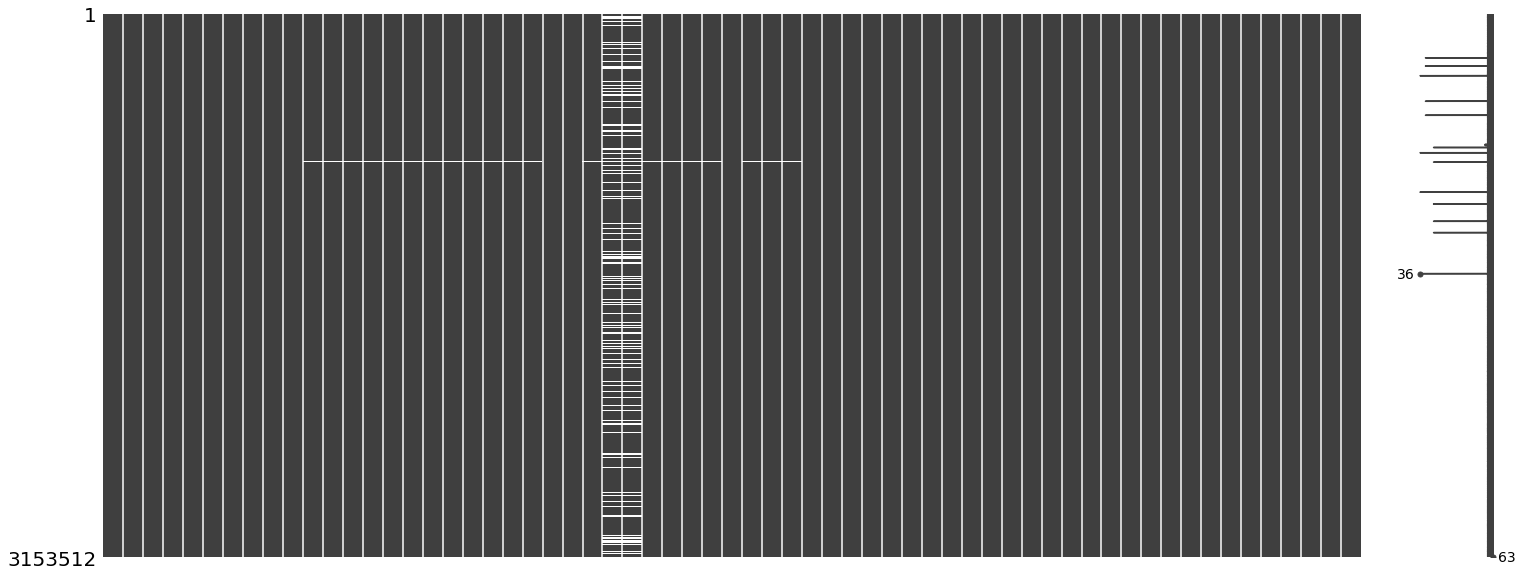

In [ ]:
# Delete NaN rows
precoce_ms_data_frame = pre_processing.delete_nan_rows(
    data_frame=precoce_ms_data_frame, print_report=True)

reports.informations(data_frame=precoce_ms_data_frame)


## Convert pandas dtypes to numpy dtypes

In [7]:
# Convert pandas dtypes to numpy dtypes, some operations doesn't work with pandas dtype, for exemple, the XGBoost models
precoce_ms_data_frame = utils.convert_pandas_dtype_to_numpy_dtype(
    data_frame=precoce_ms_data_frame, pandas_dtypes=[pd.UInt8Dtype()])


## Print histogram for each attribute


*****INICIO IMPRIMIR HISTOGRAM******


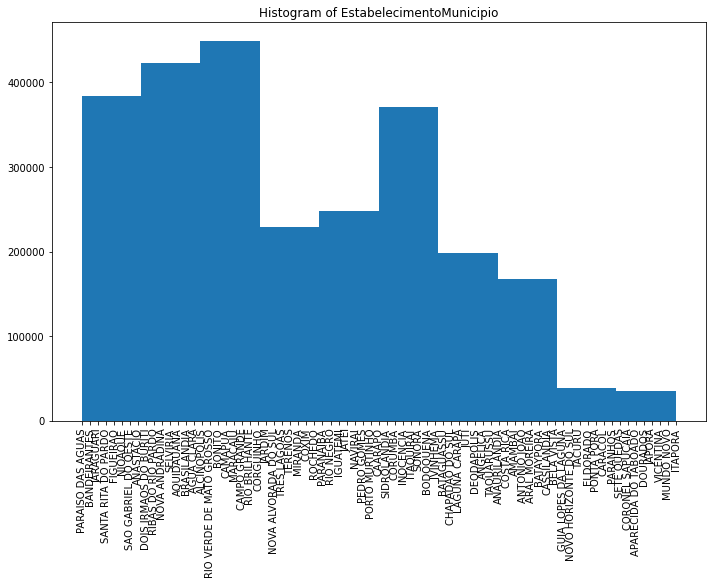

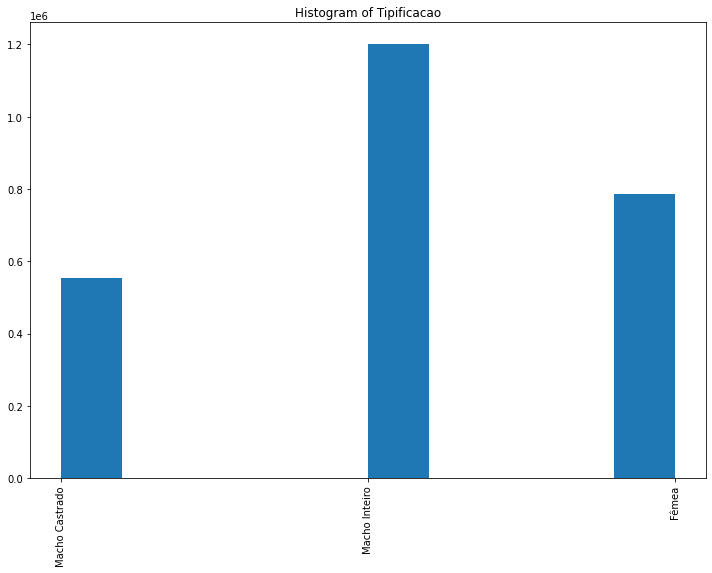

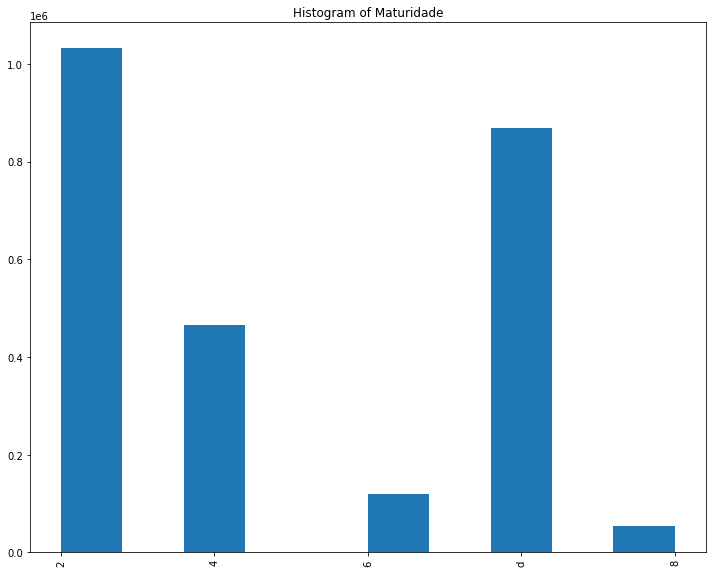

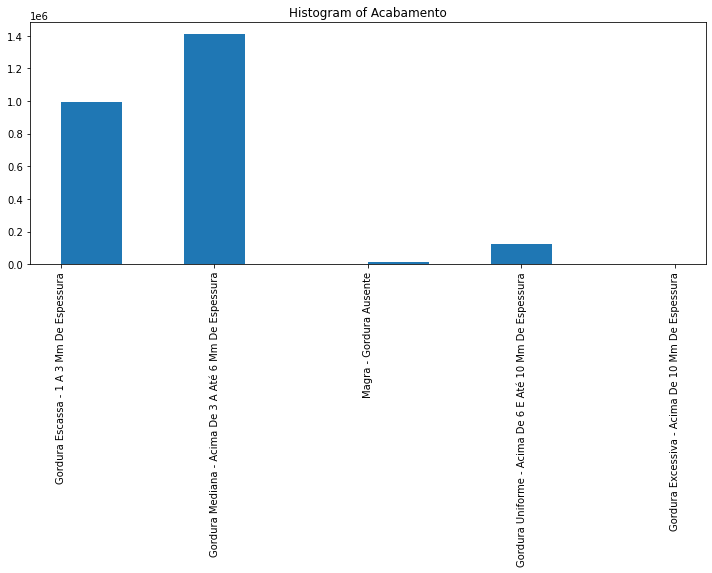

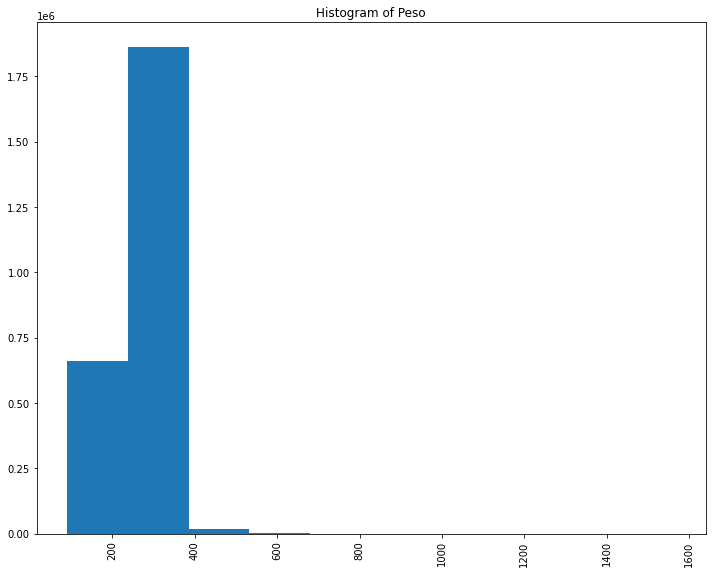

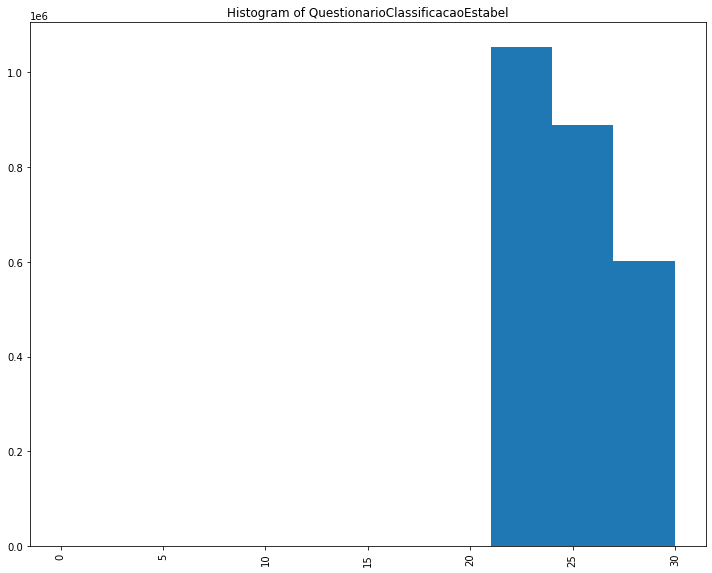

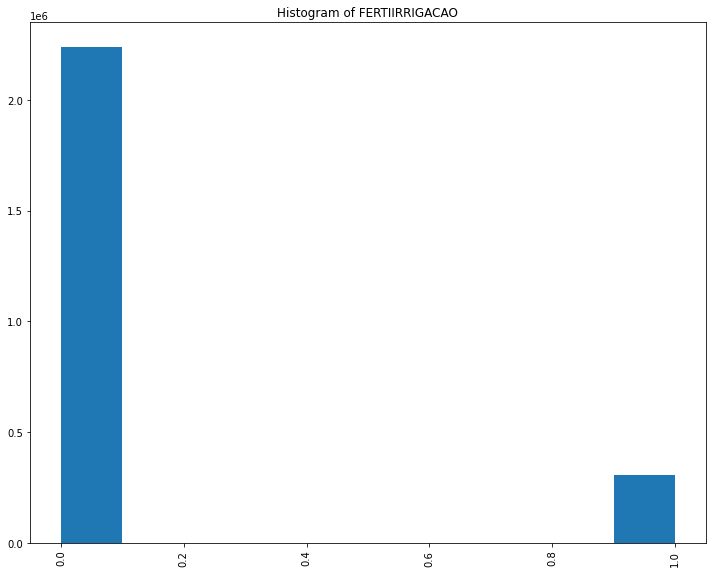

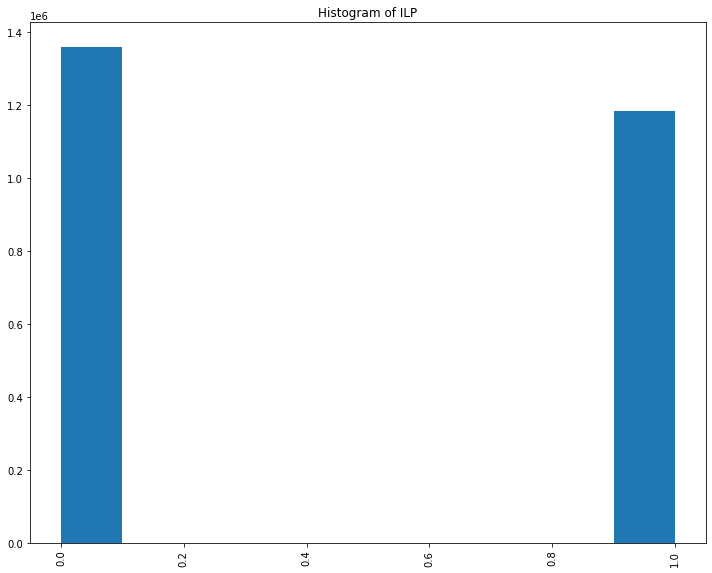

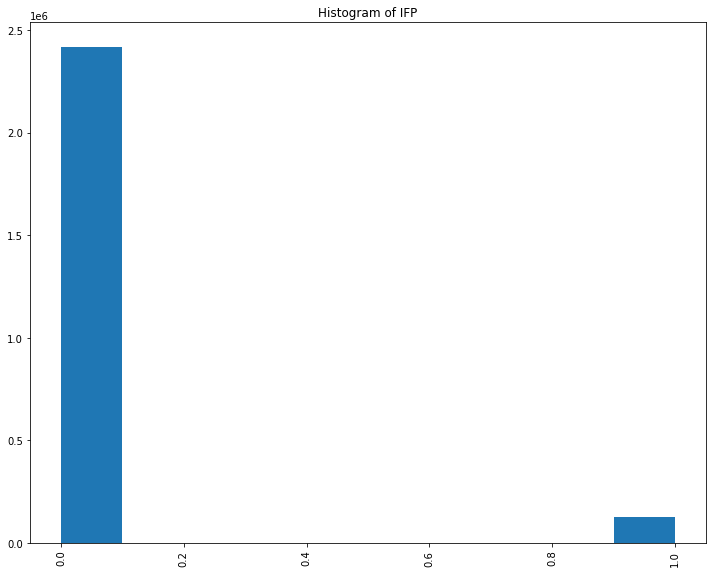

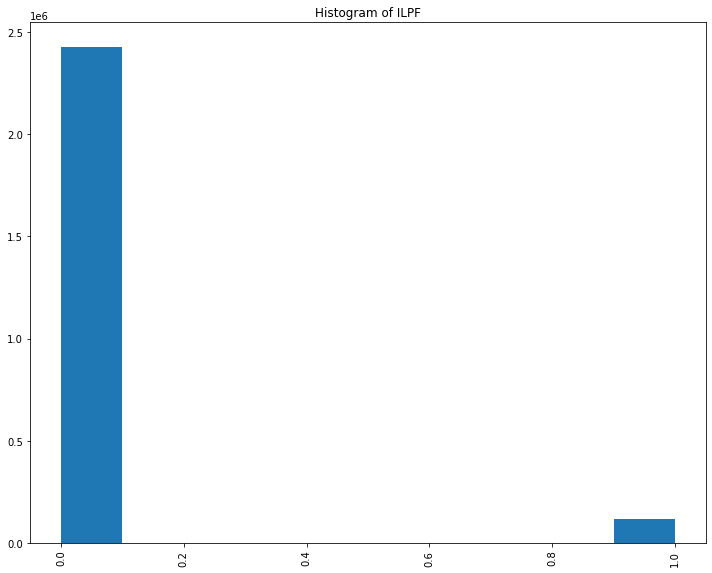

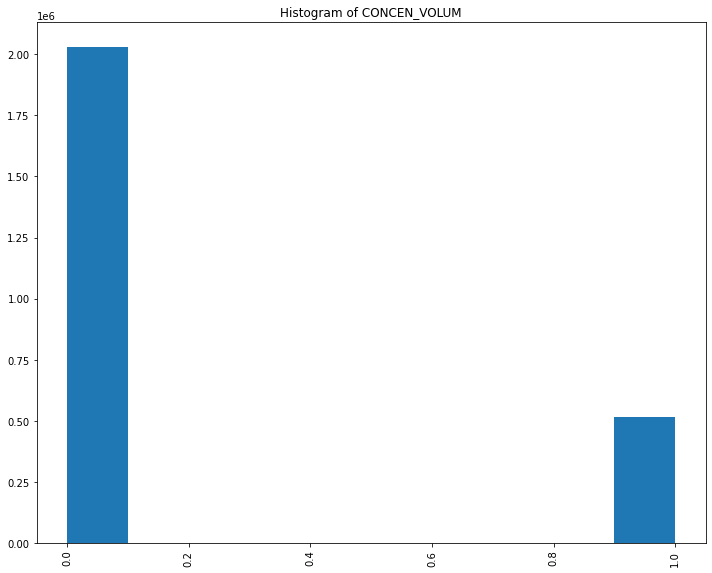

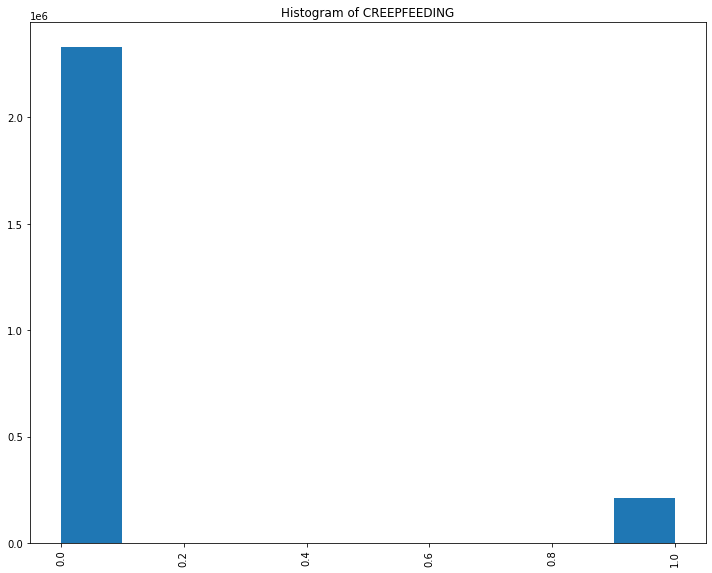

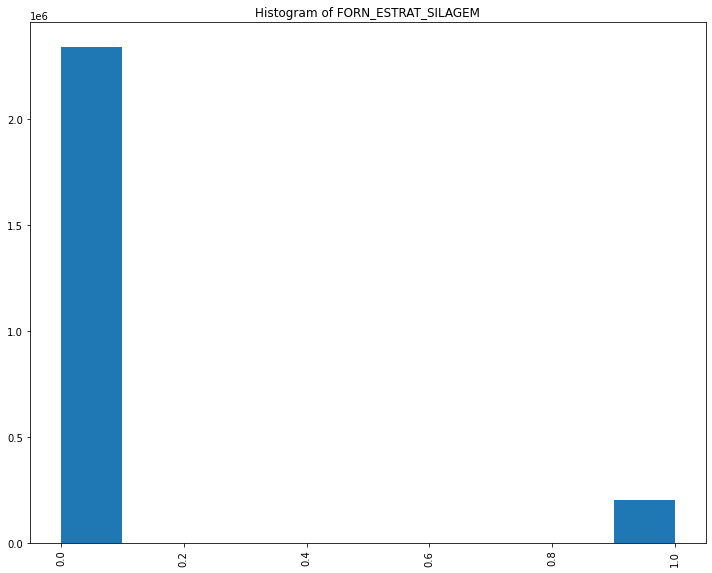

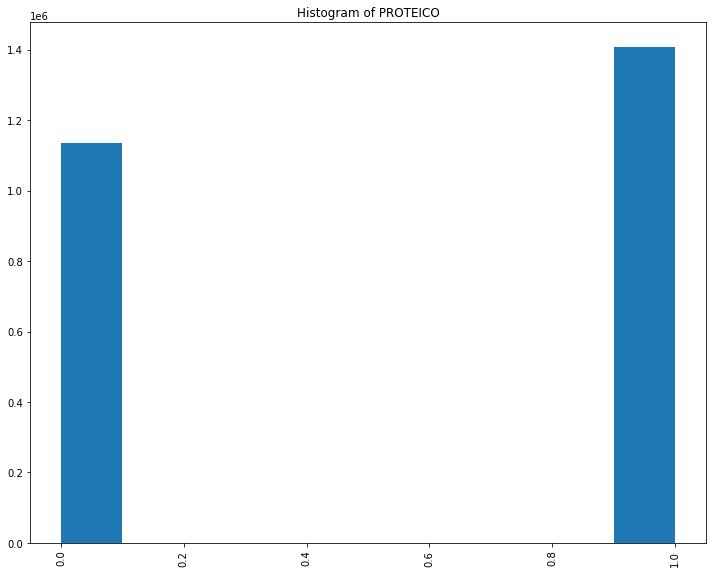

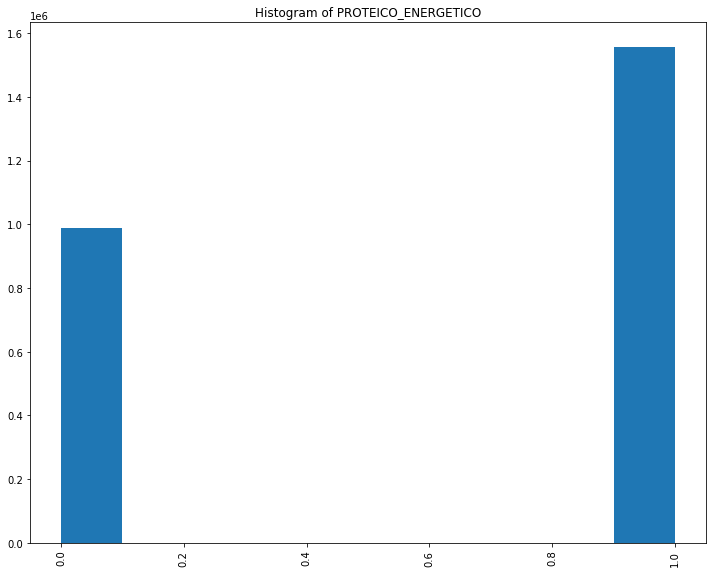

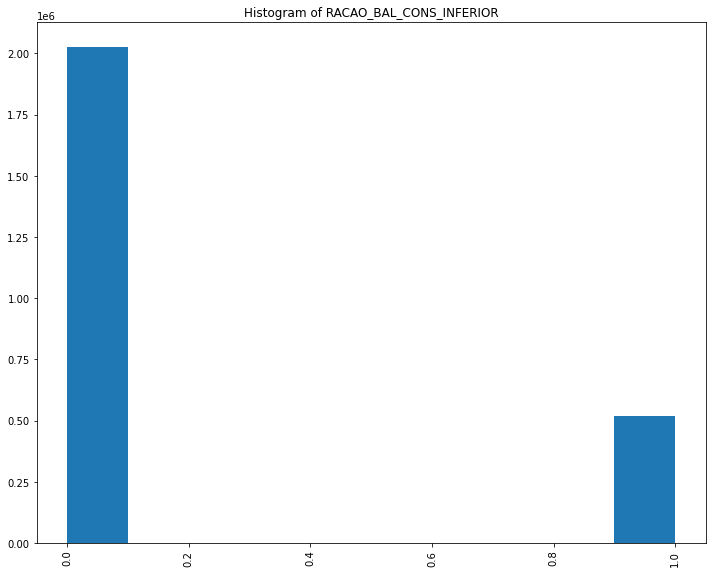

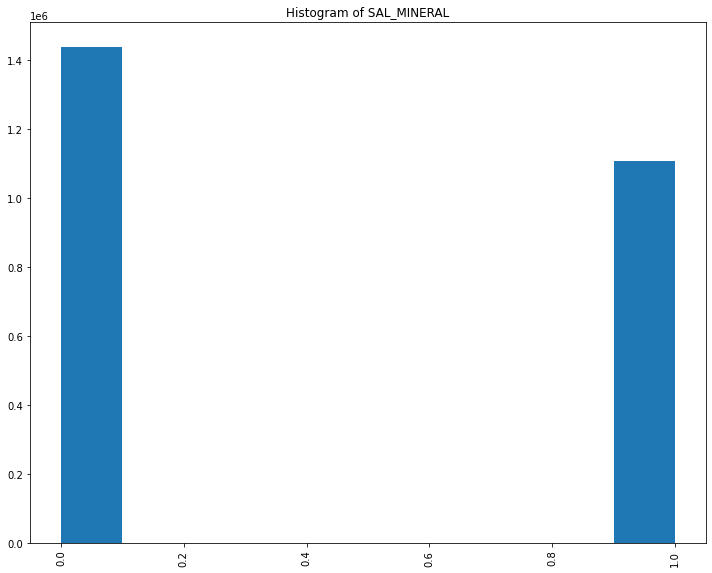

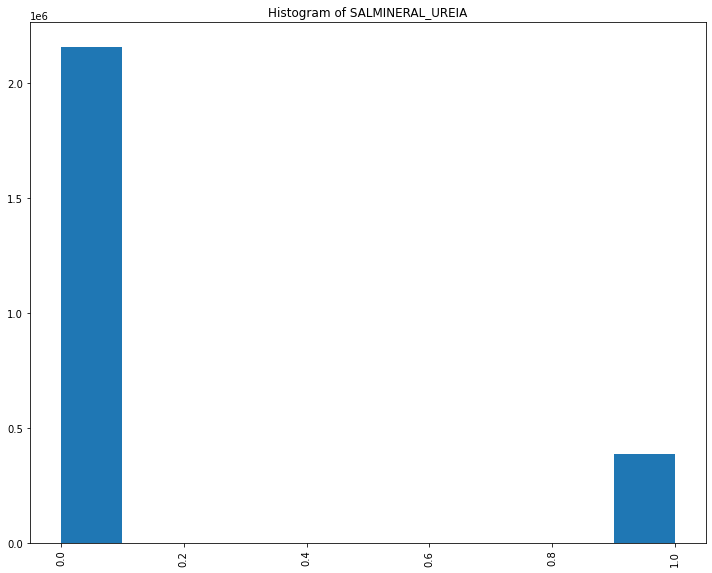

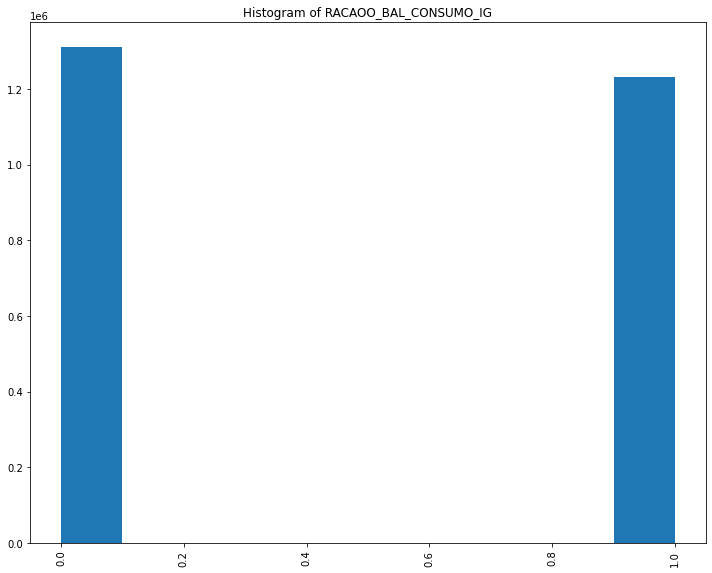

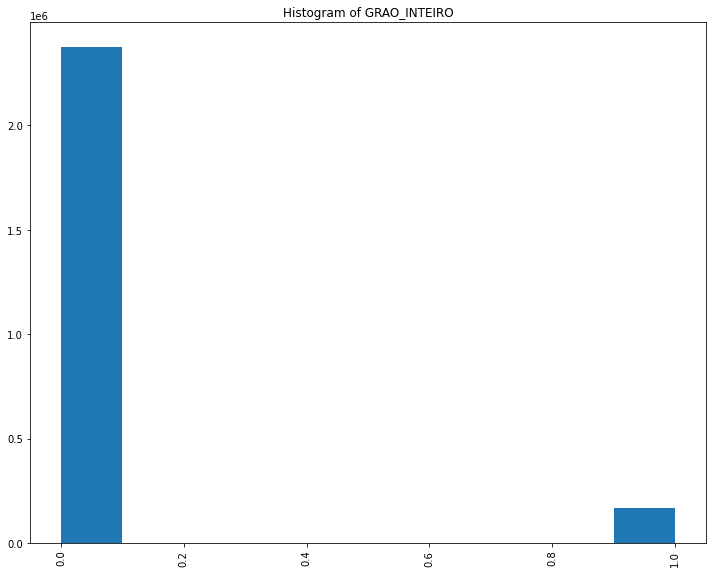

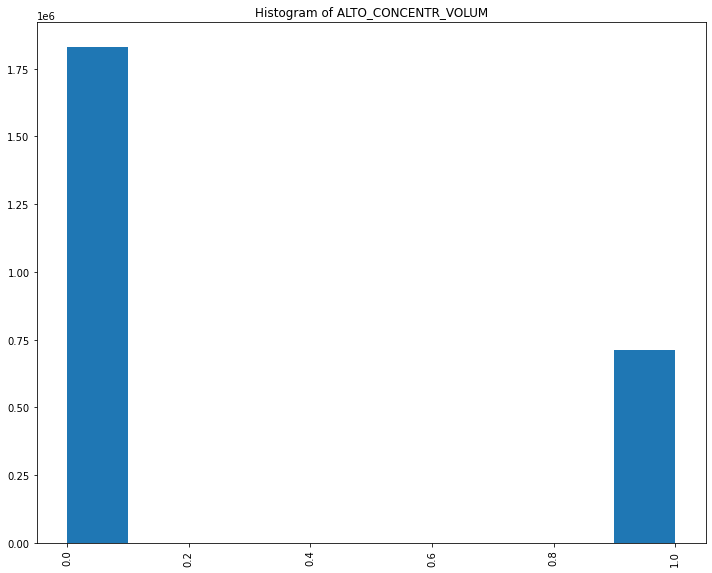

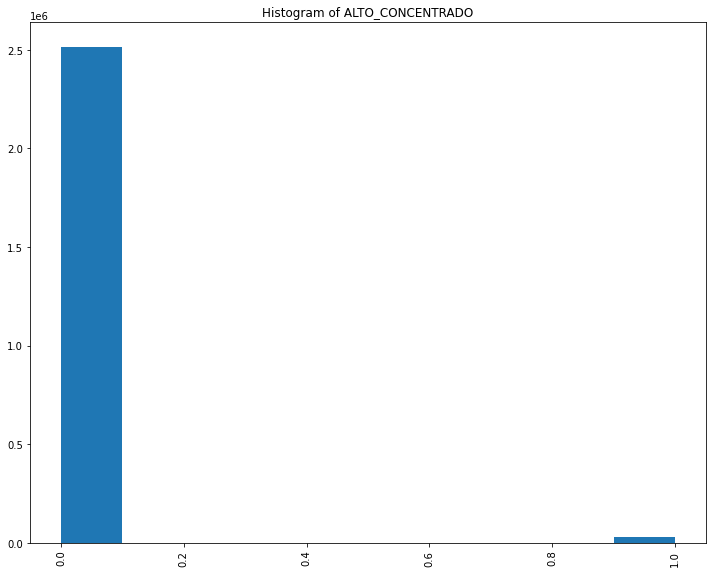

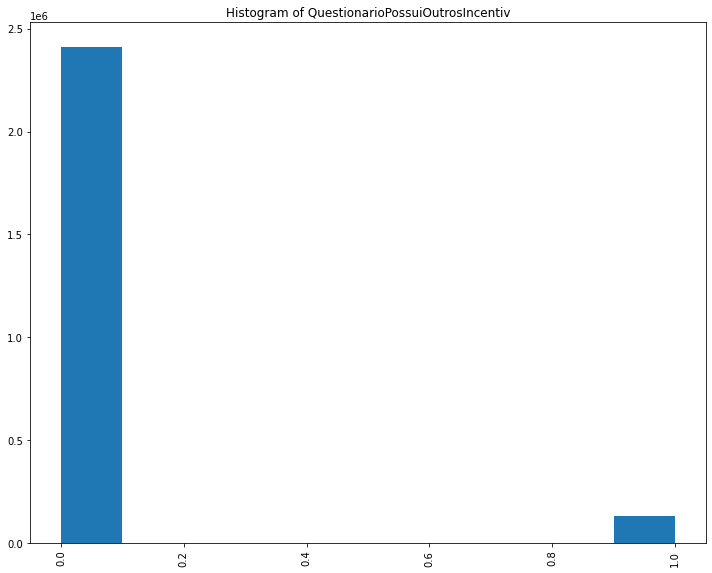

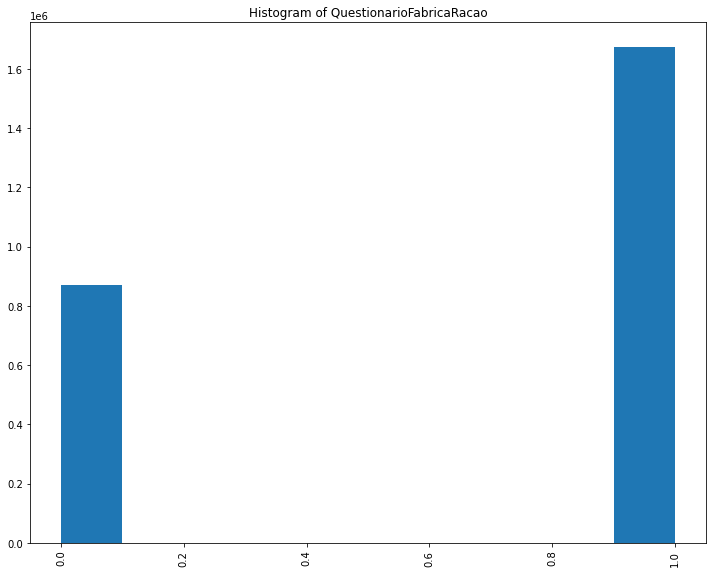

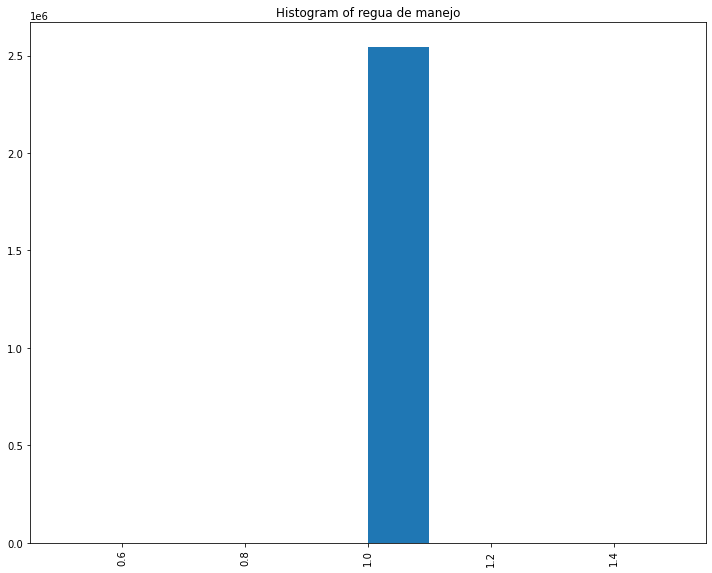

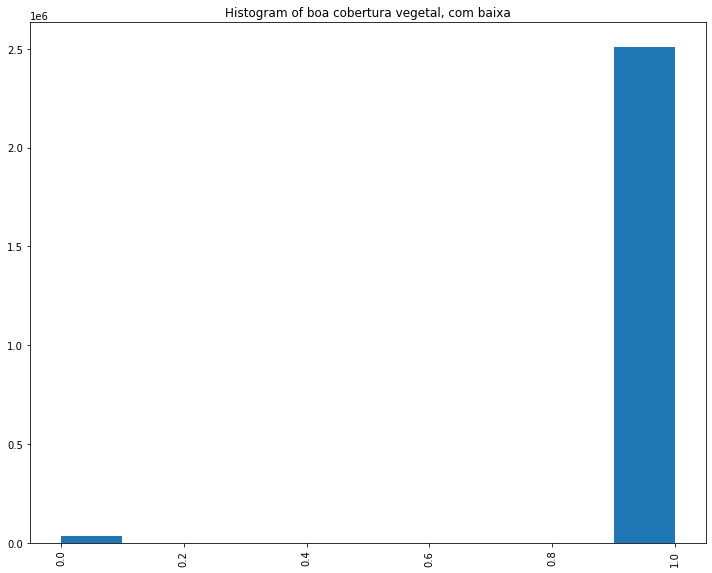

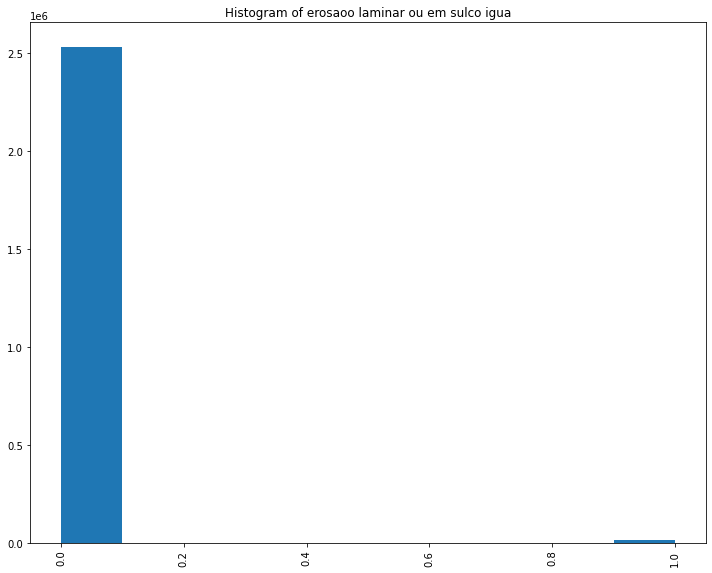

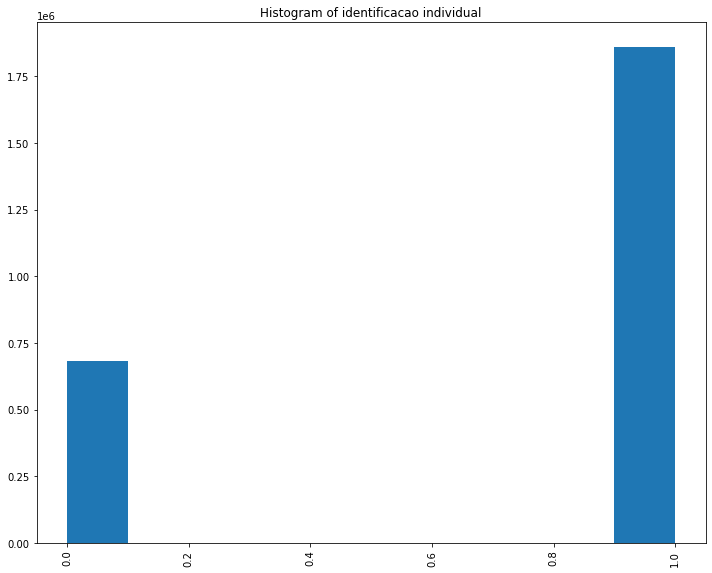

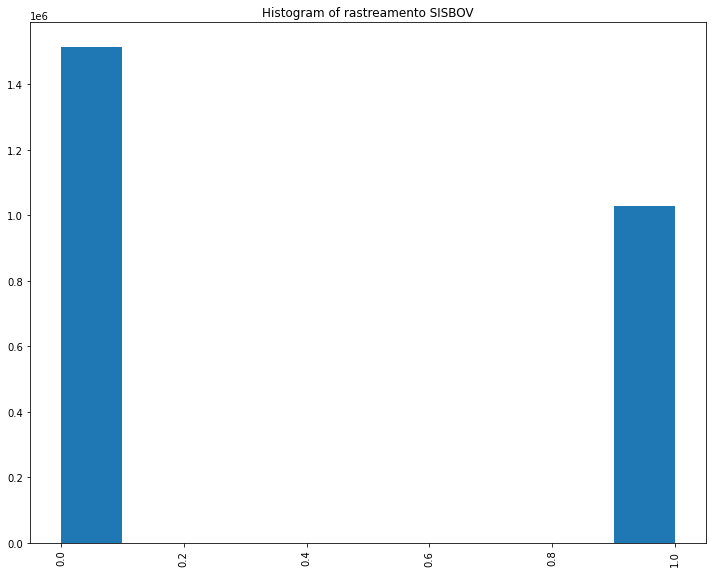

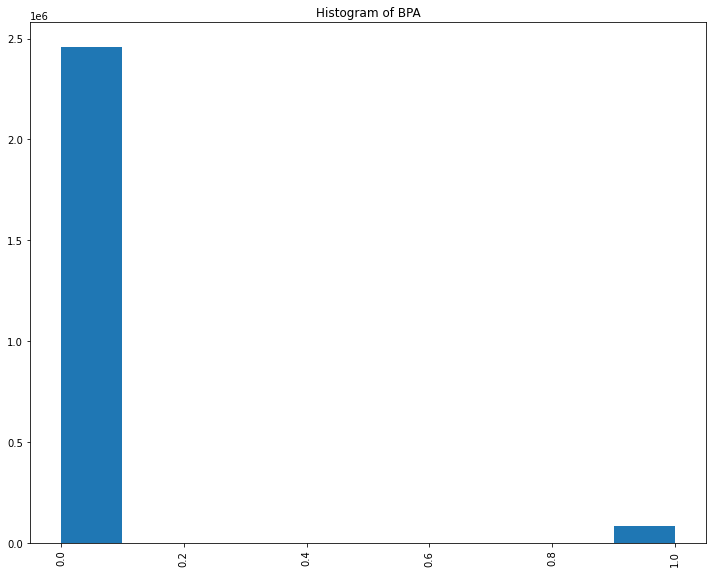

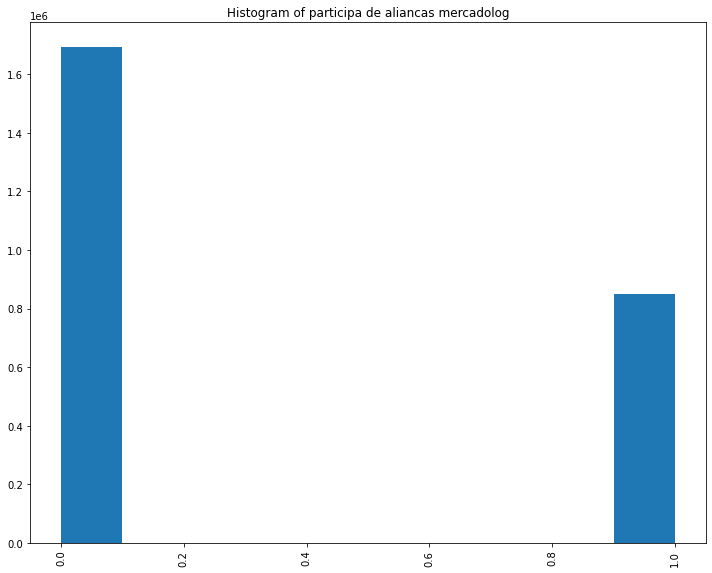

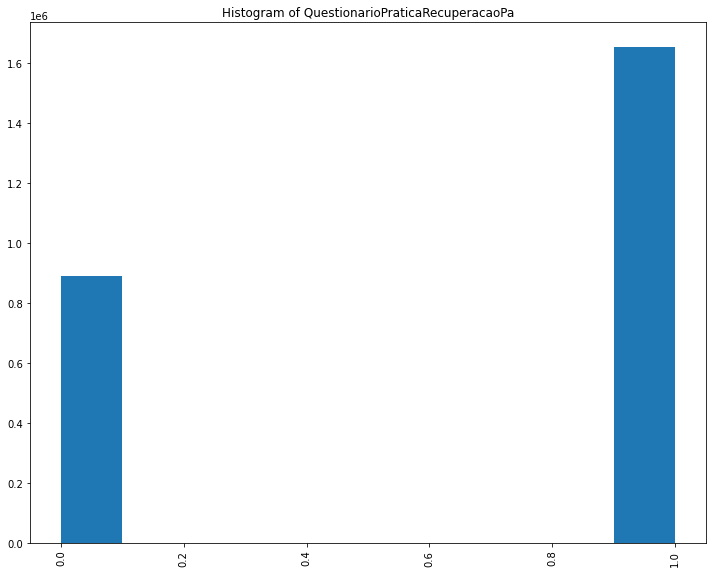

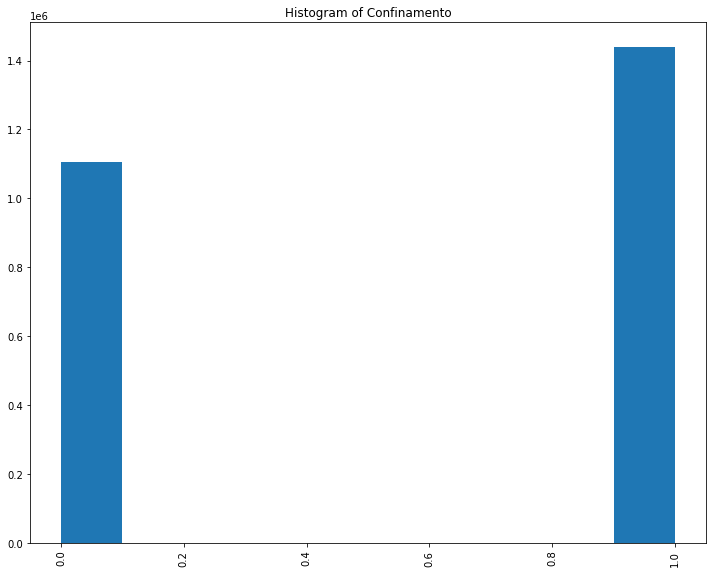

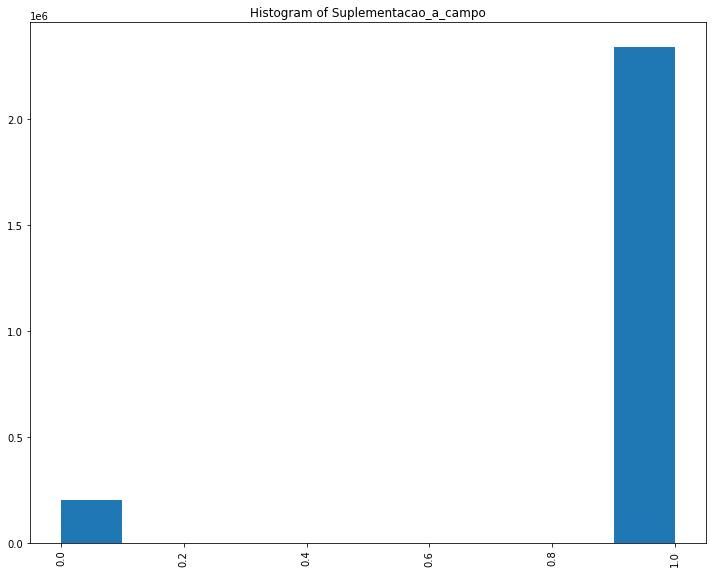

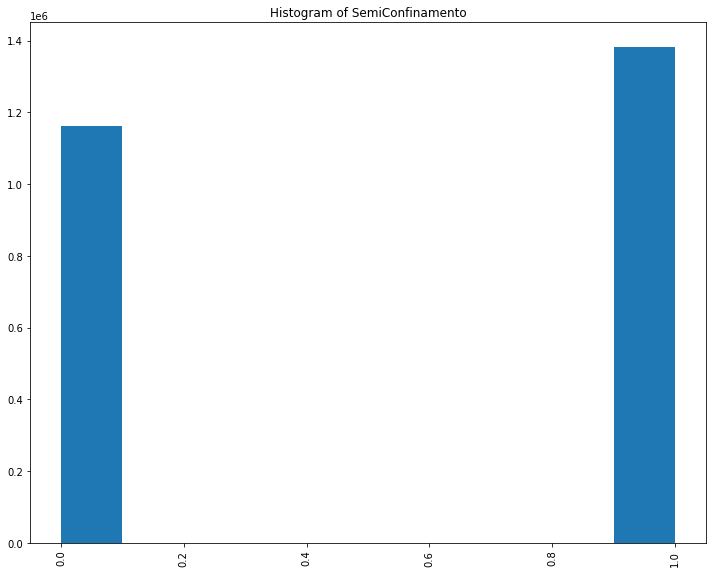

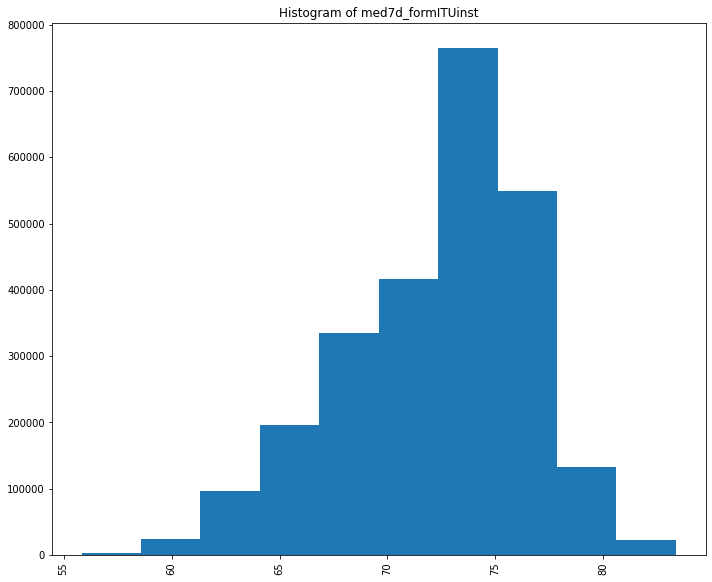

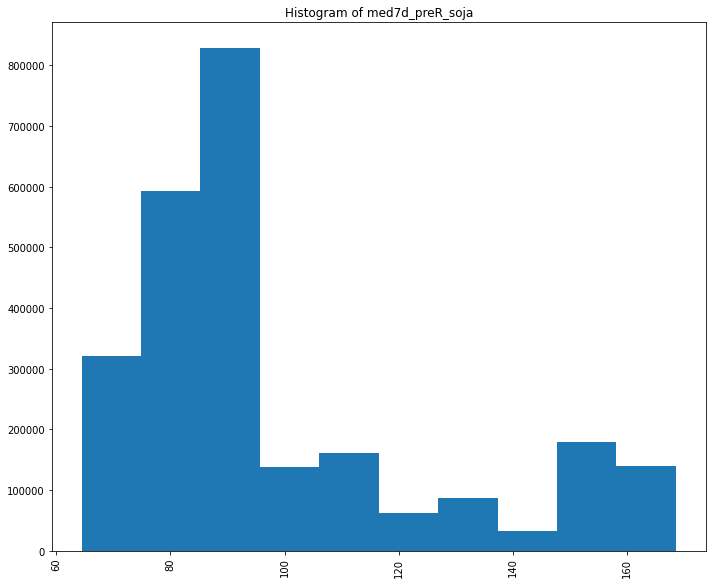

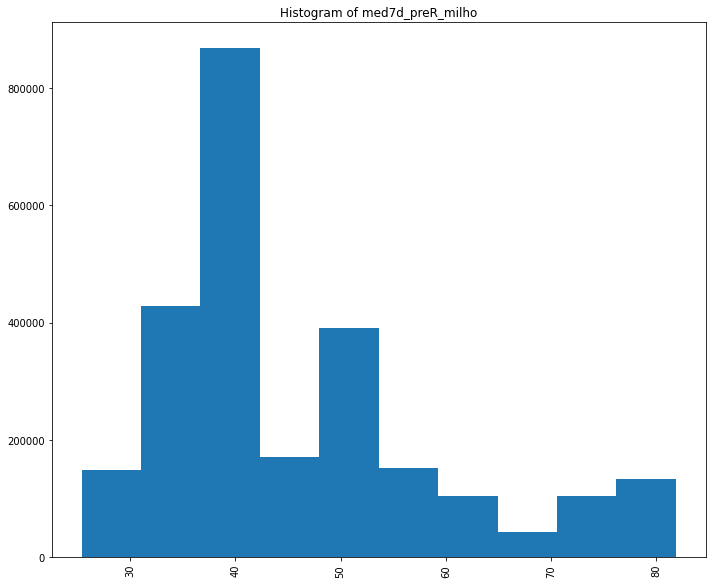

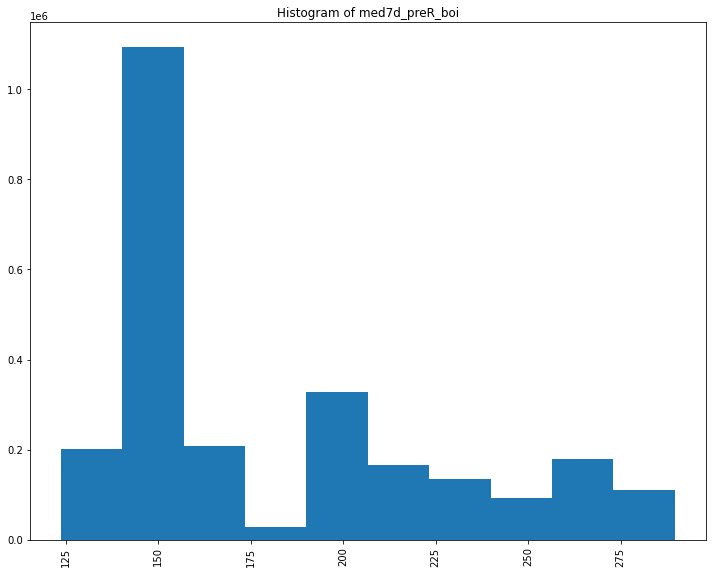

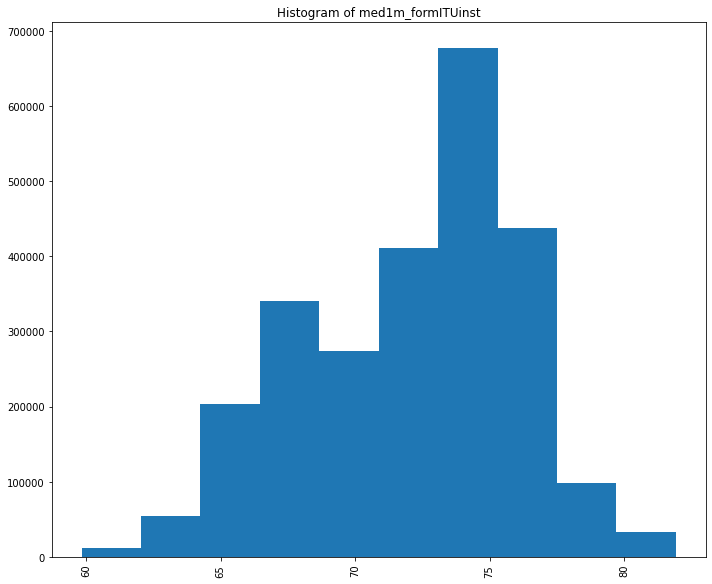

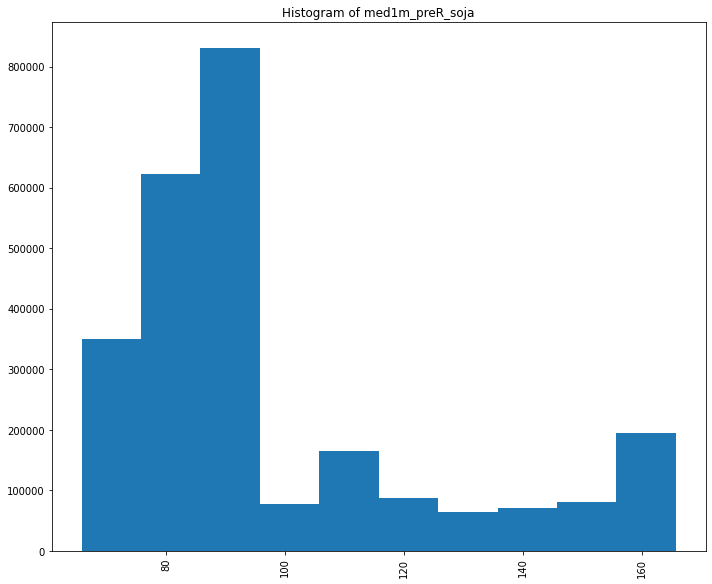

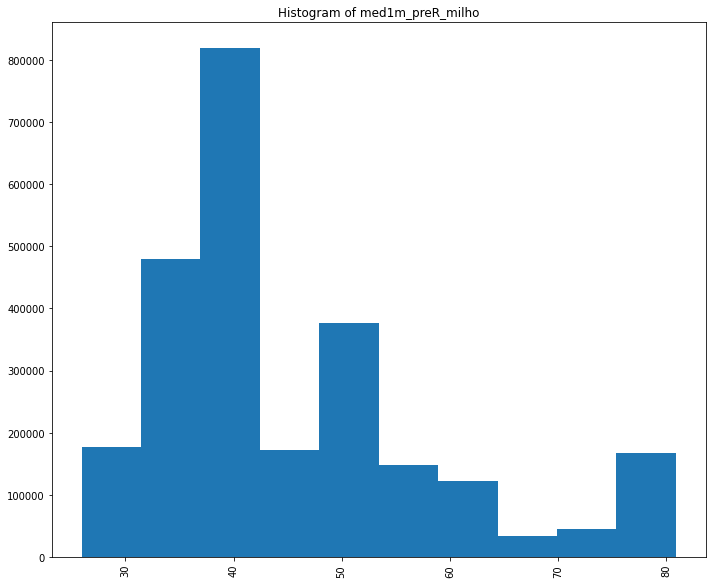

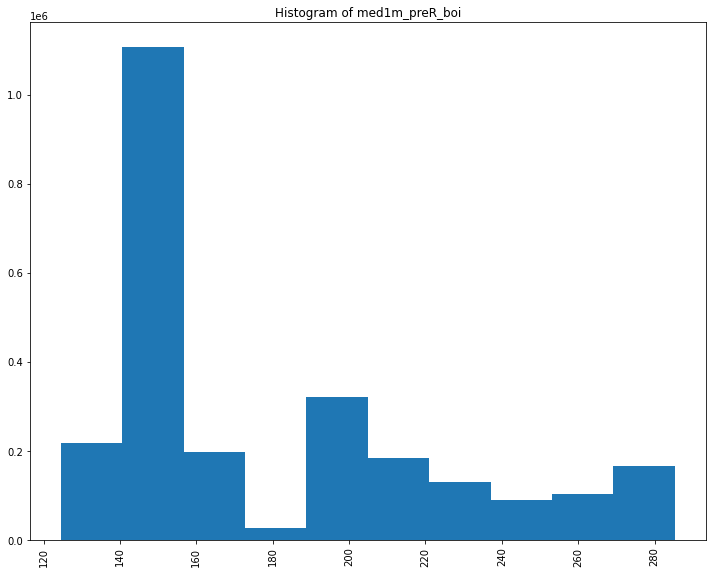

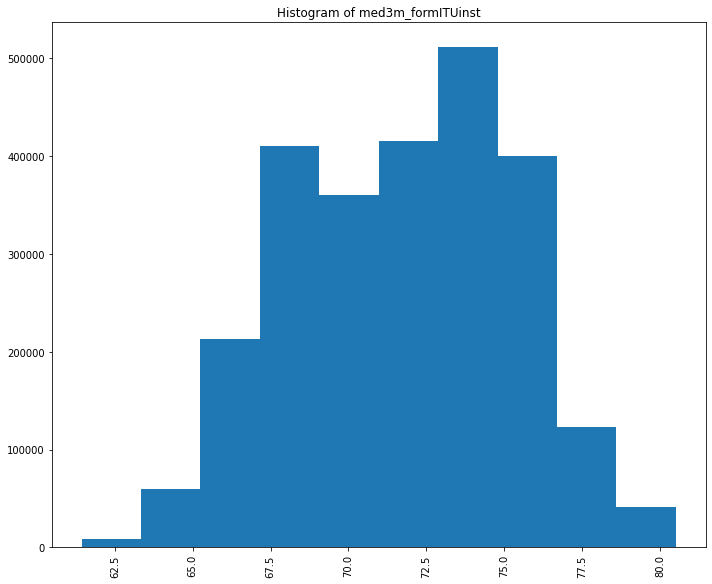

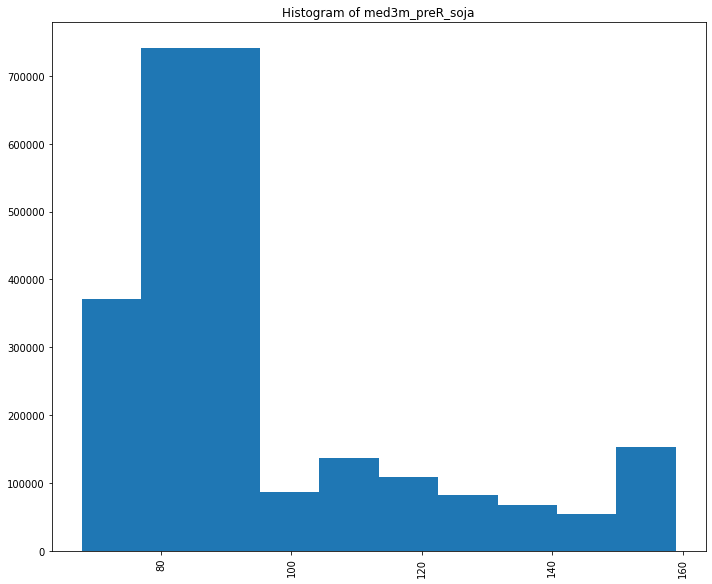

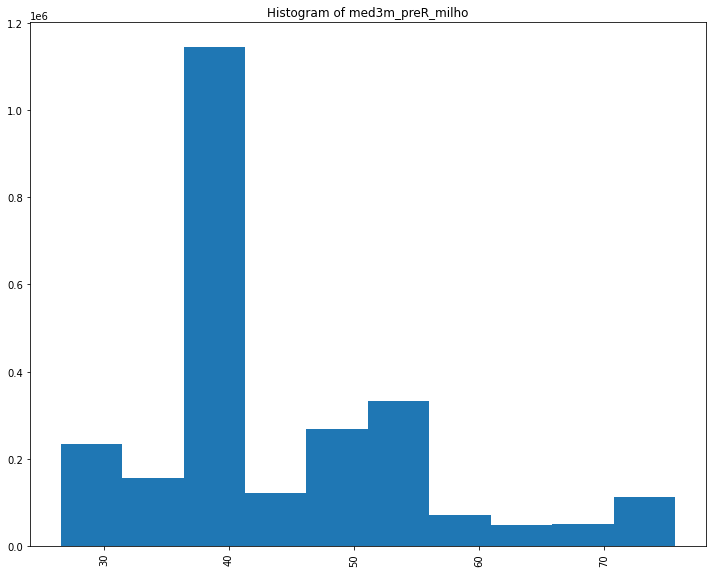

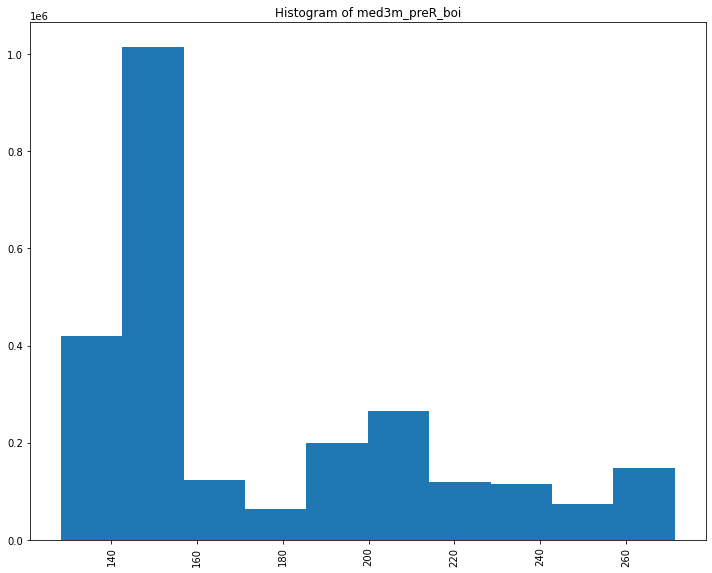

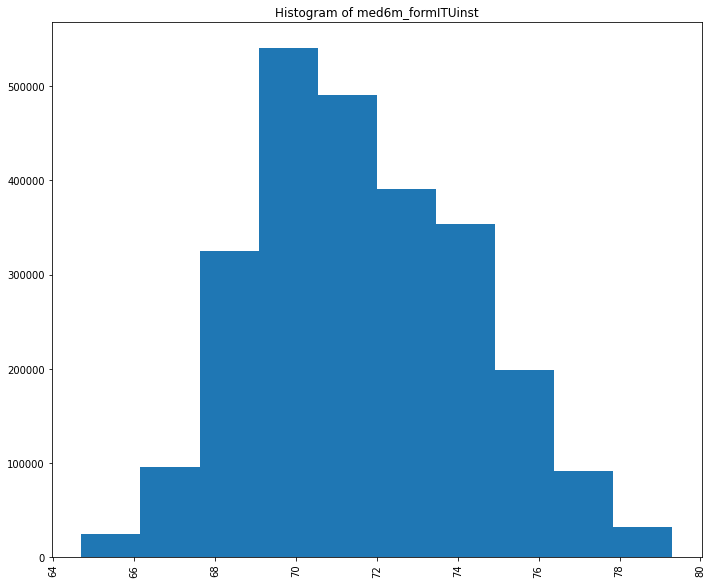

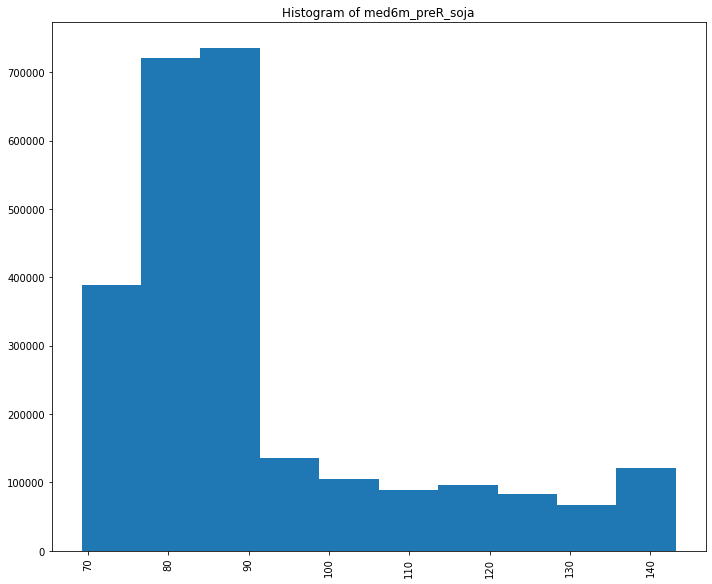

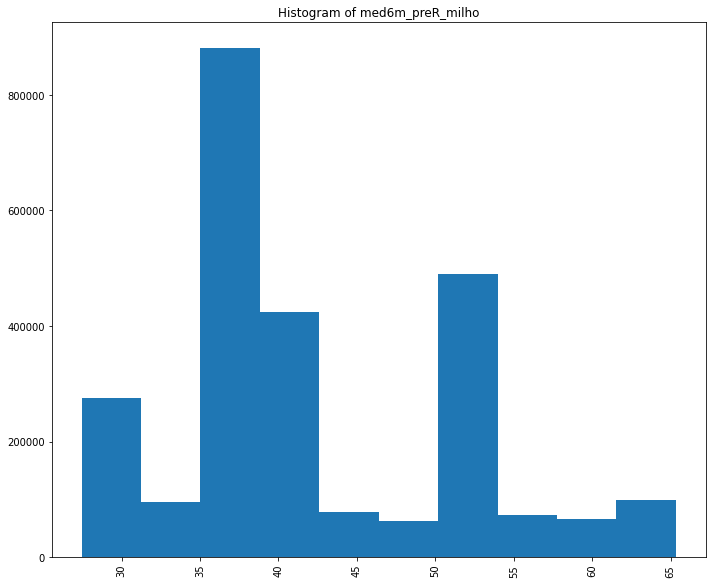

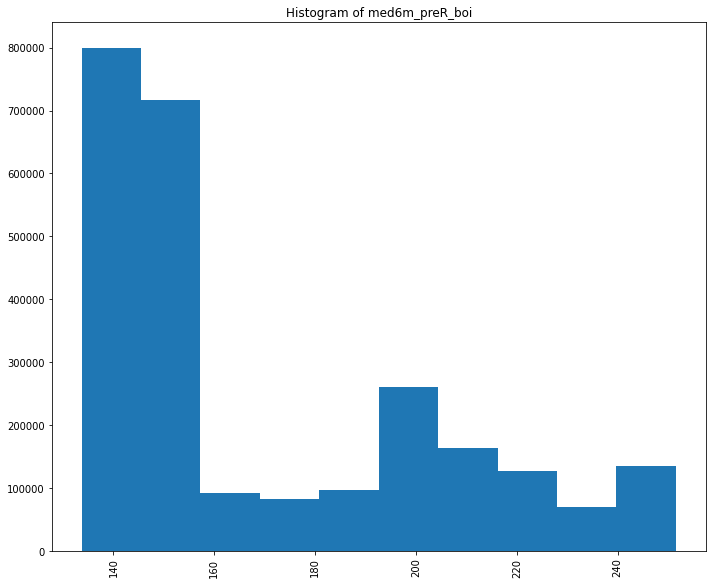

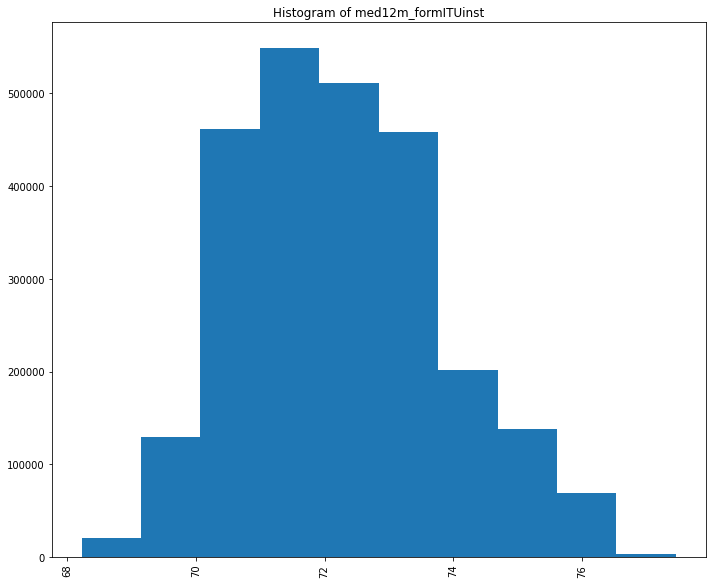

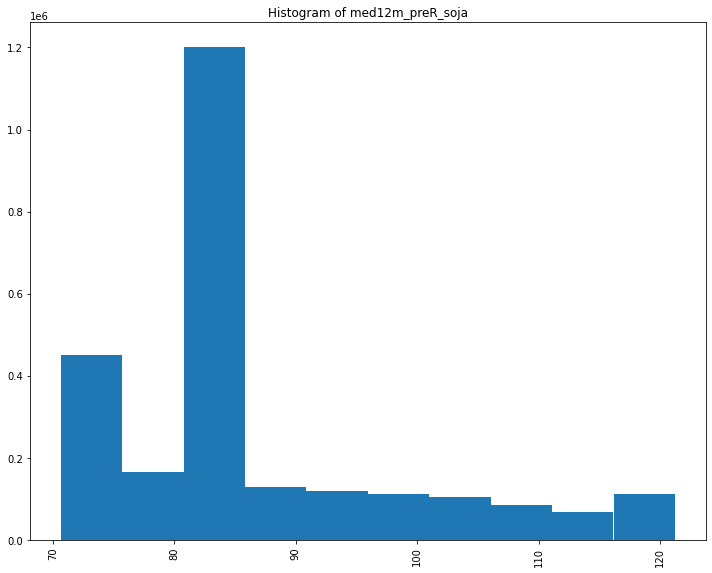

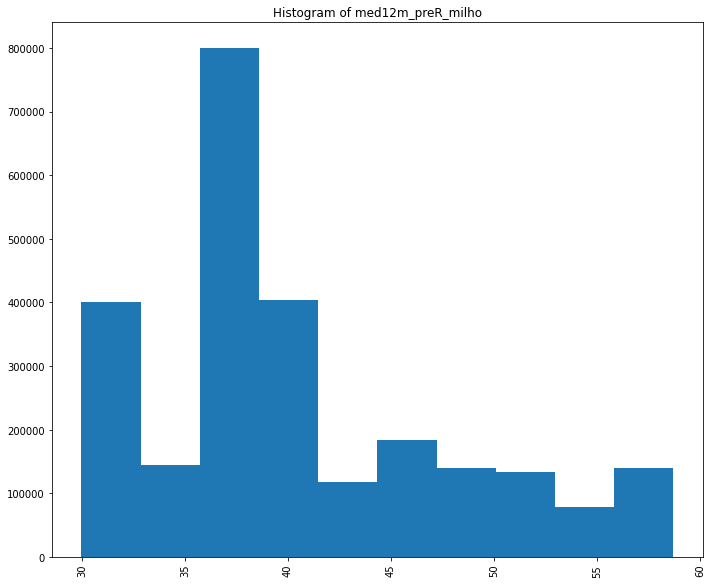

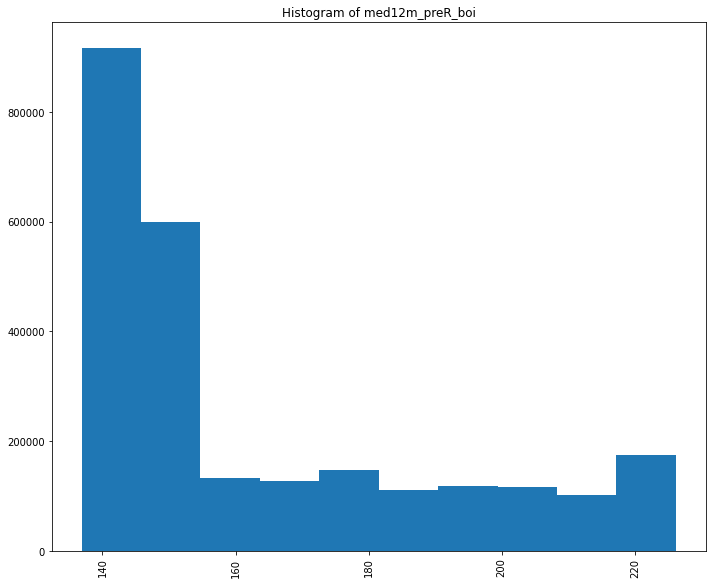

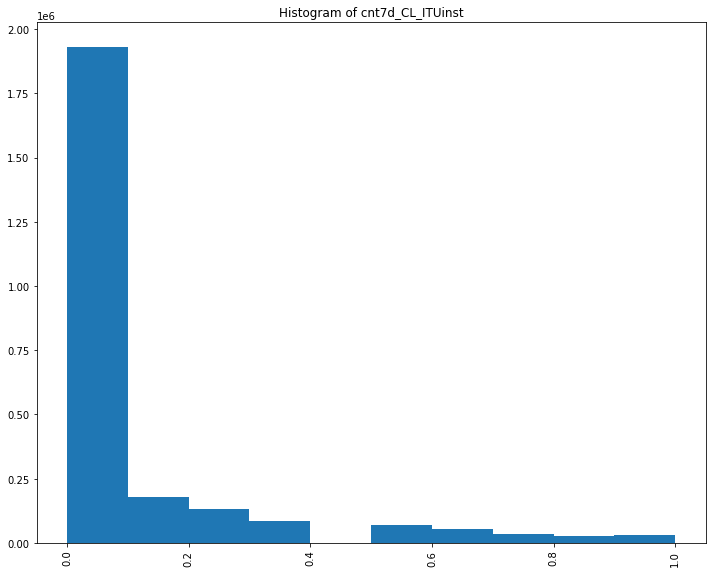

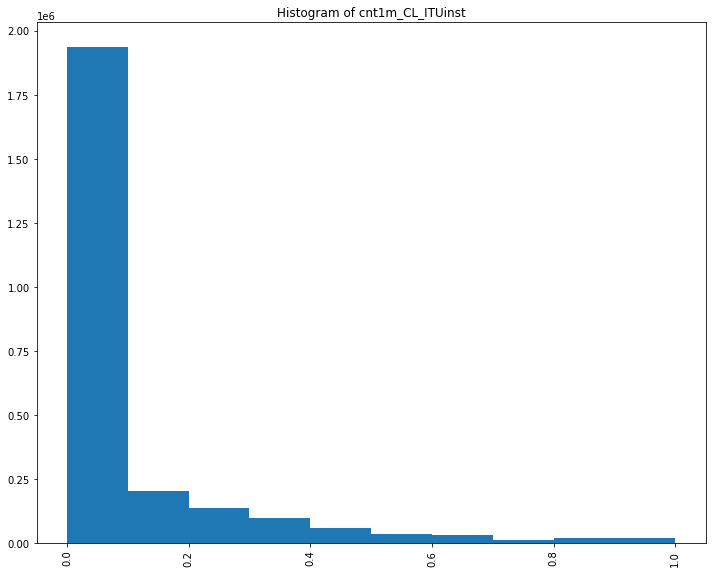

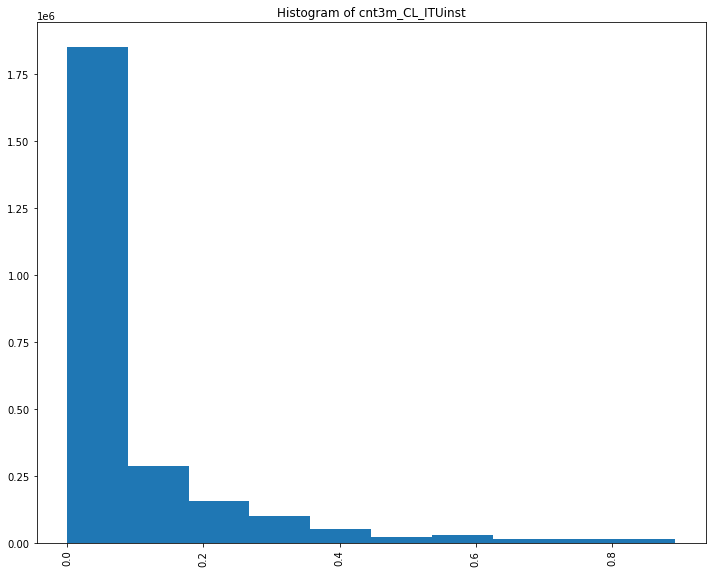

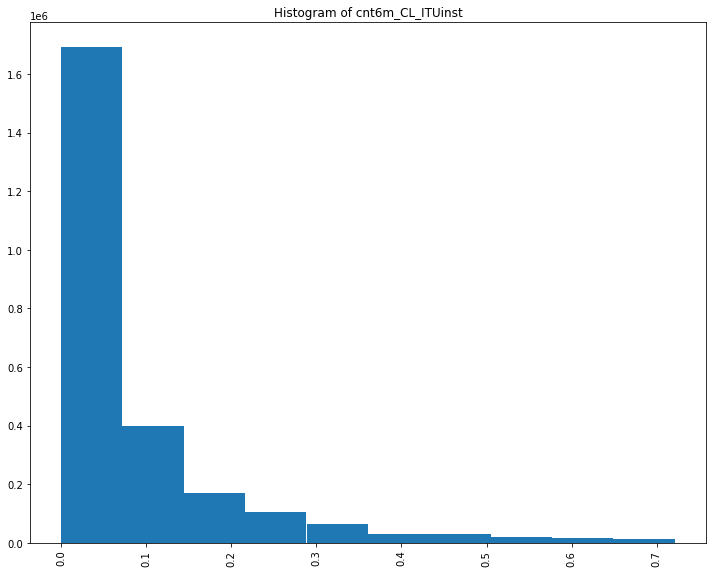

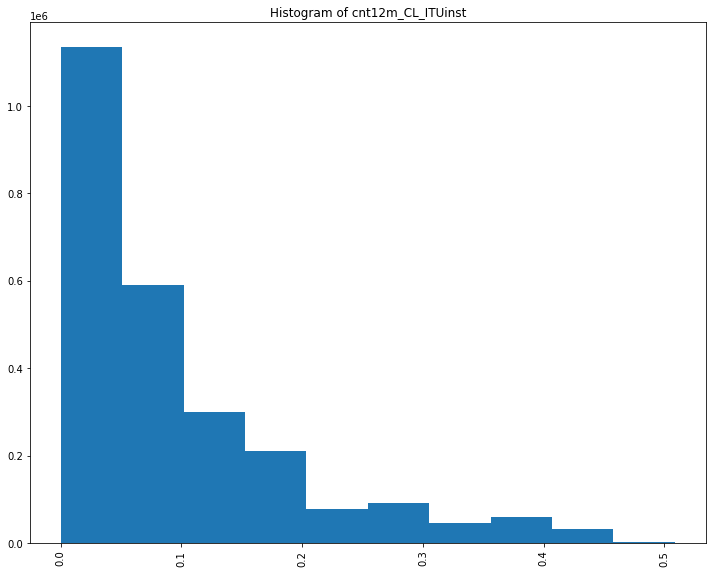

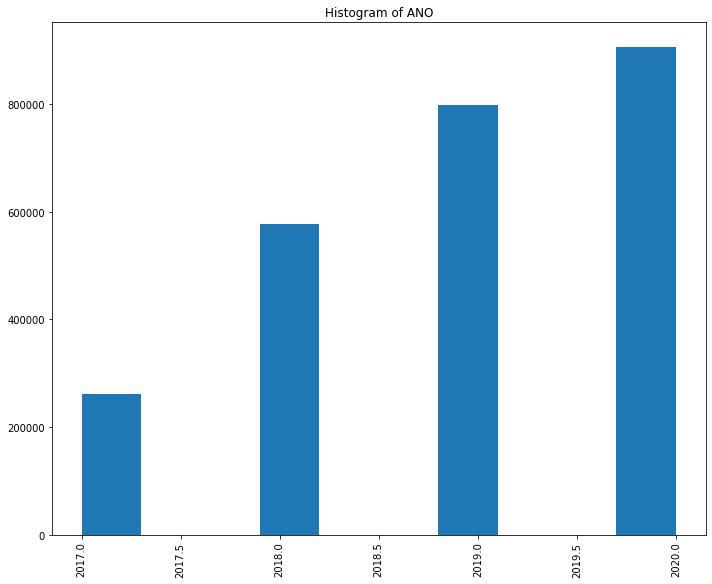

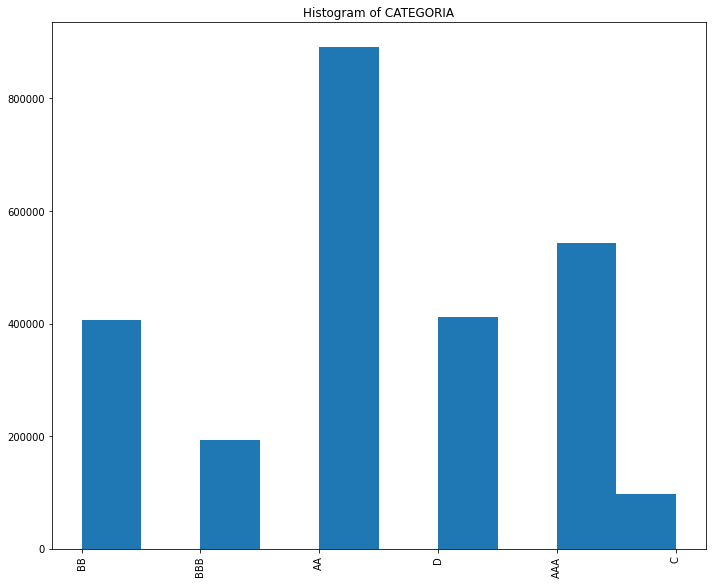

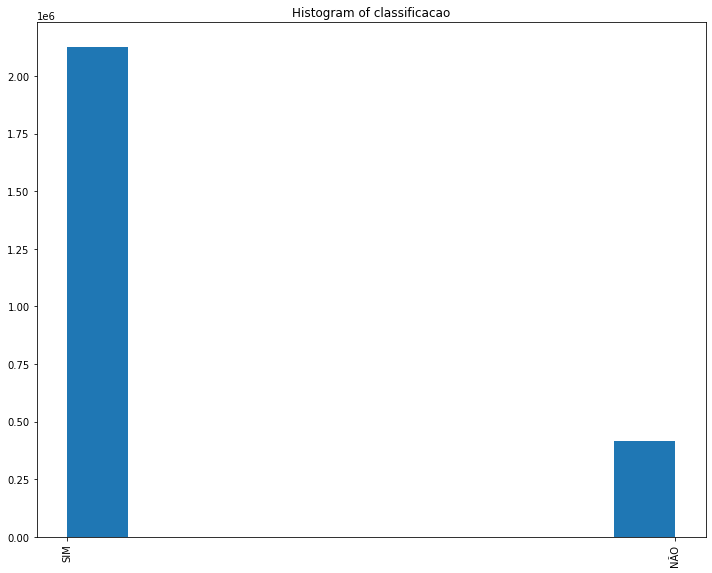



*****FIM IMPRIMIR HISTOGRAM******
Function histogram Took 0:00:24.214481



In [ ]:
# Print histogram for each attribute
reports.histogram(
    data_frame=precoce_ms_data_frame
)

## Print histogram for each attribute grouped by target class


*****INICIO IMPRIMIR HISTOGRAM GROUPED BY TARGET******


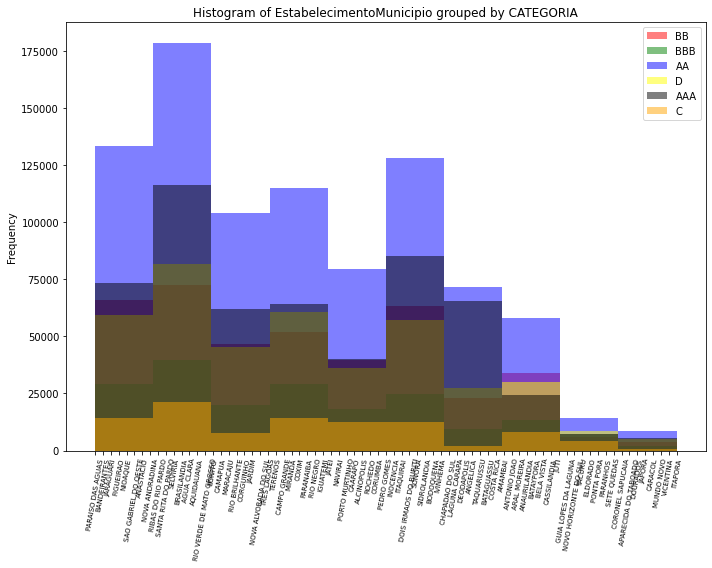

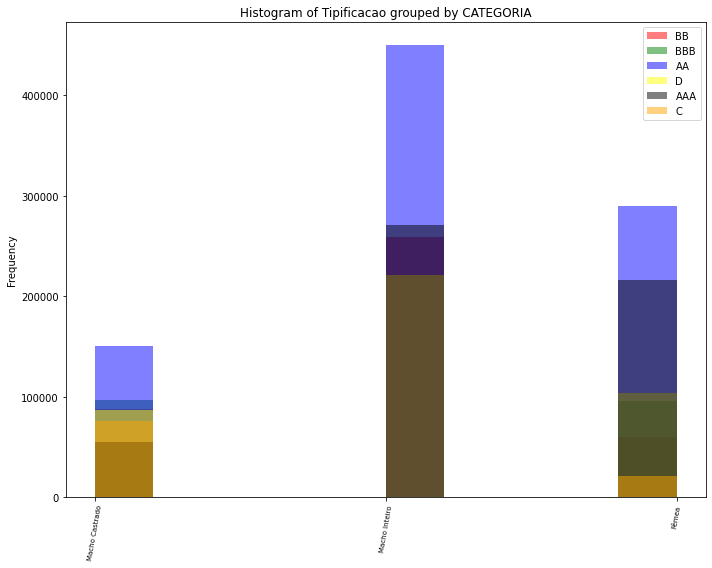

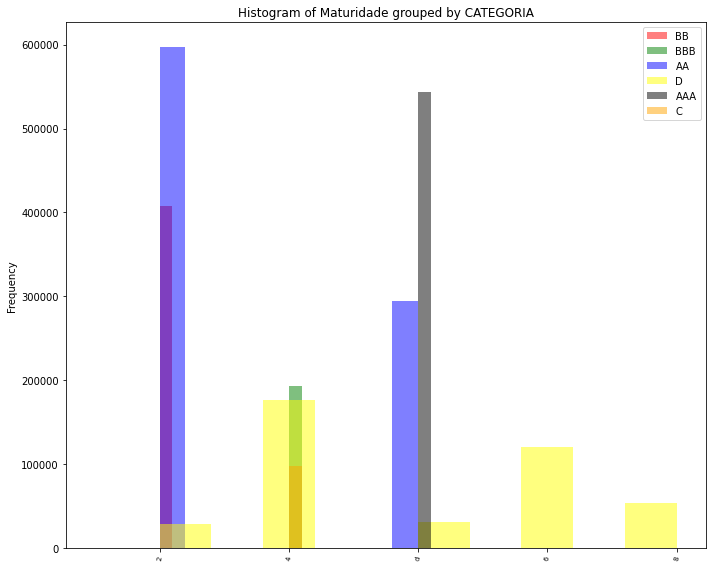

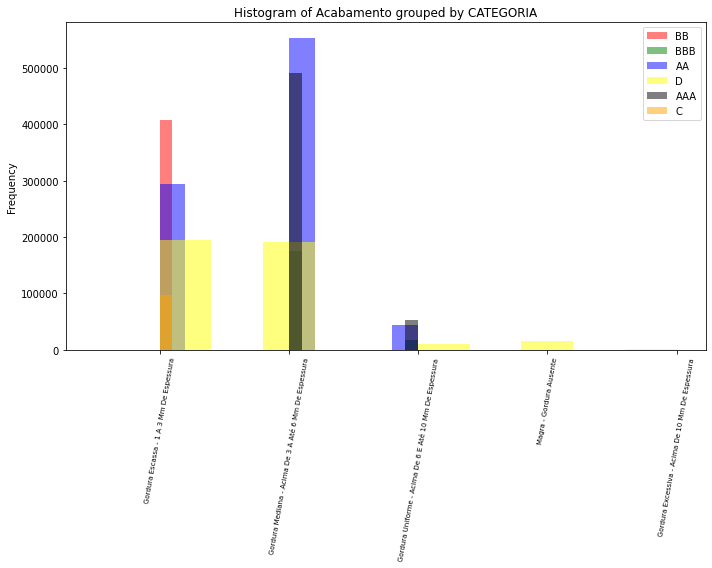

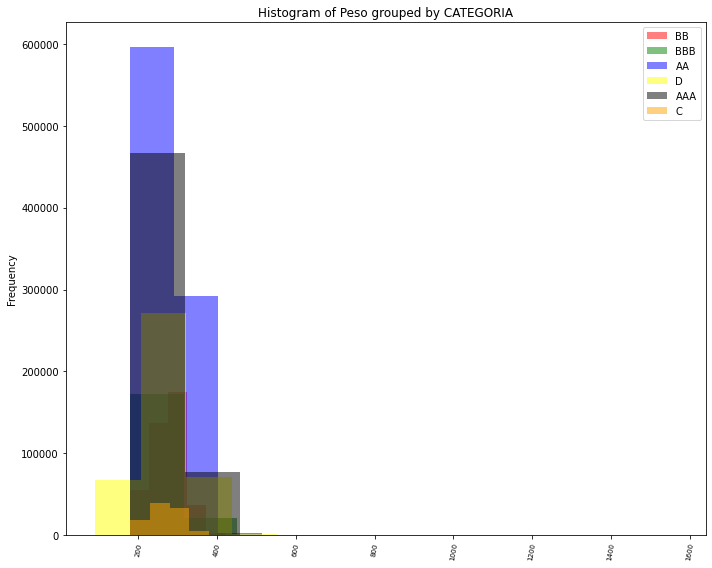

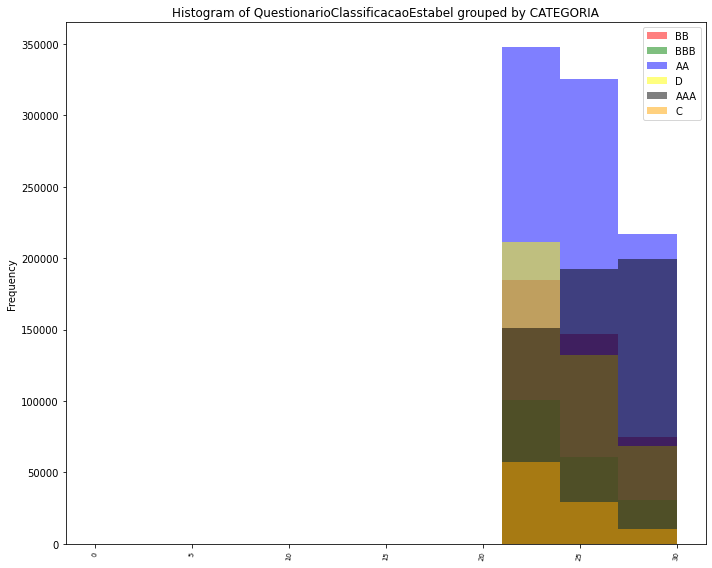

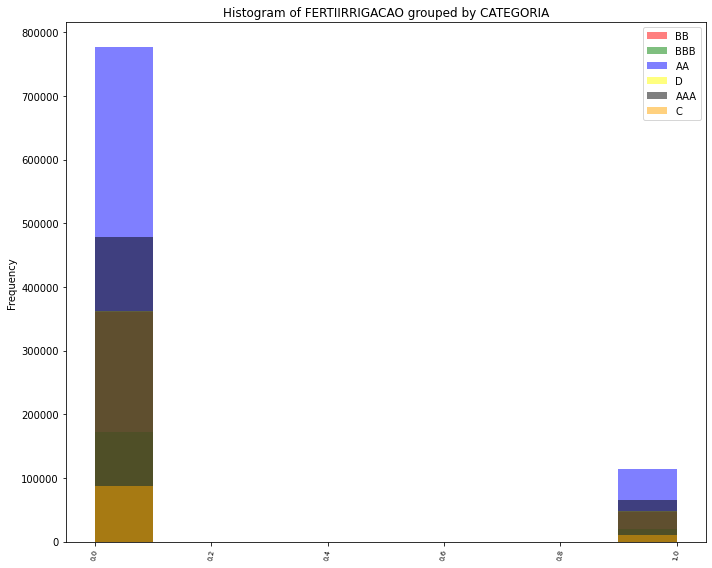

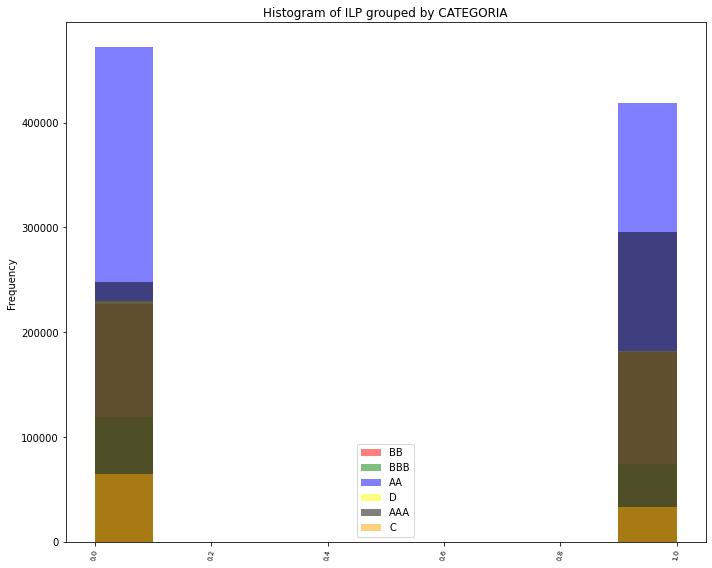

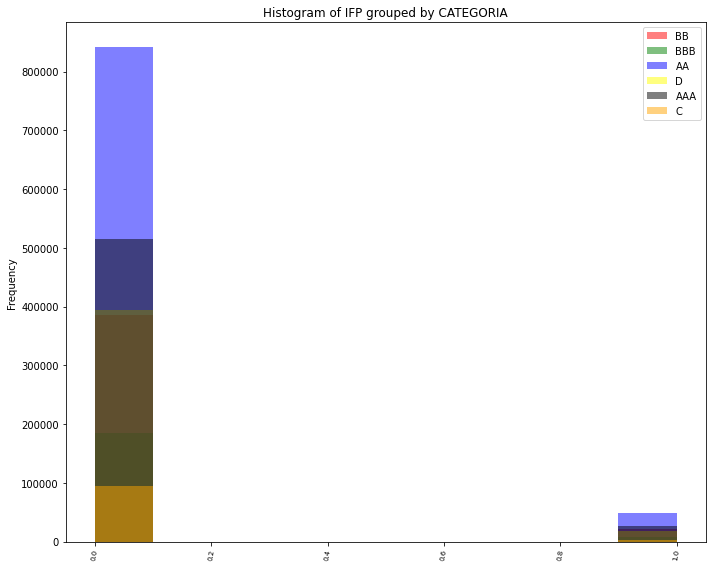

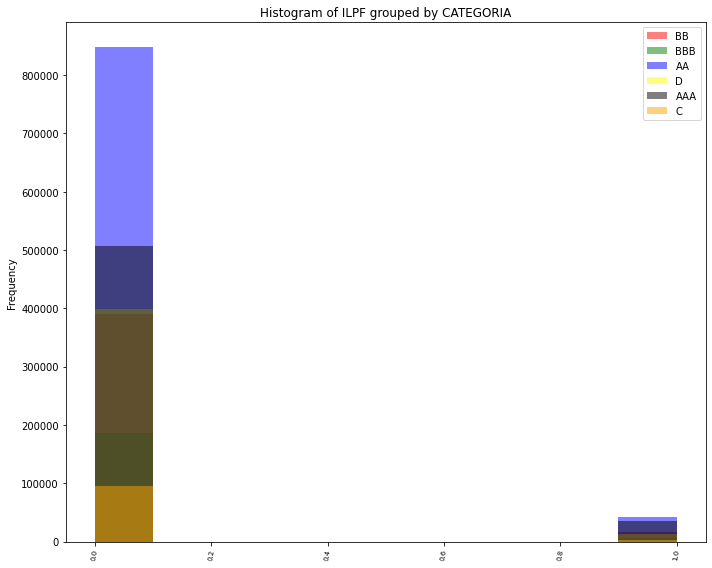

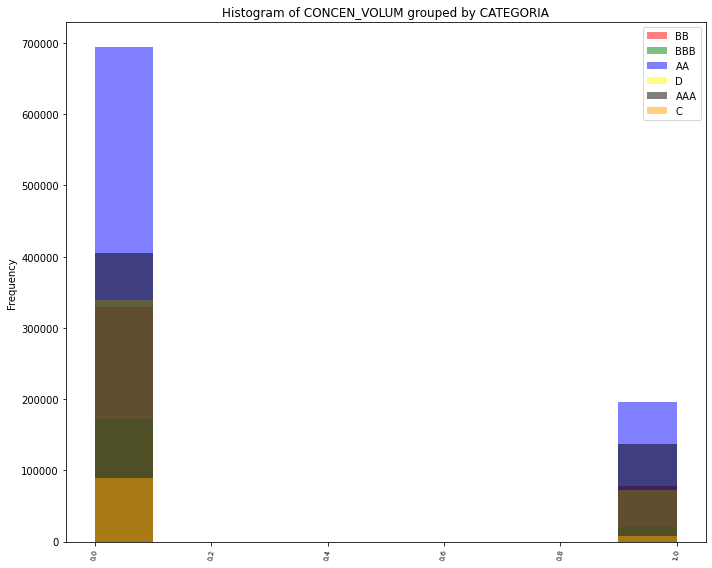

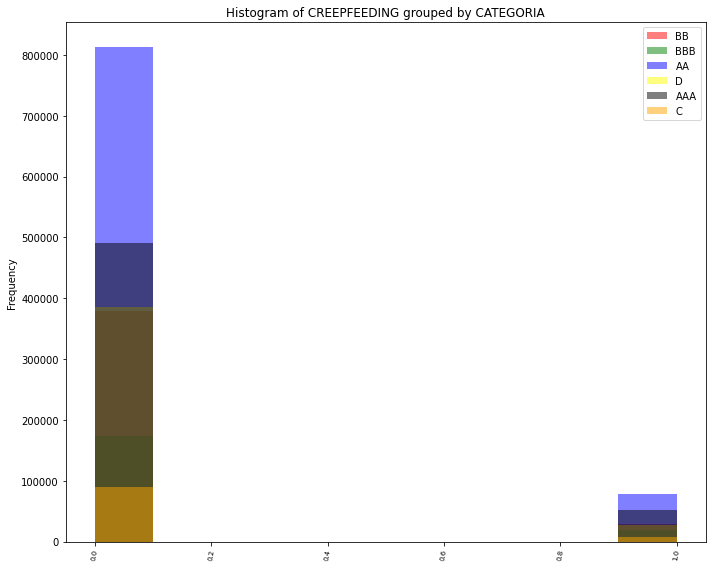

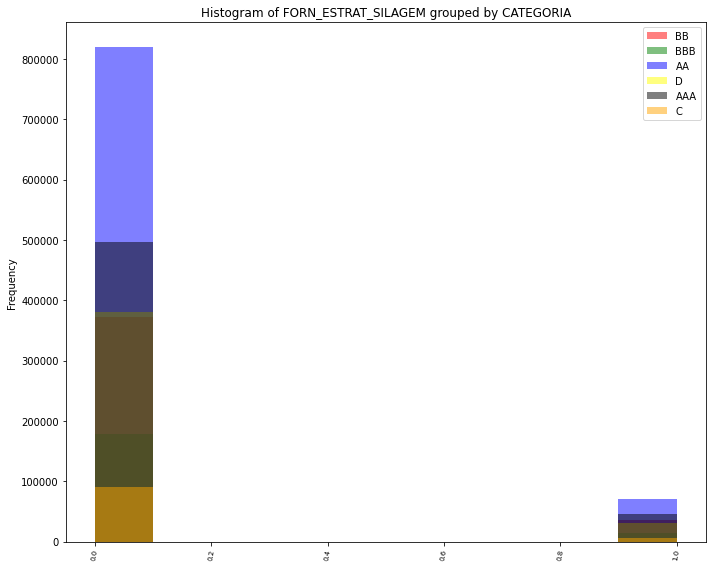

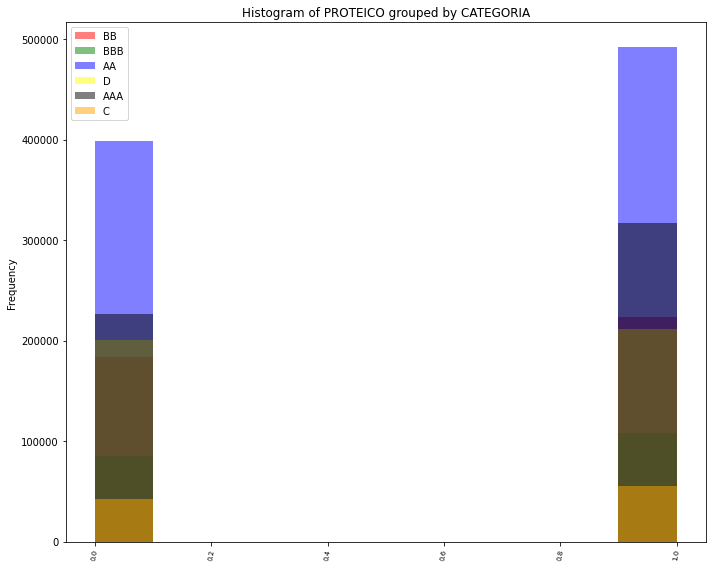

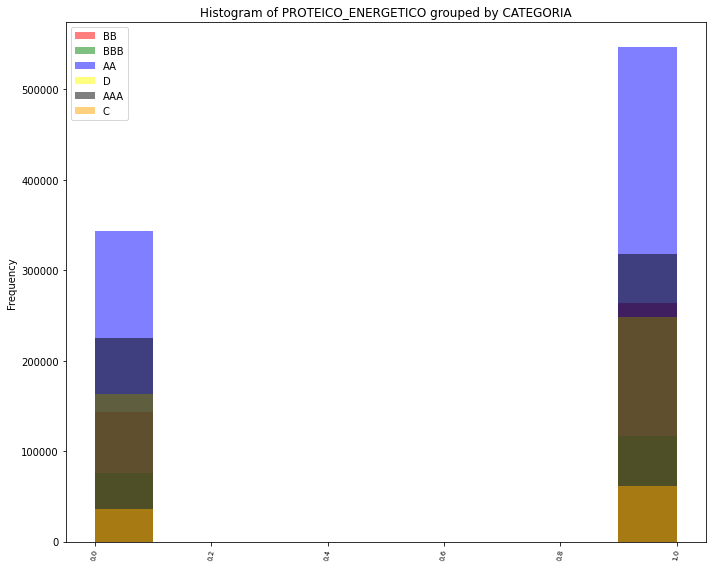

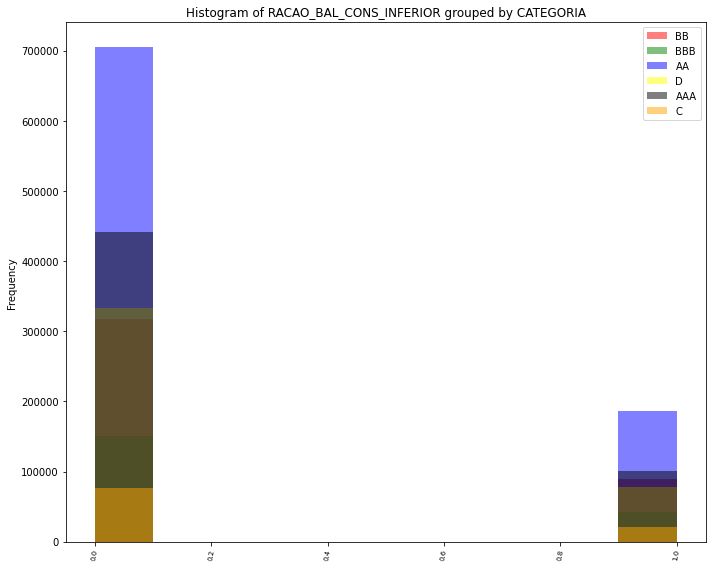

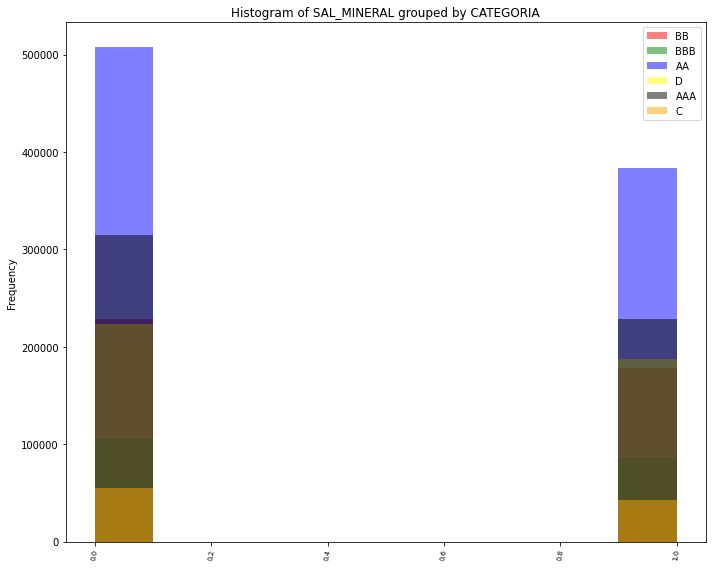

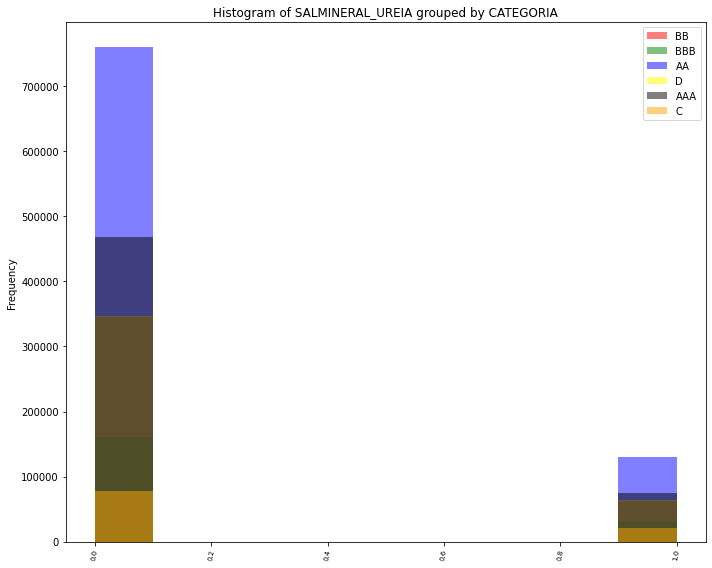

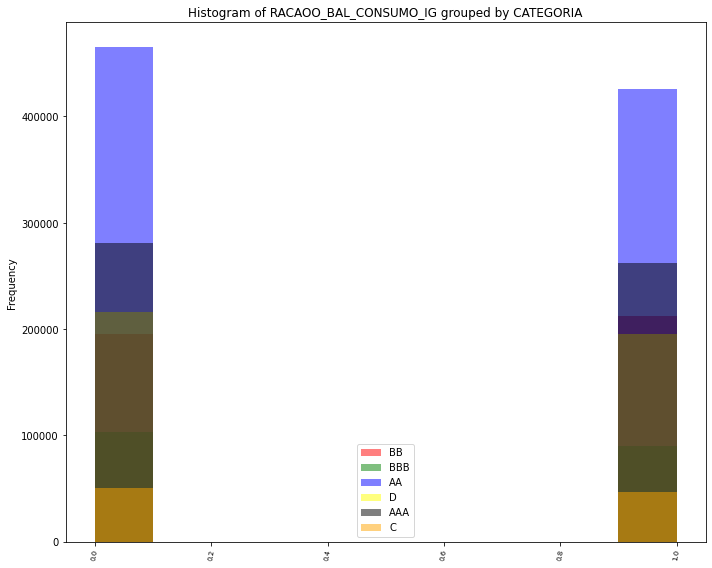

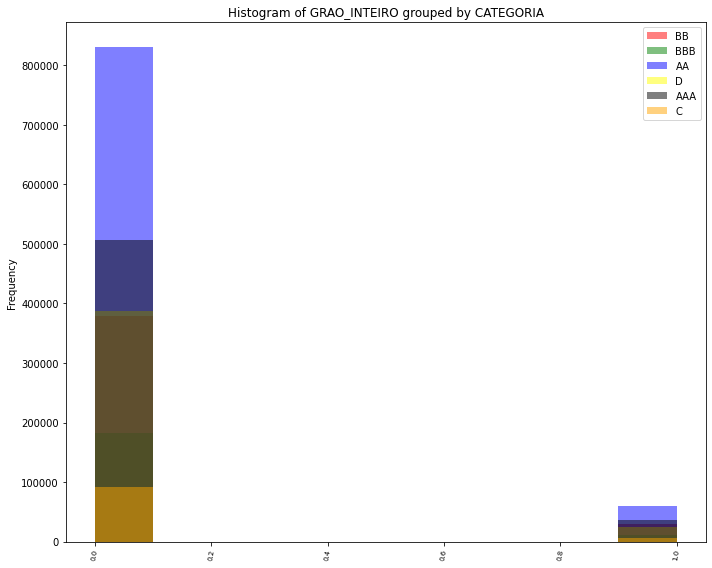

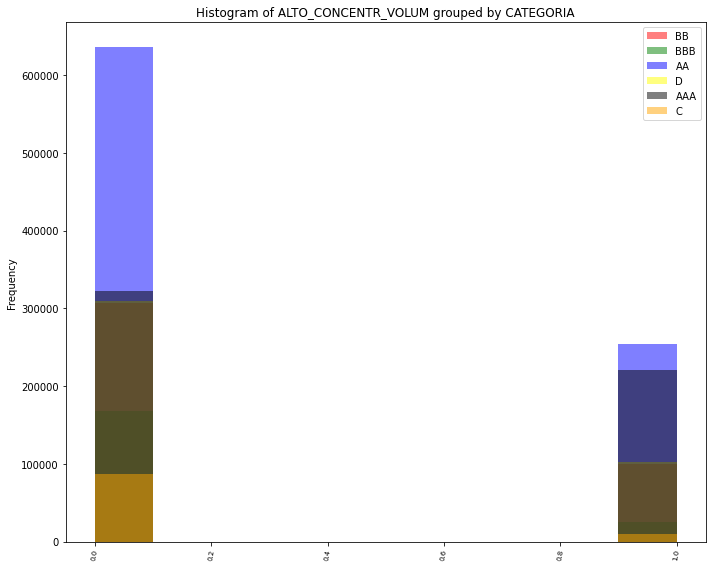

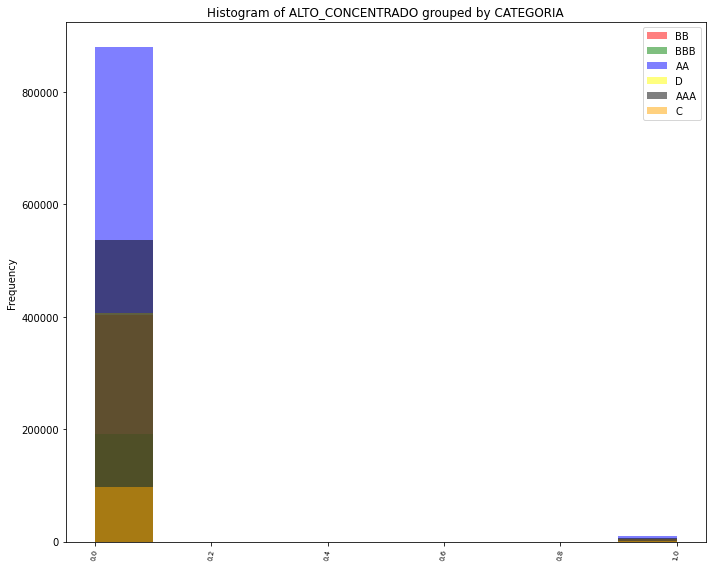

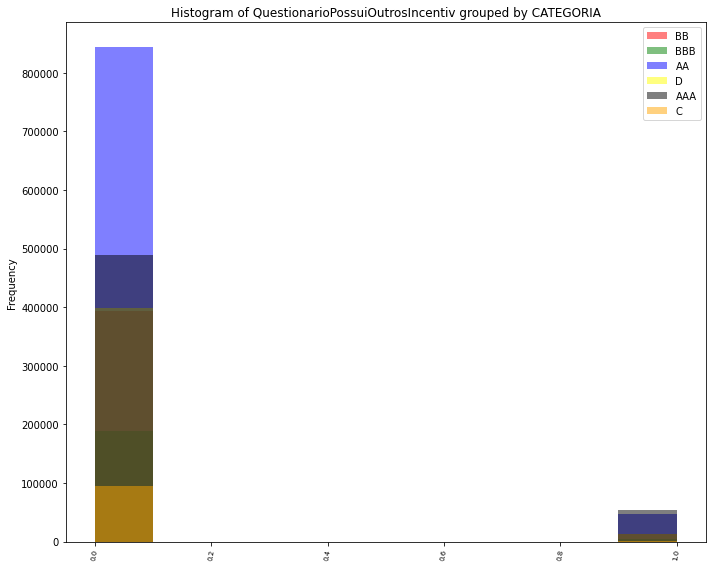

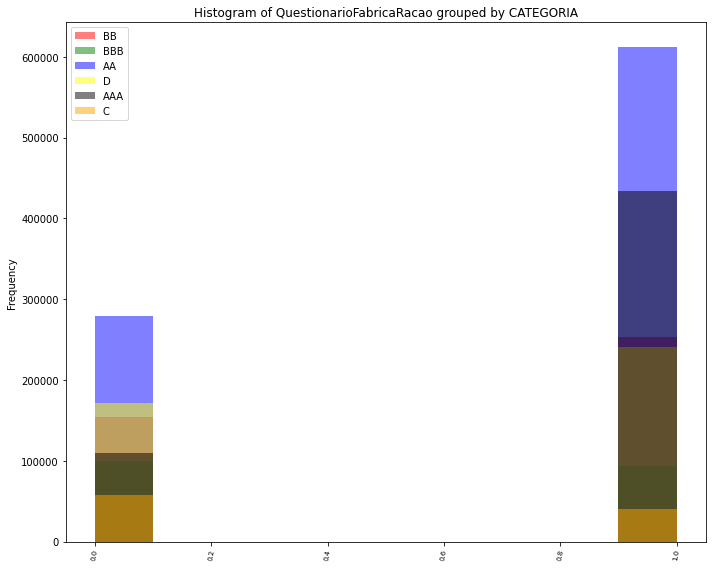

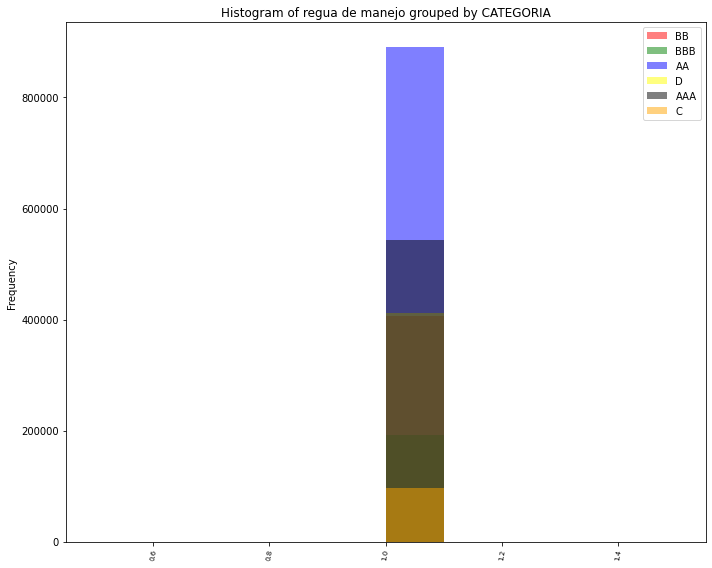

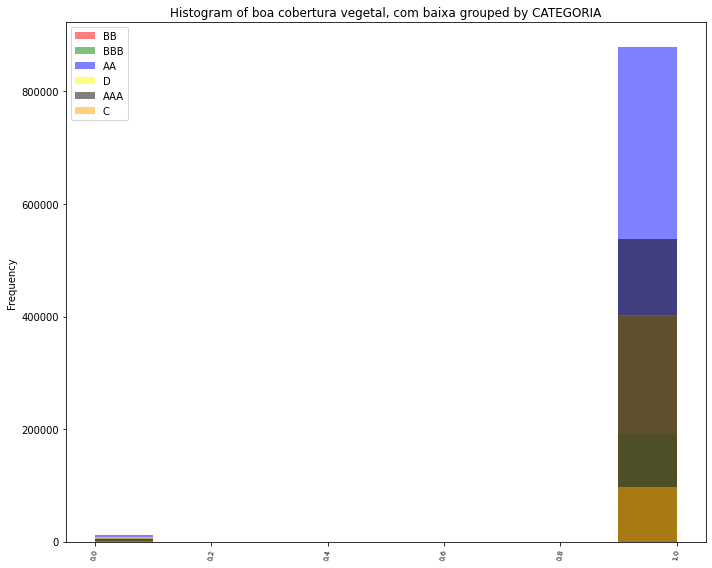

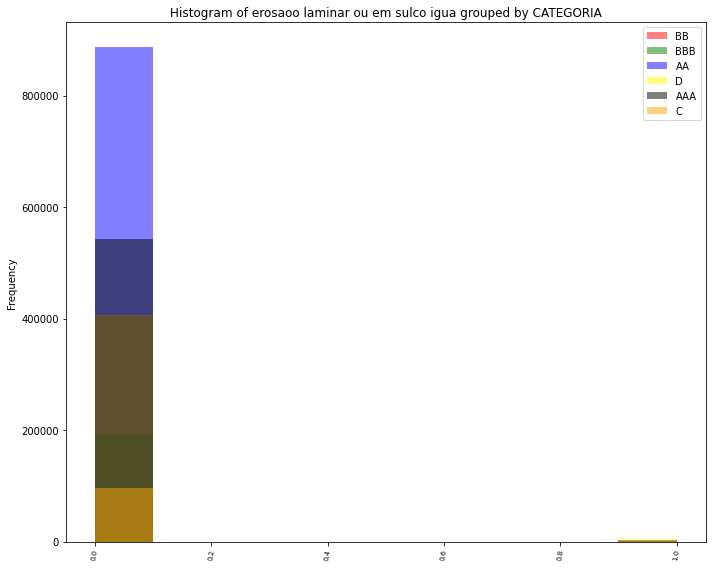

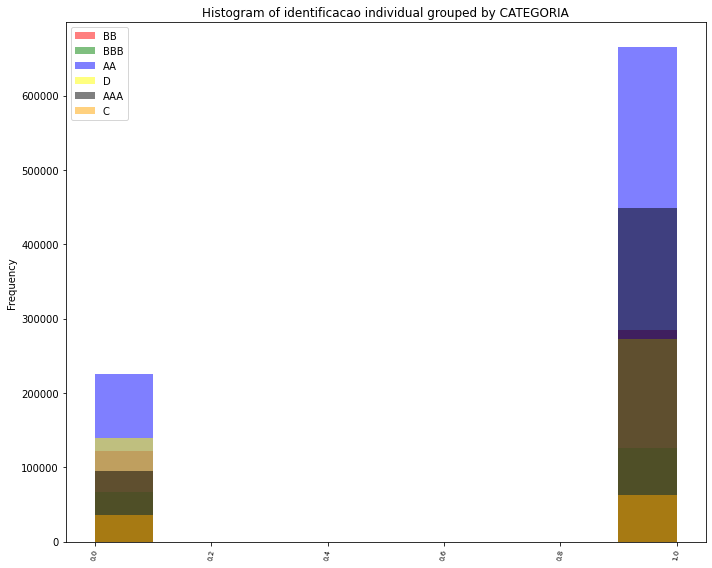

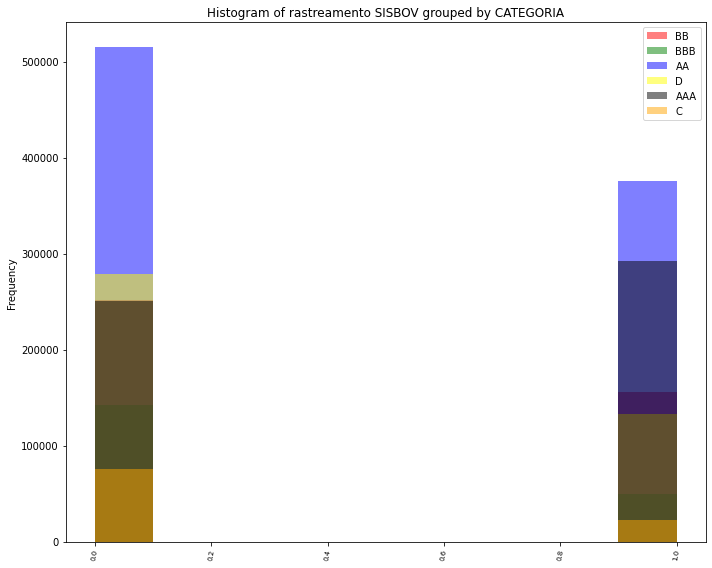

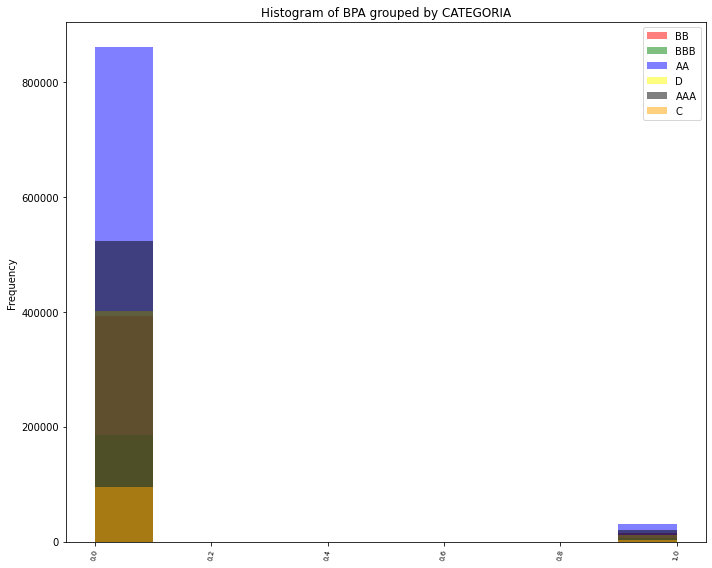

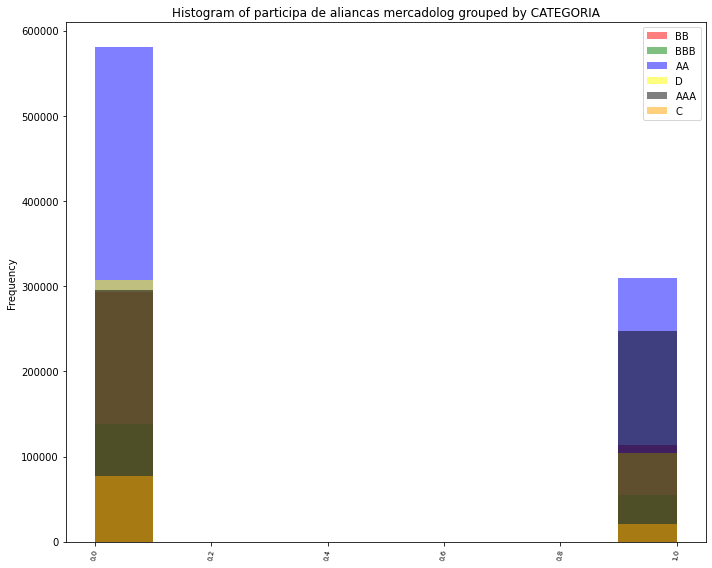

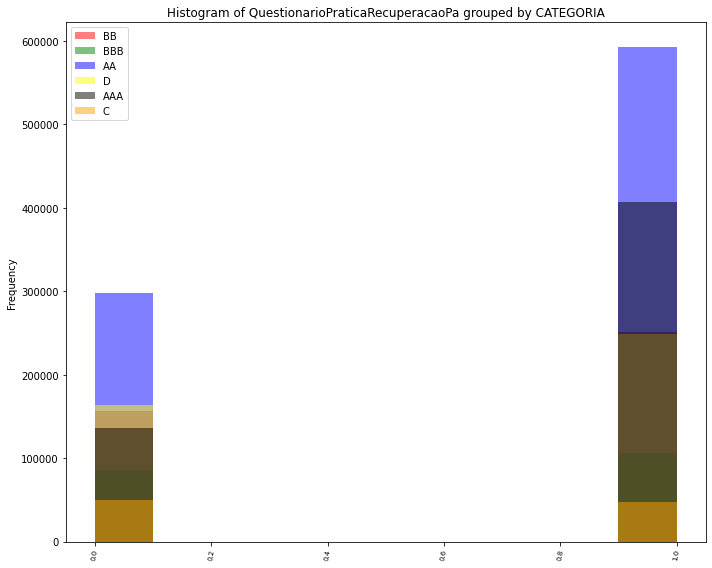

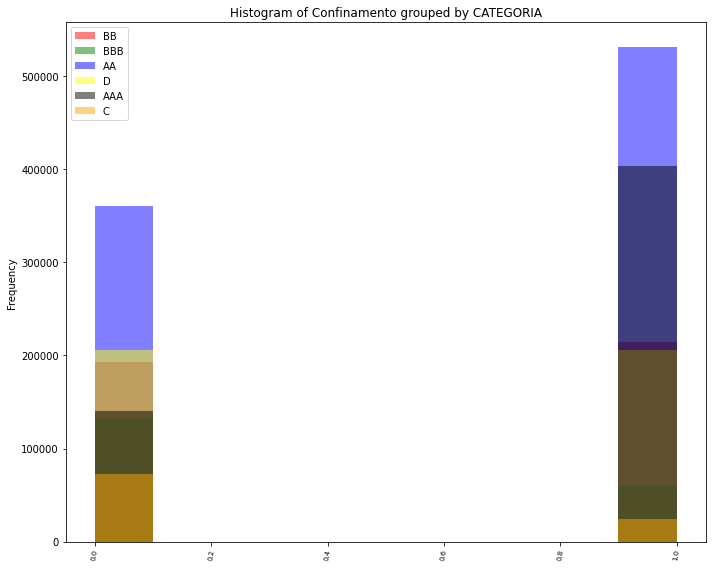

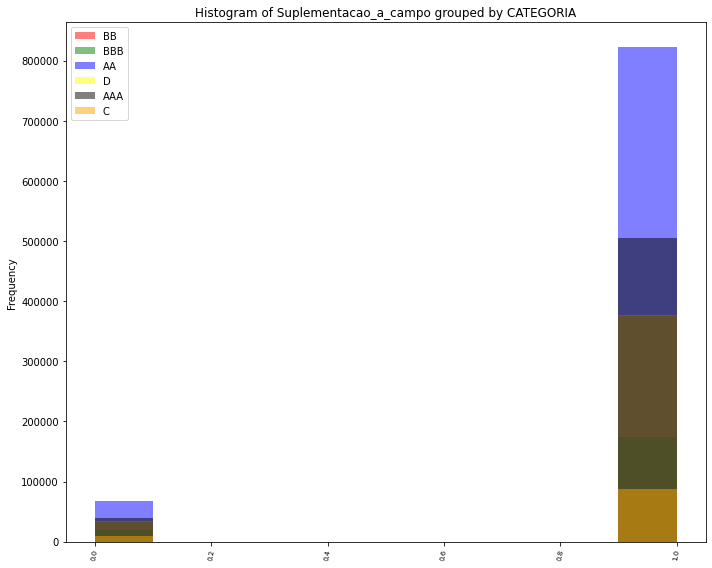

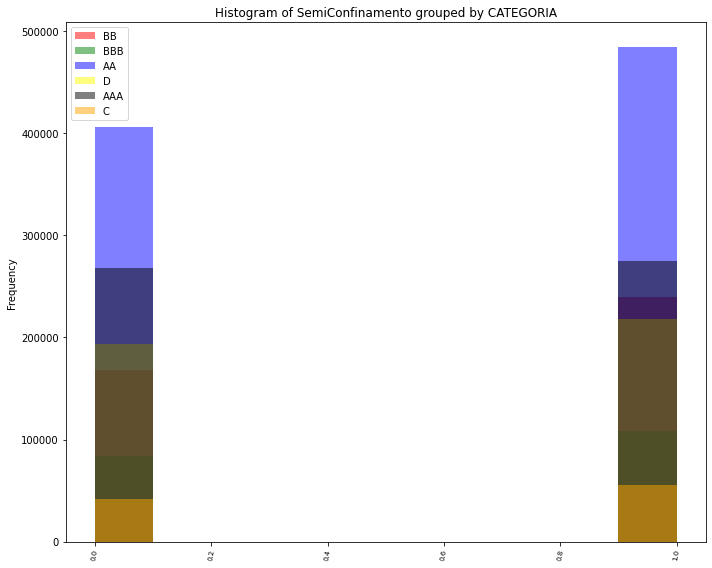

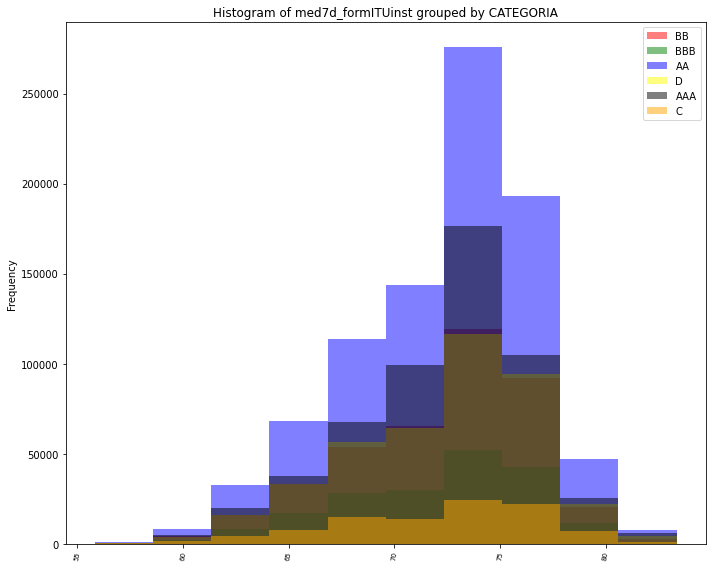

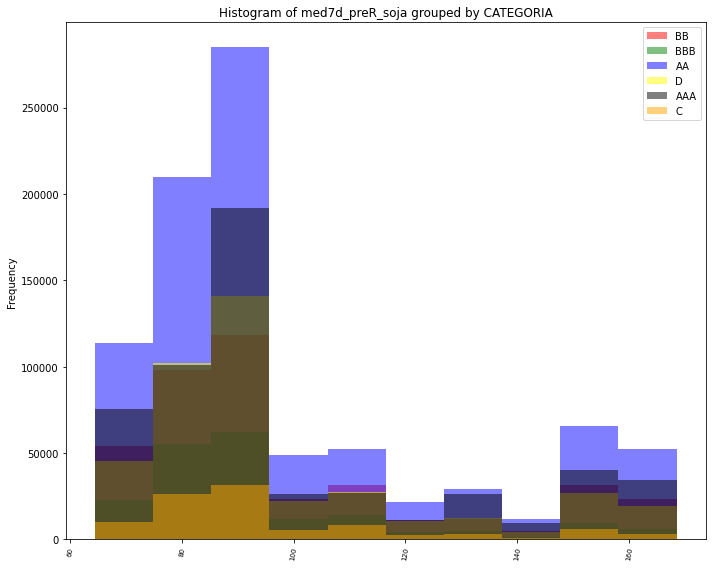

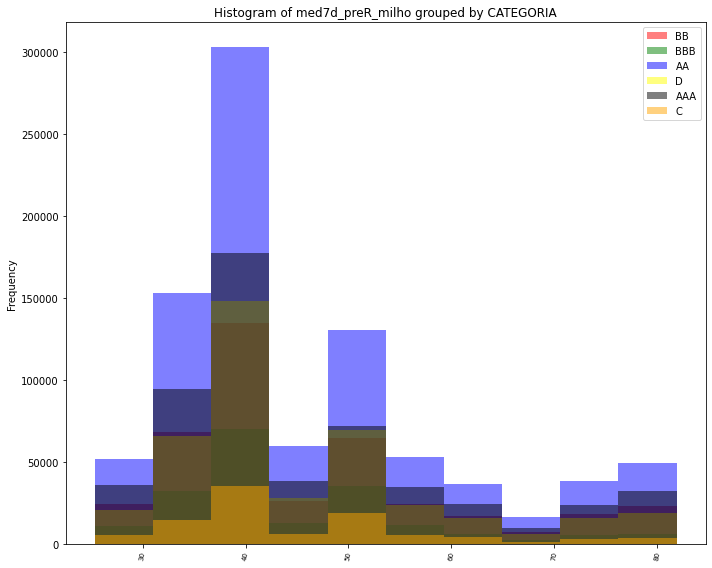

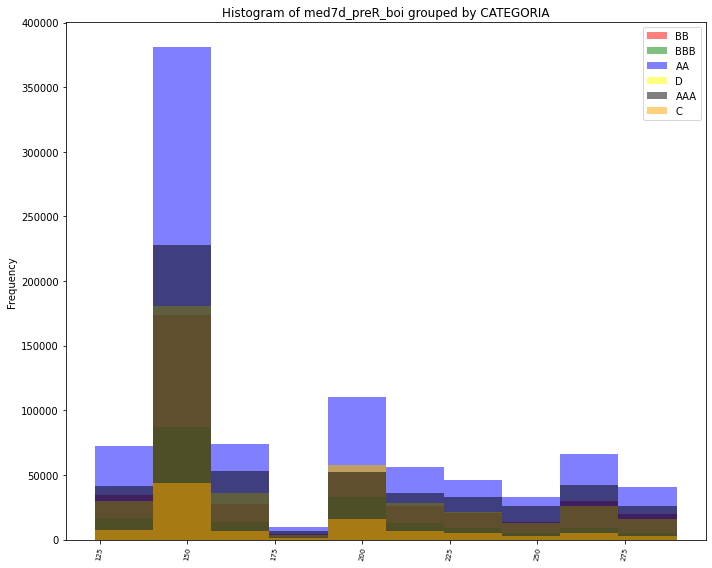

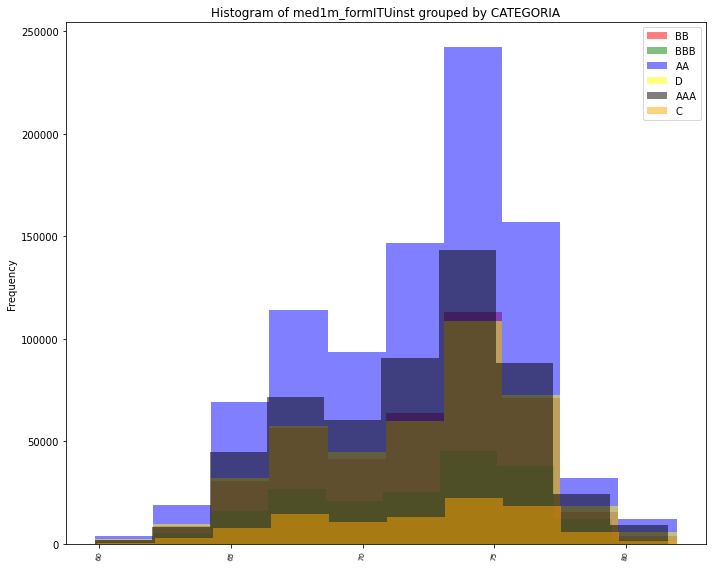

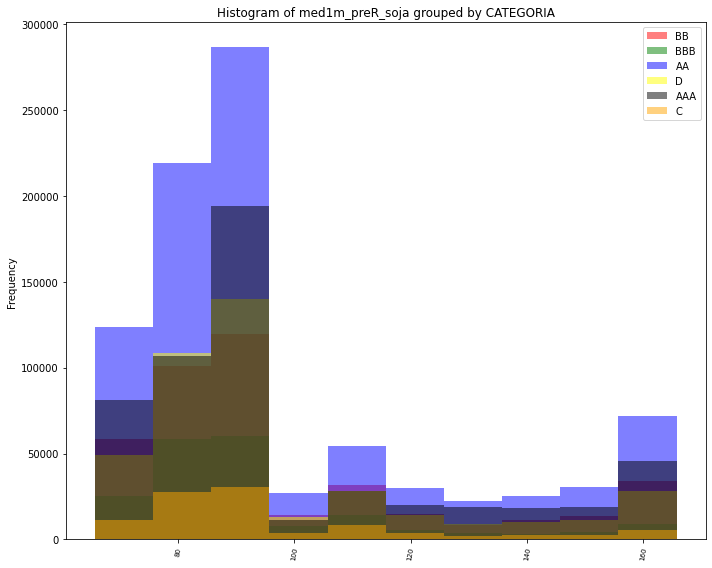

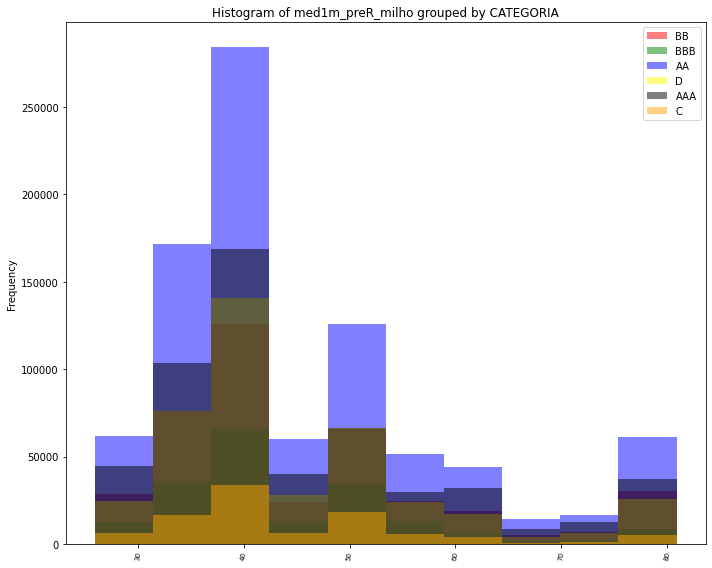

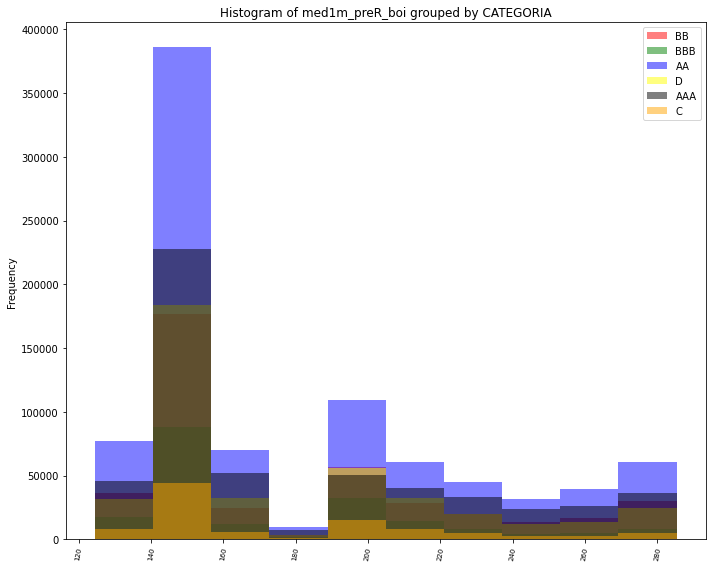

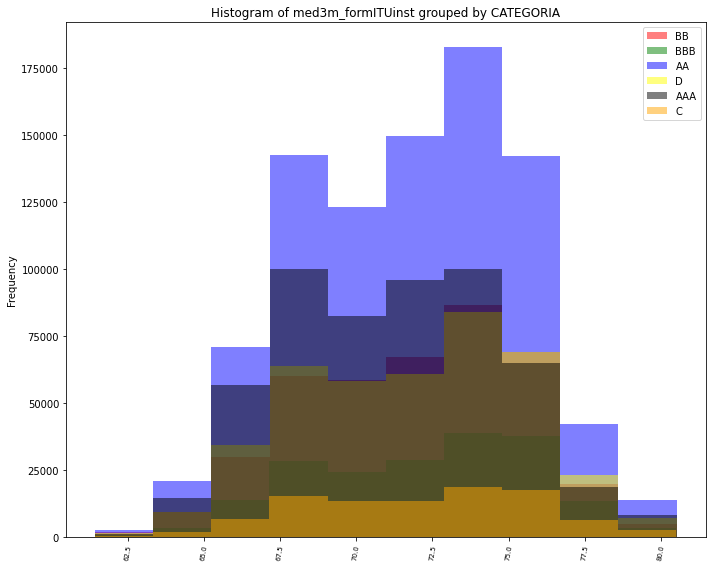

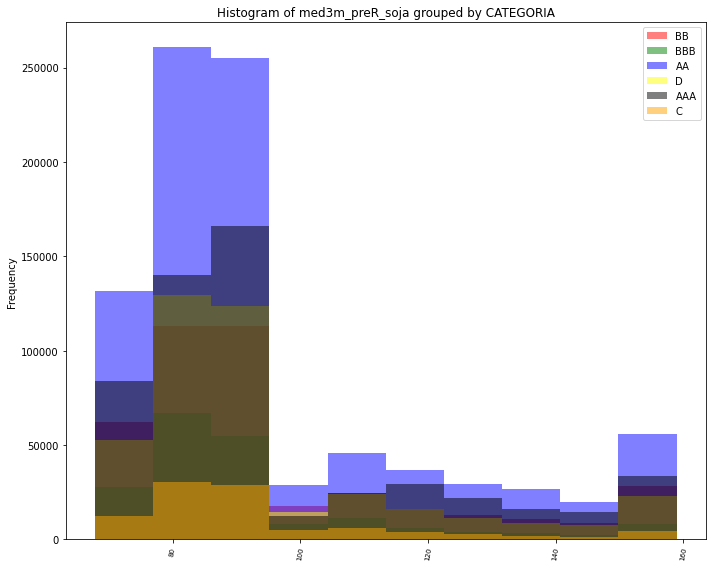

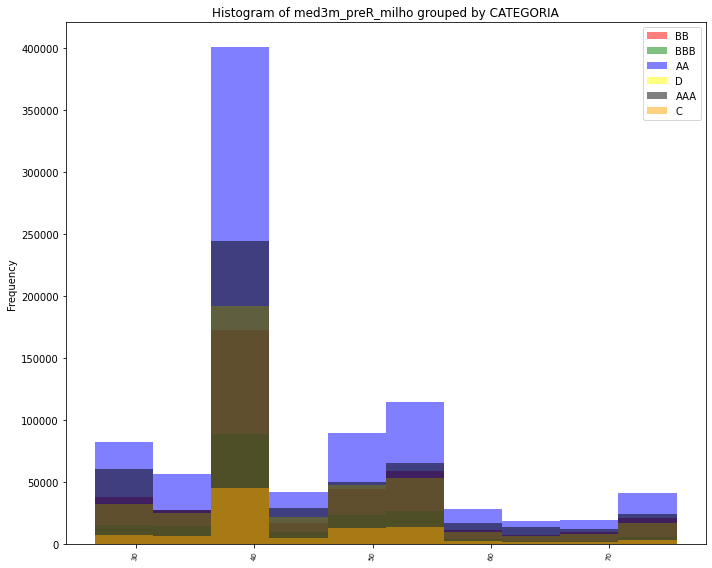

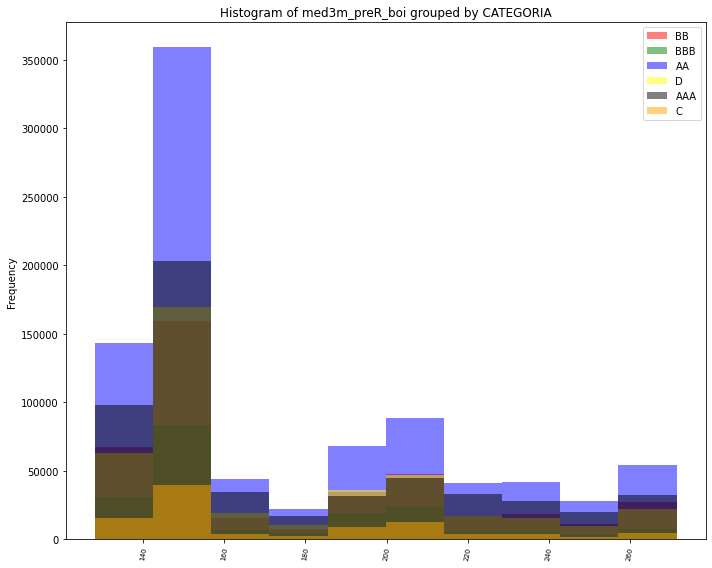

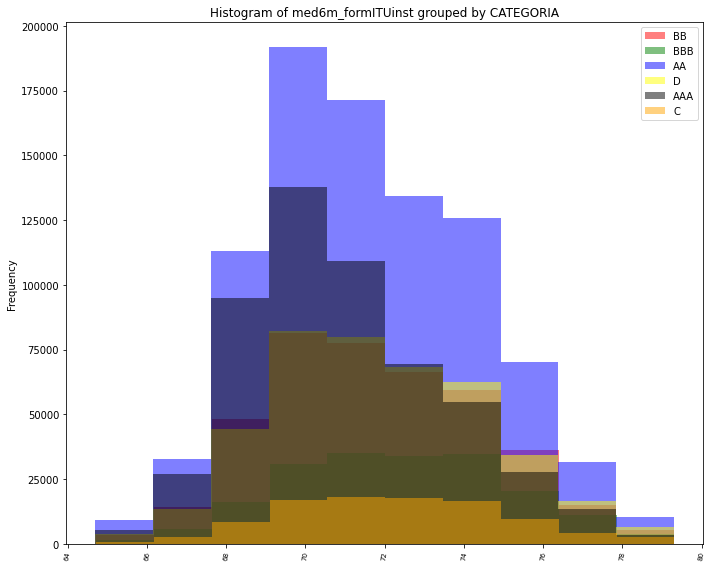

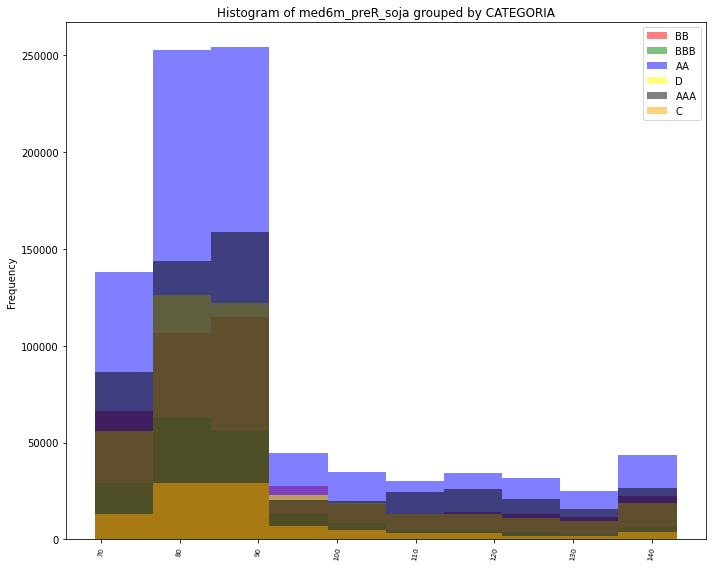

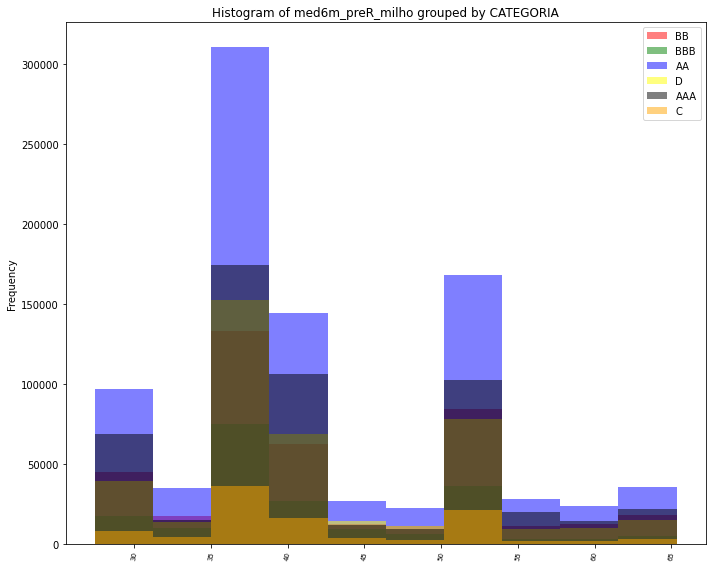

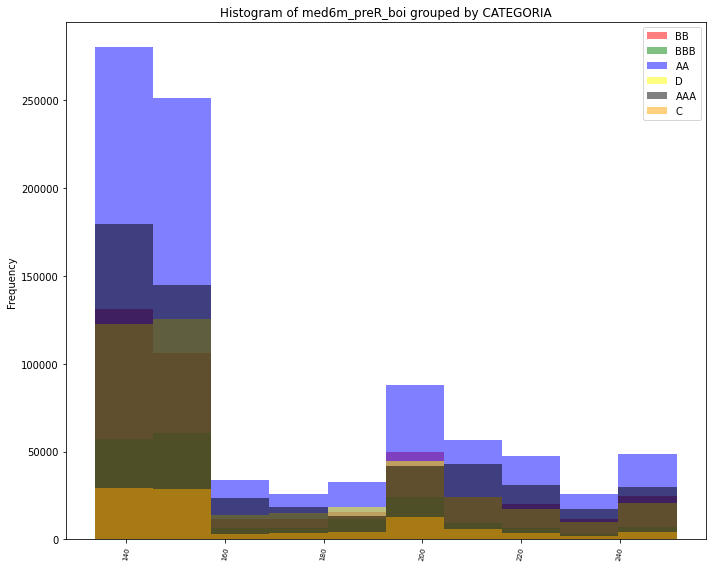

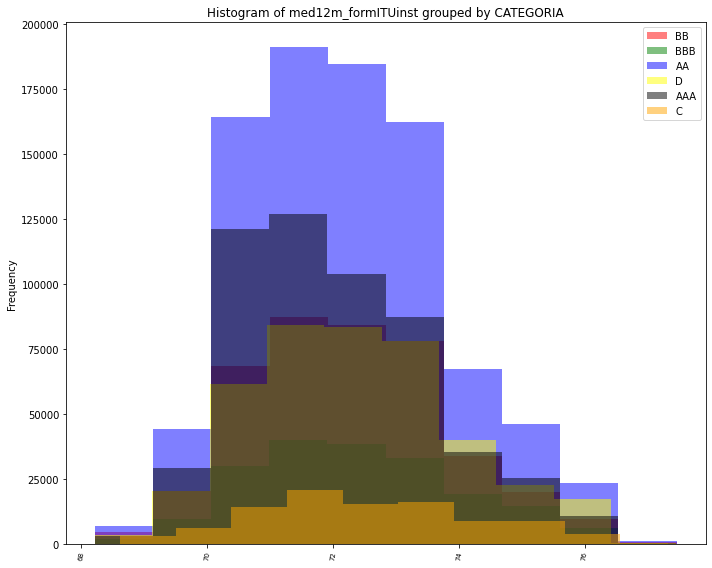

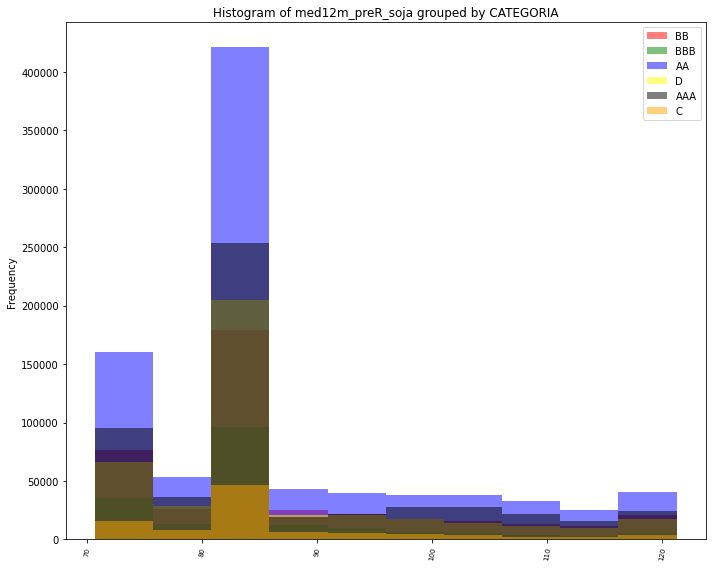

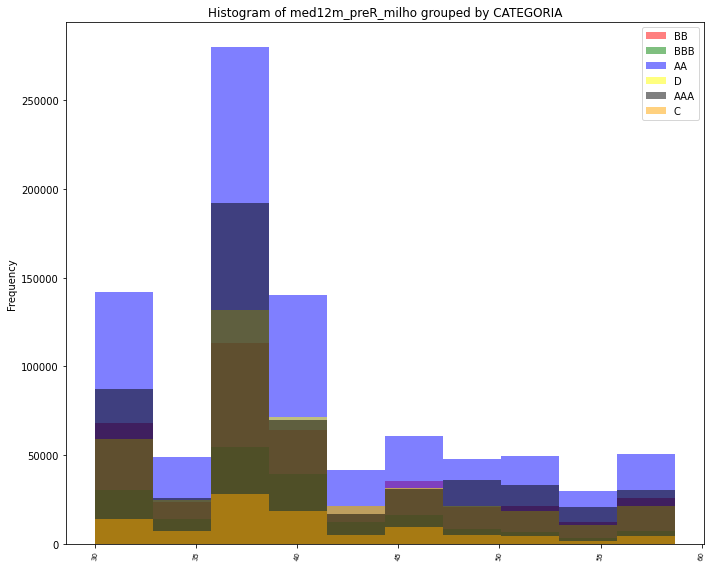

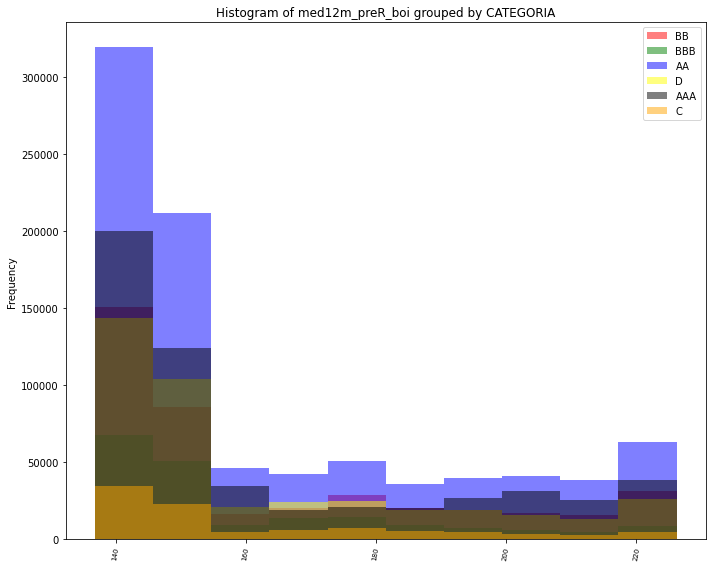

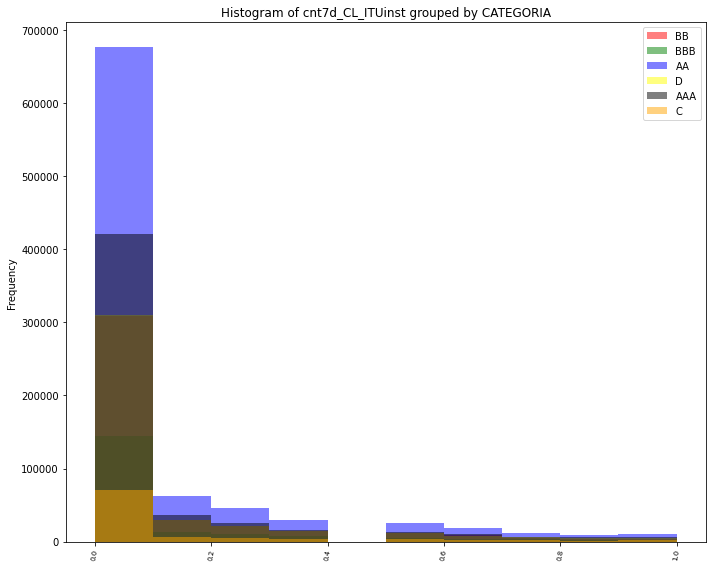

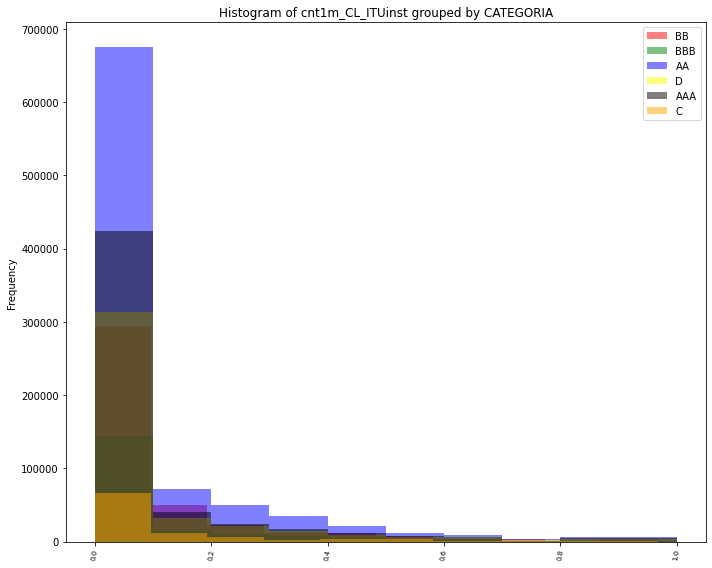

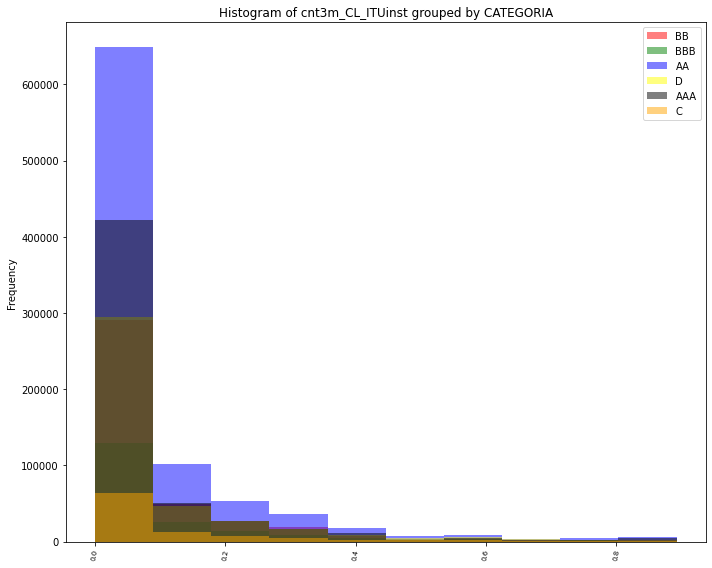

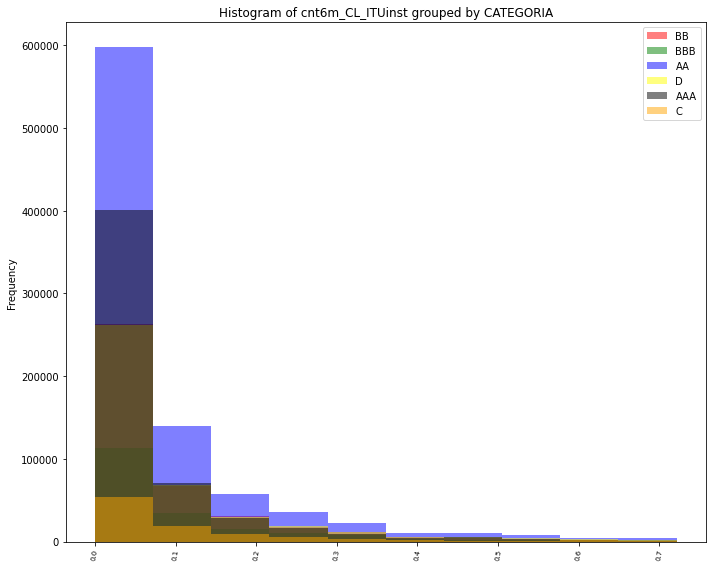

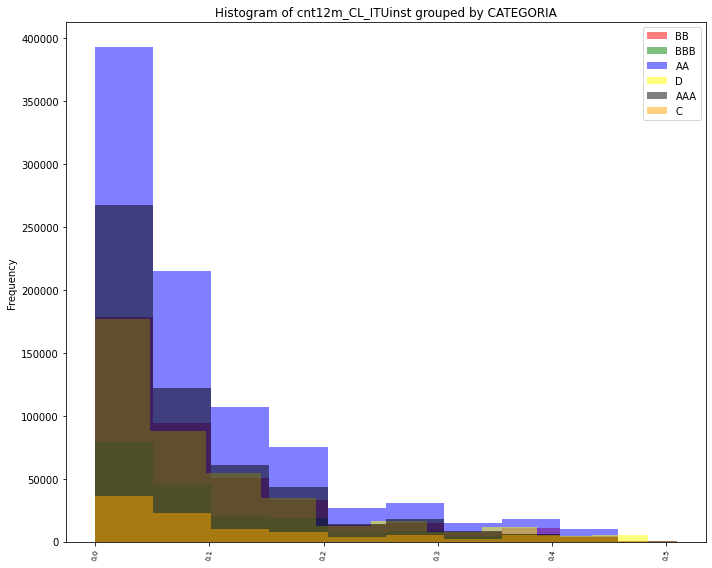

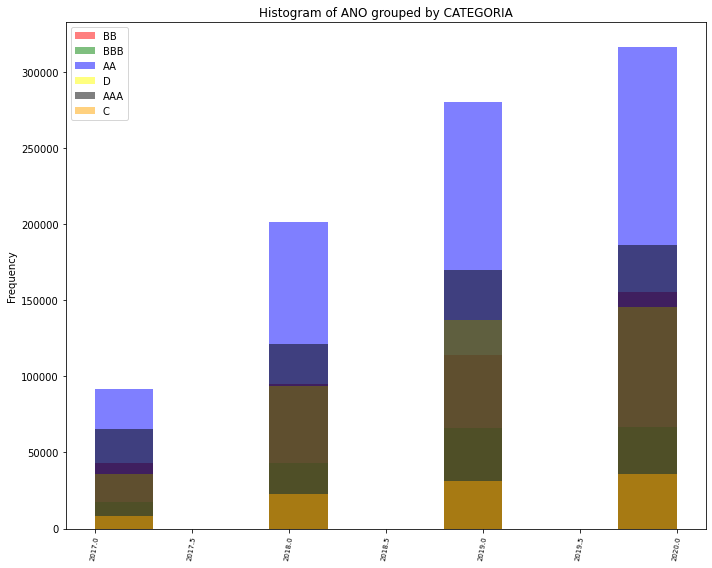

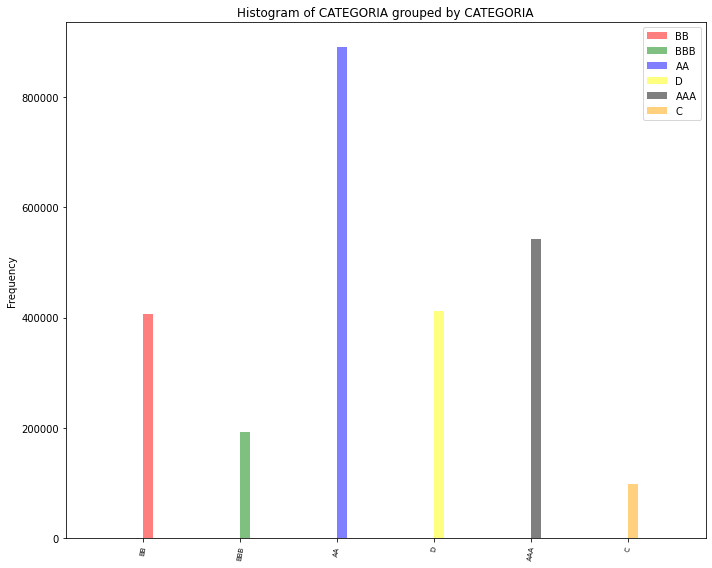

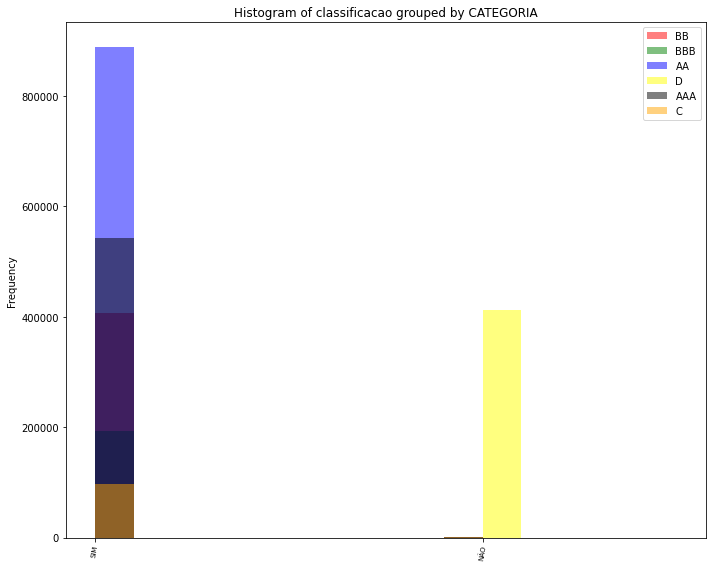



*****FIM IMPRIMIR HISTOGRAM GROUPED BY TARGET******
Function histogram_grouped_by_target Took 0:00:40.356742



In [ ]:
# Print histogram for each attribute grouped by target class
reports.histogram_grouped_by_target(
    data_frame=precoce_ms_data_frame, target=settings.class_column
)

## Print boxplot for each attribute


*****INICIO IMPRIMIR BOXPLOT******


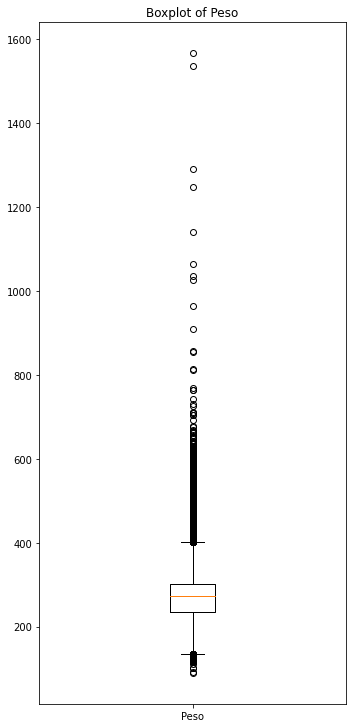

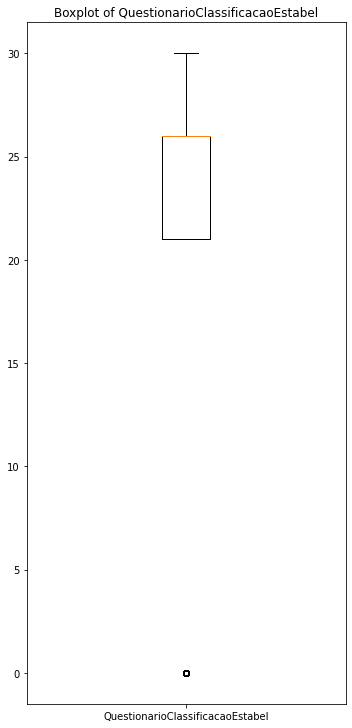

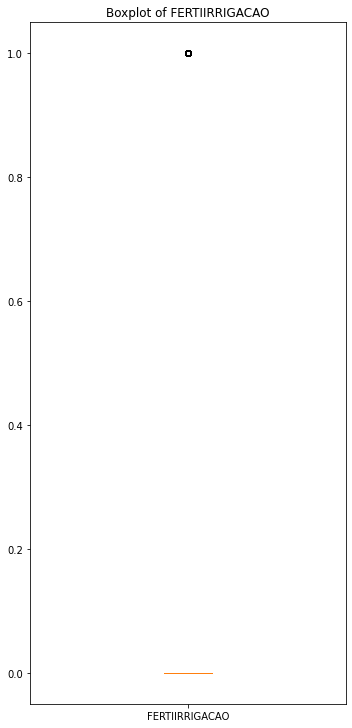

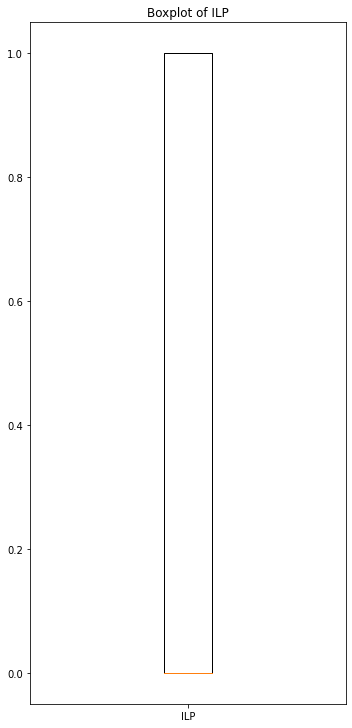

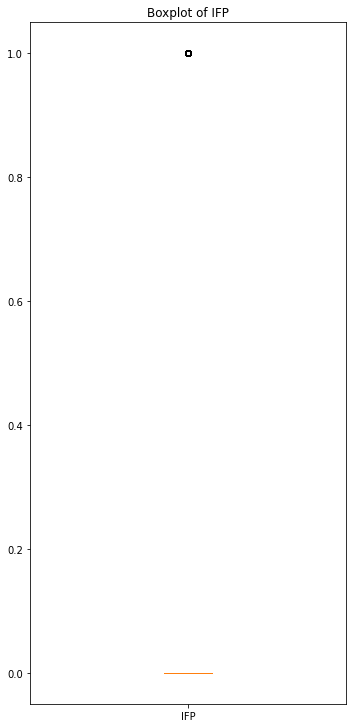

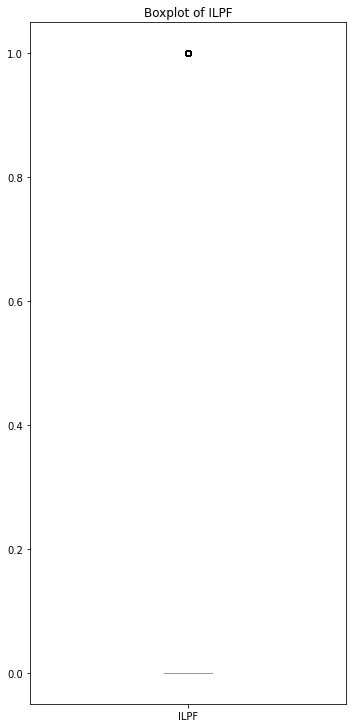

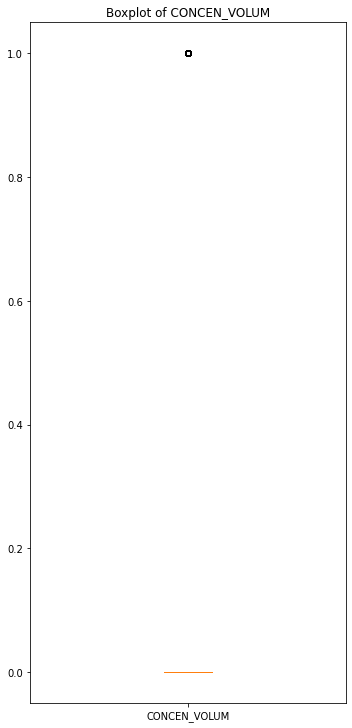

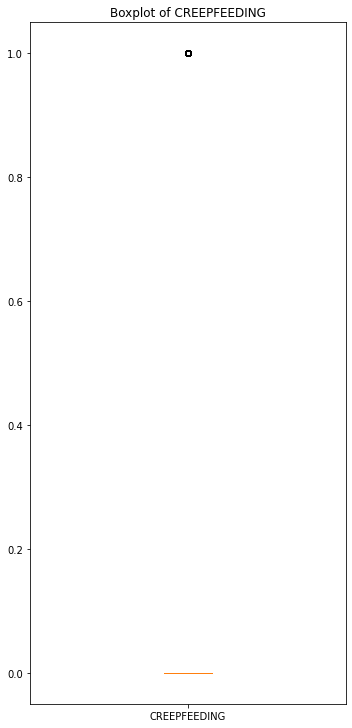

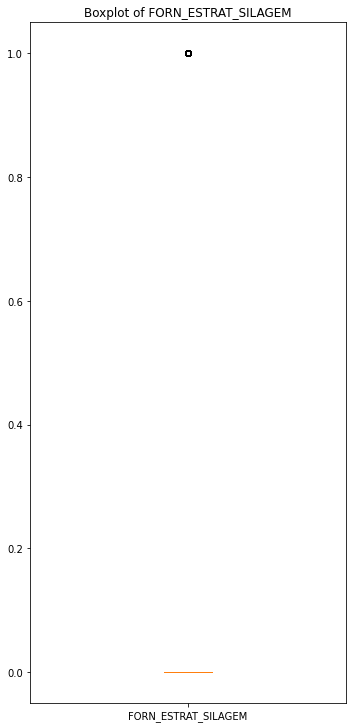

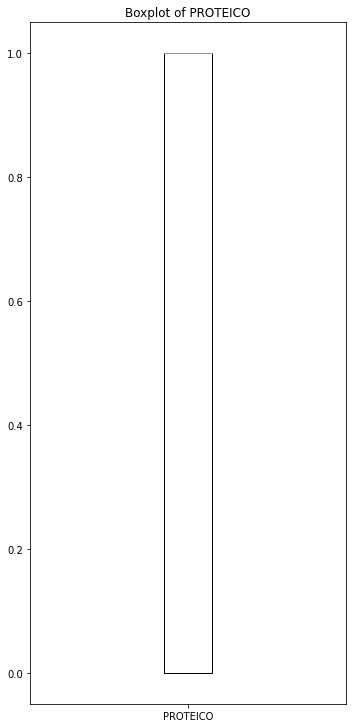

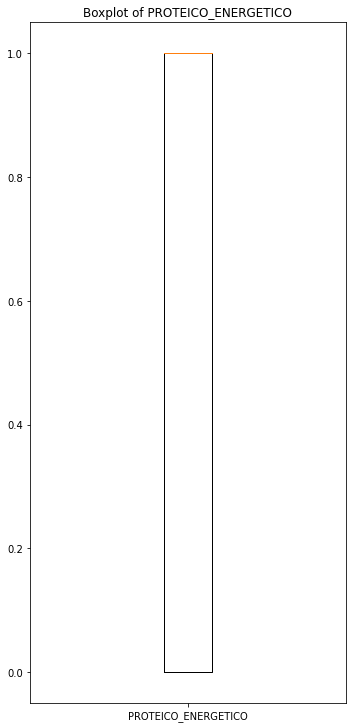

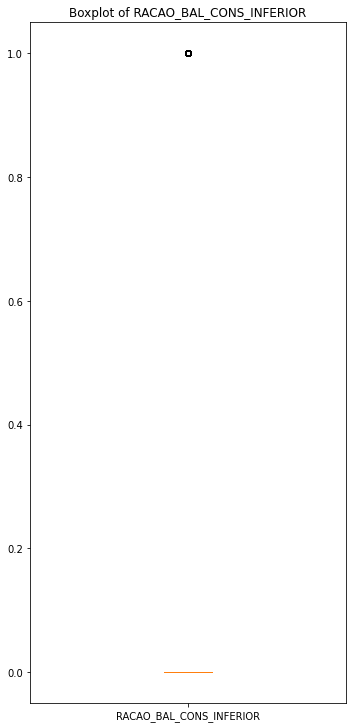

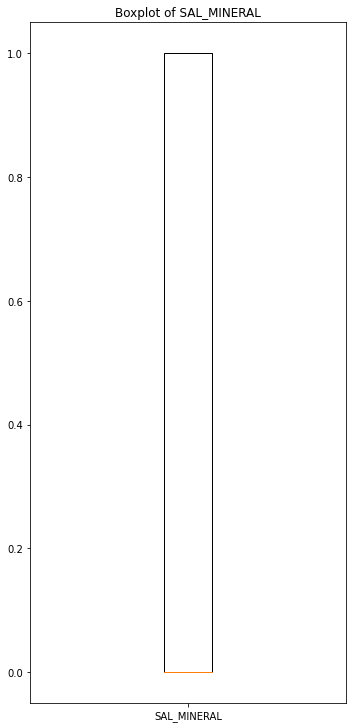

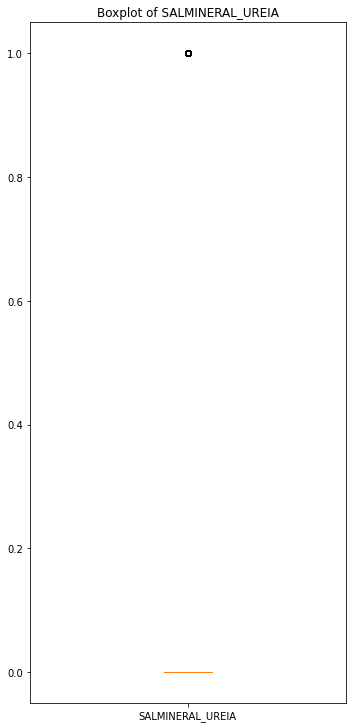

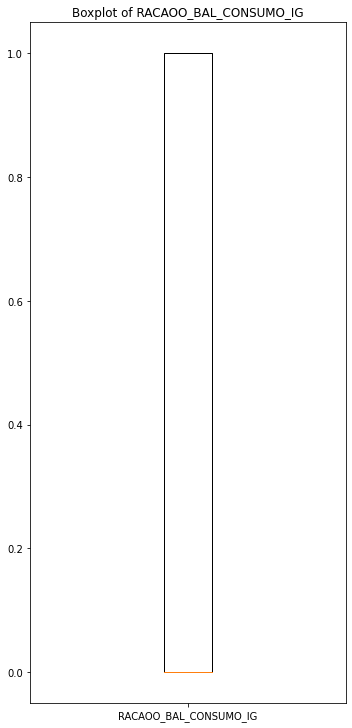

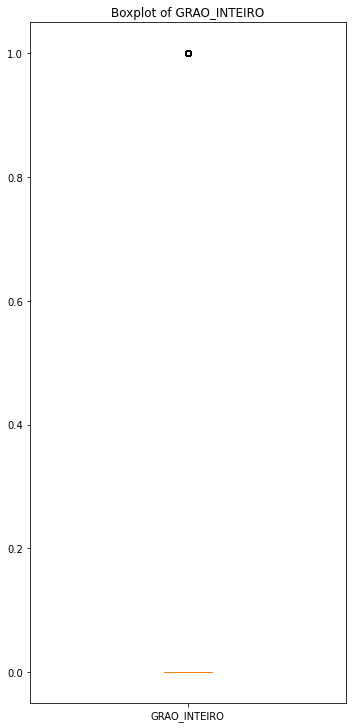

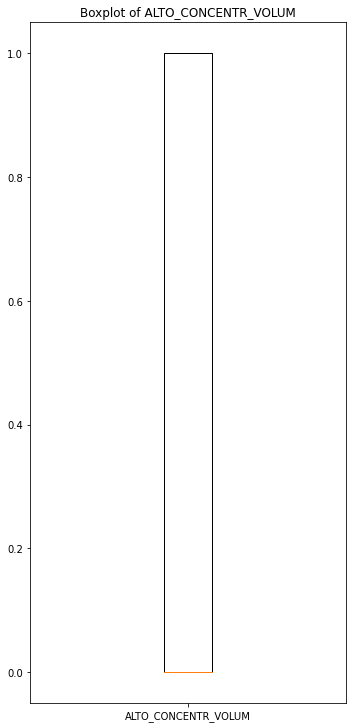

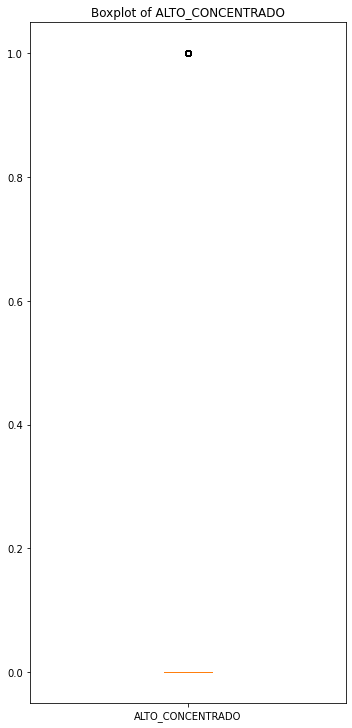

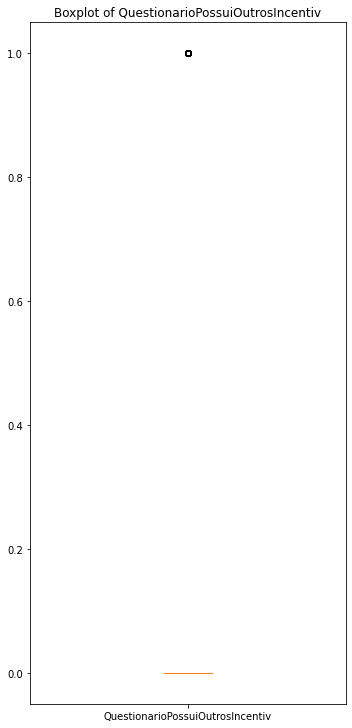

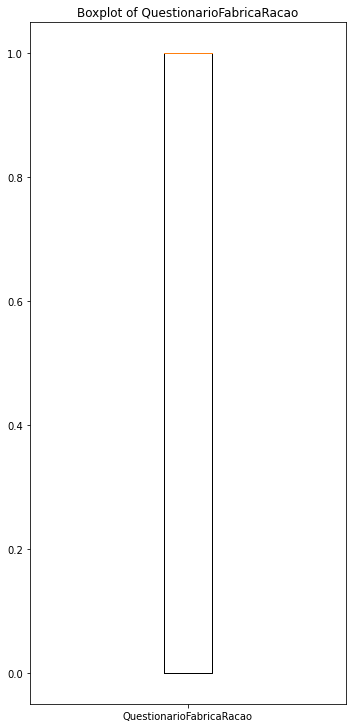

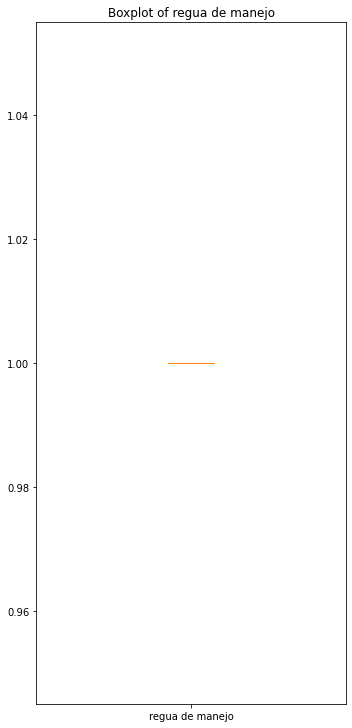

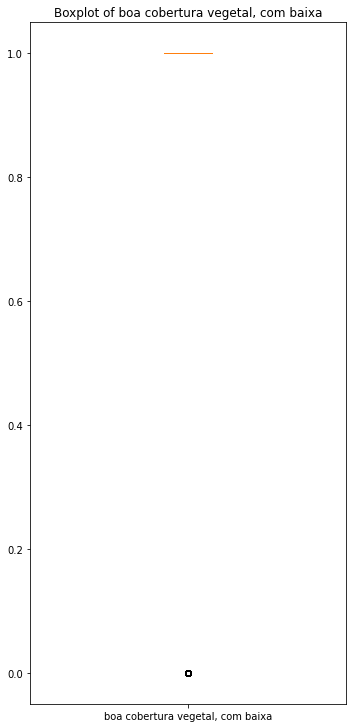

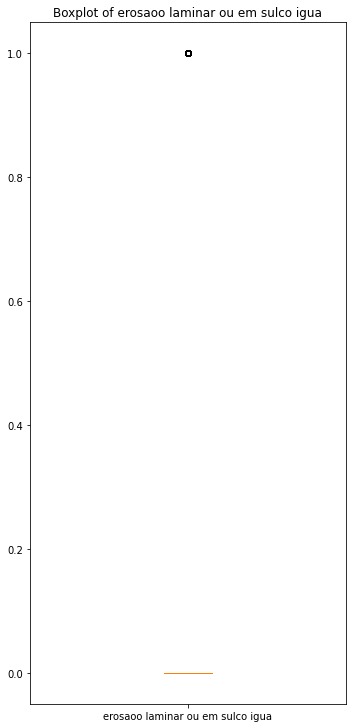

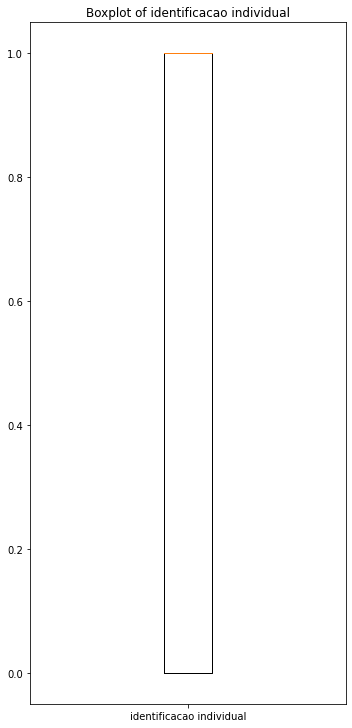

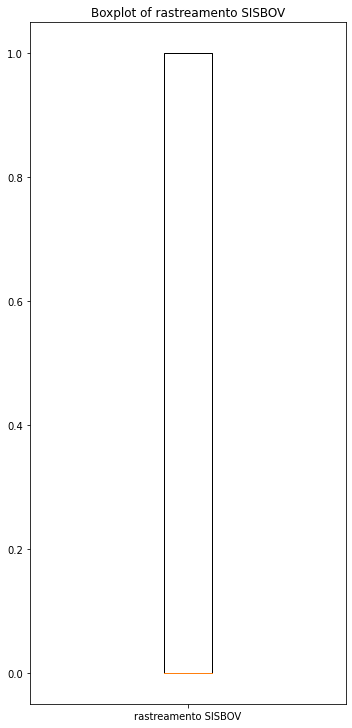

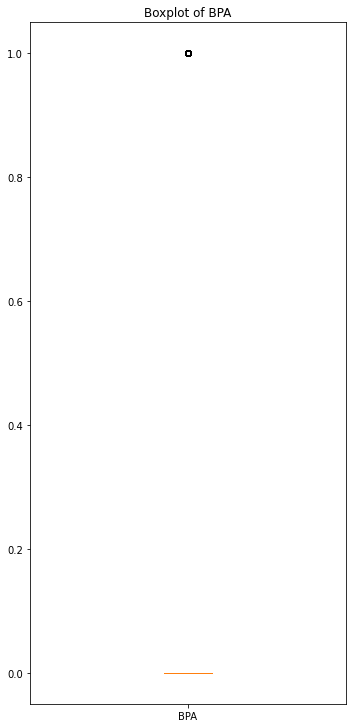

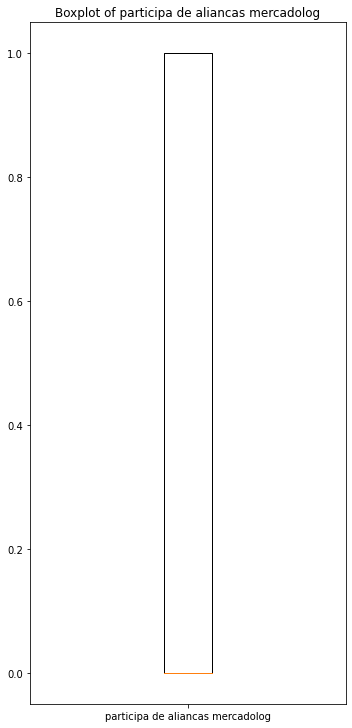

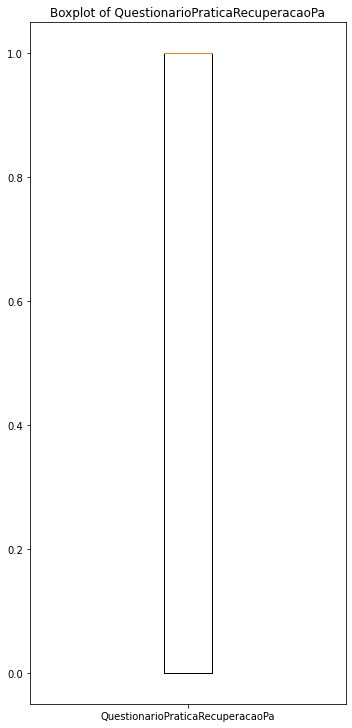

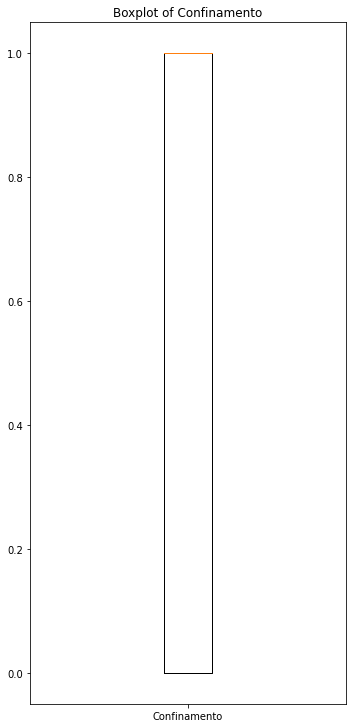

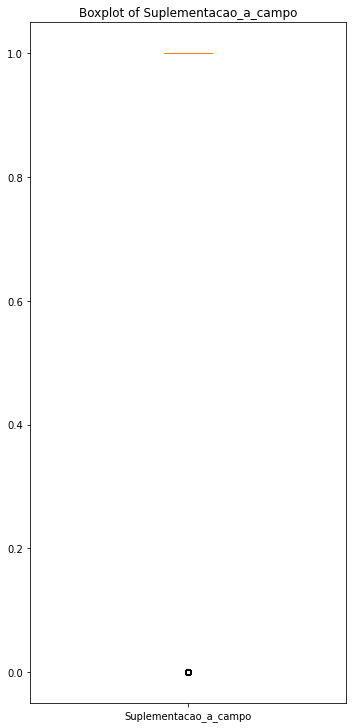

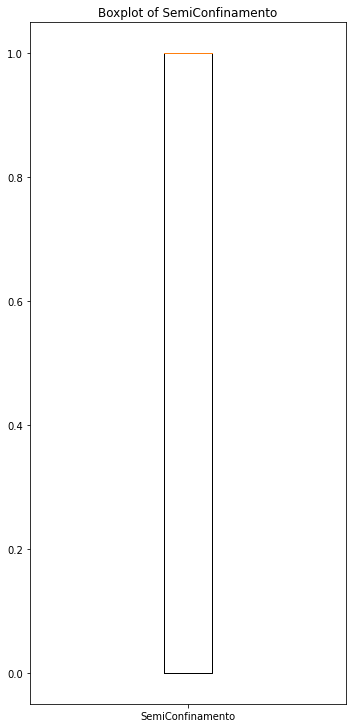

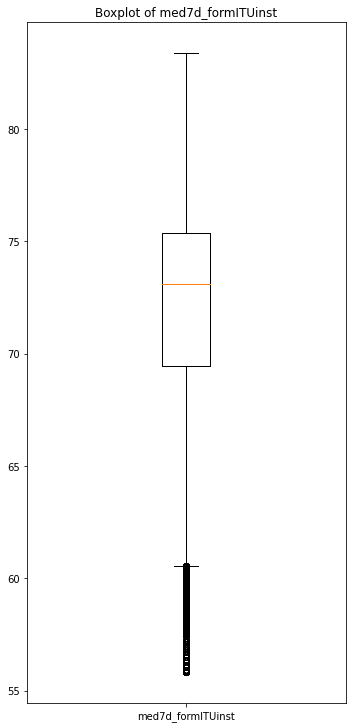

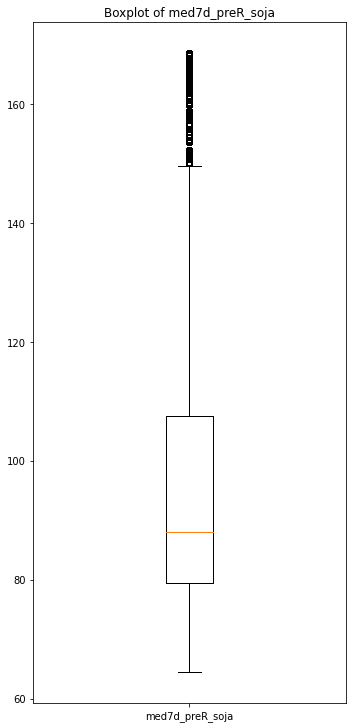

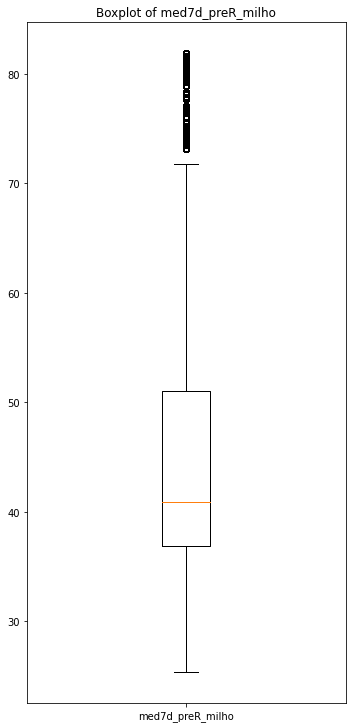

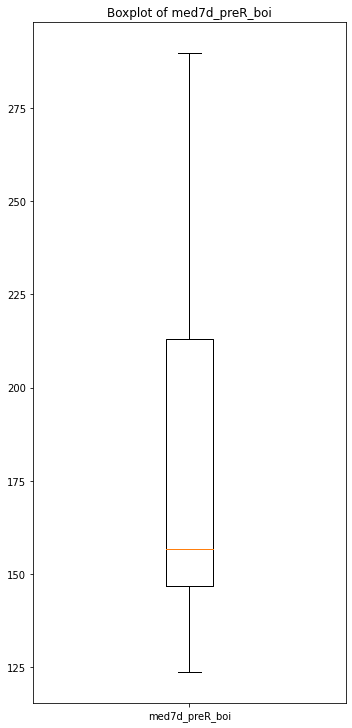

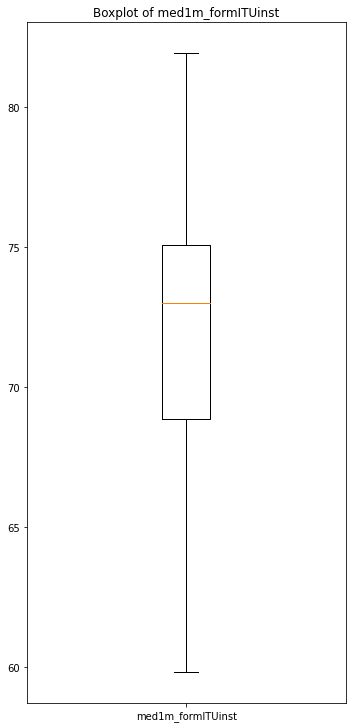

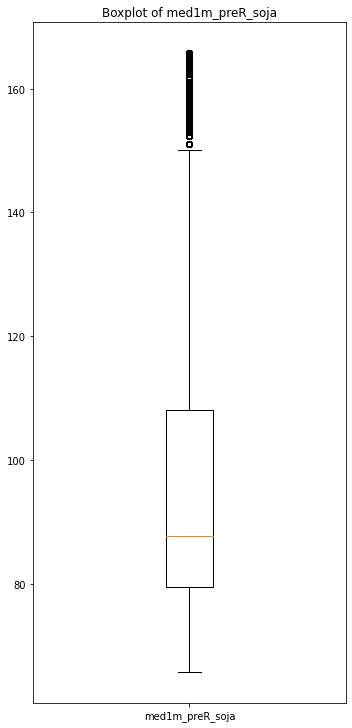

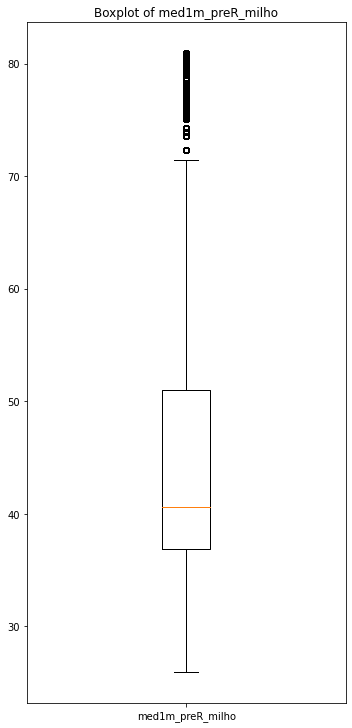

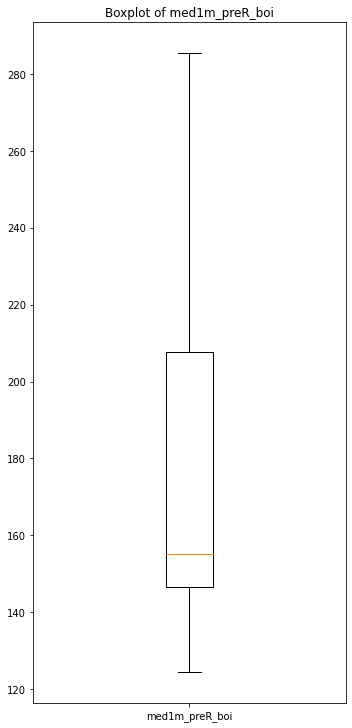

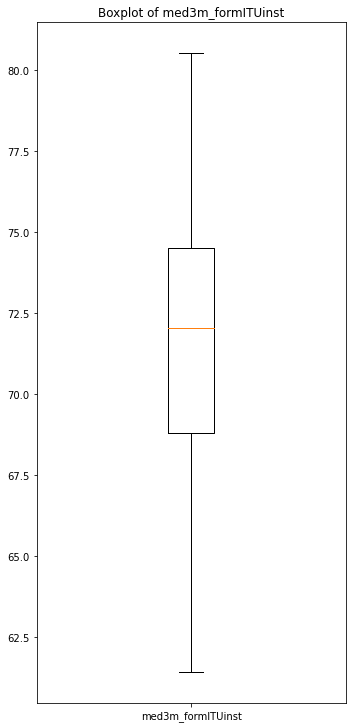

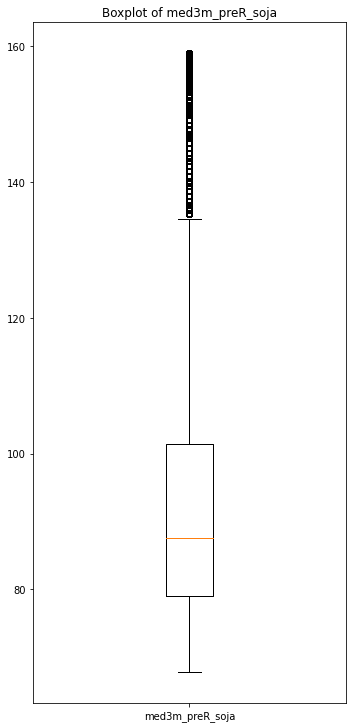

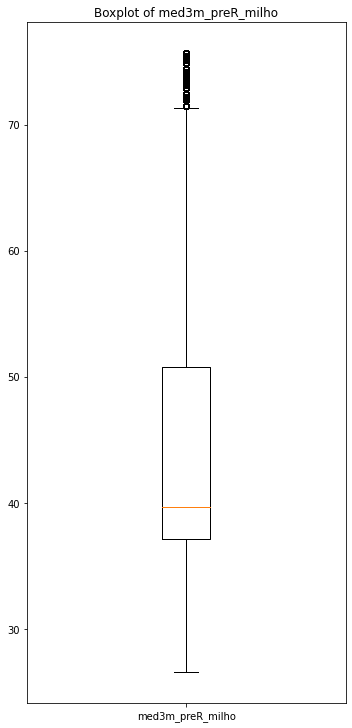

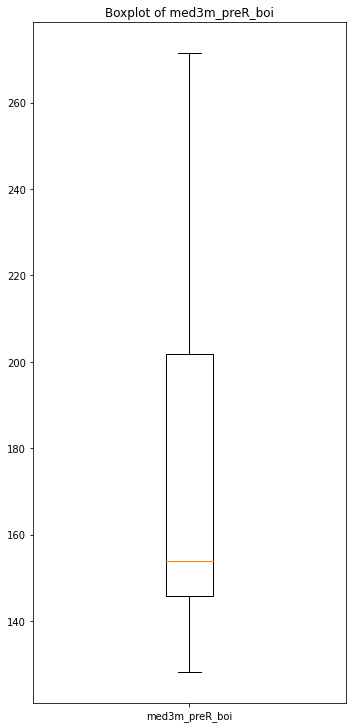

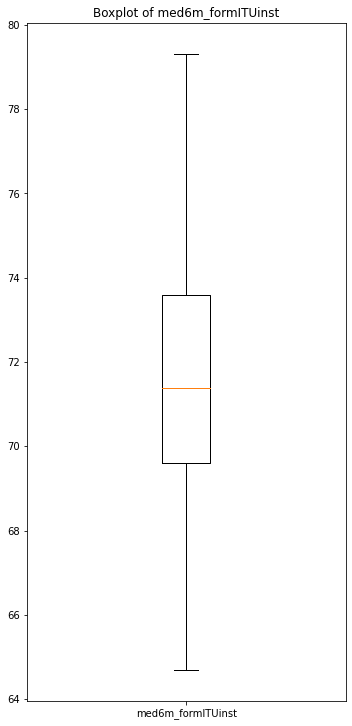

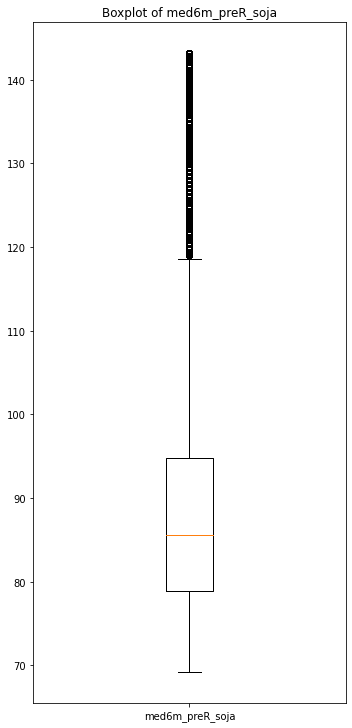

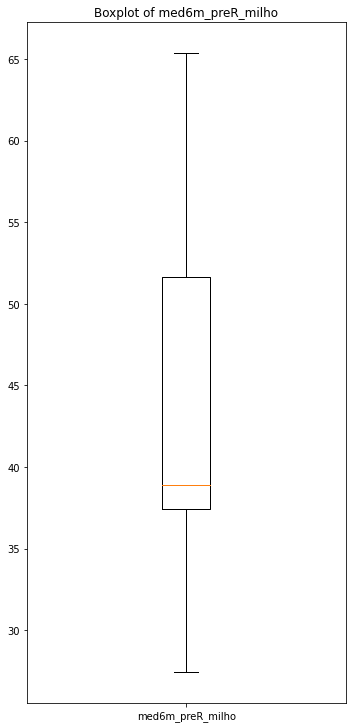

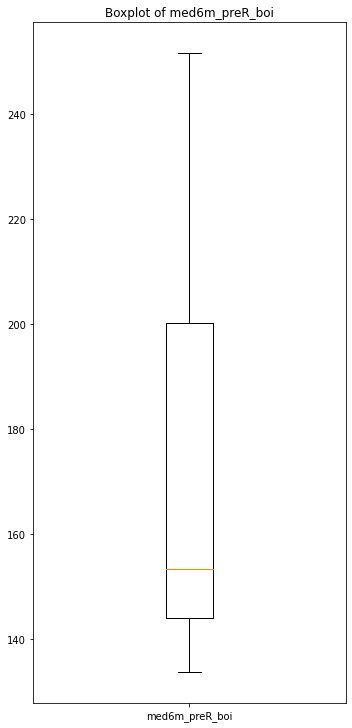

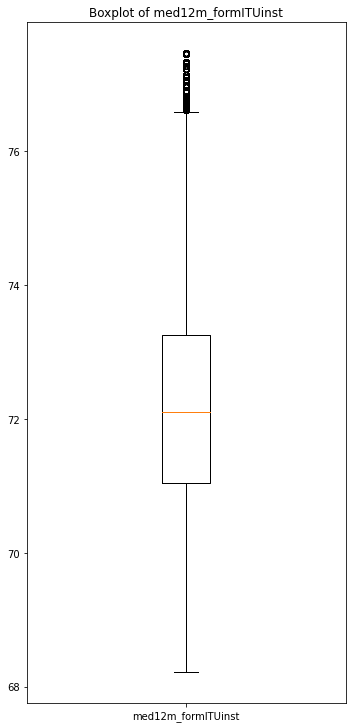

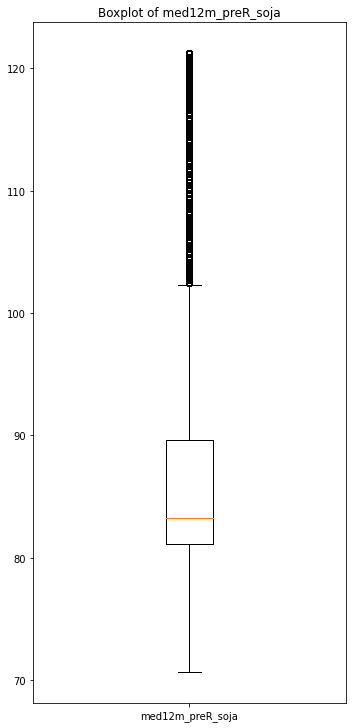

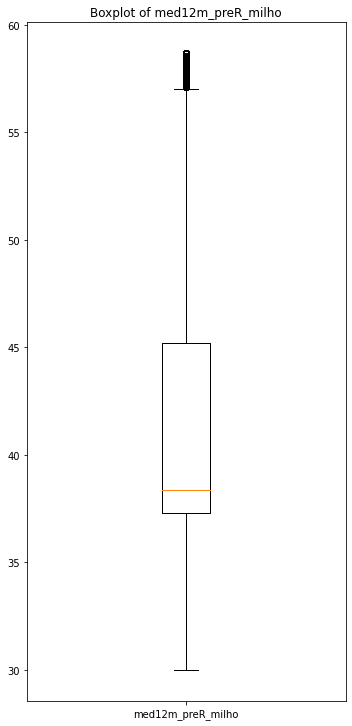

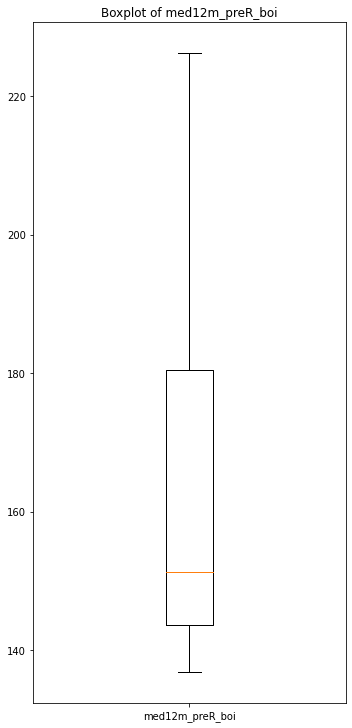

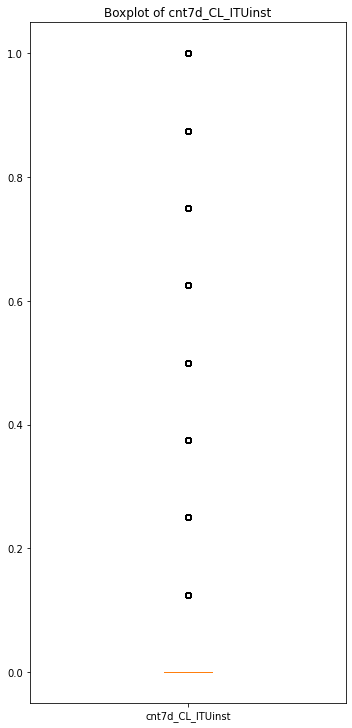

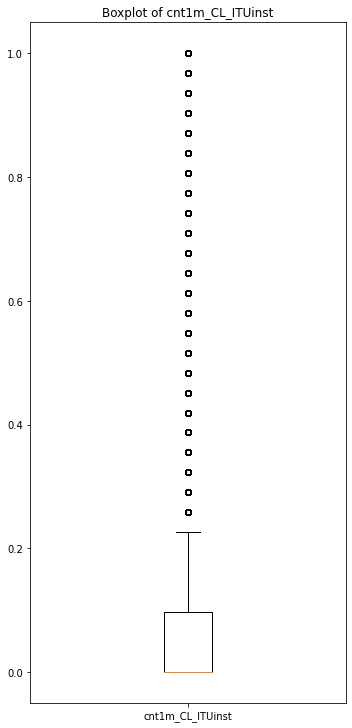

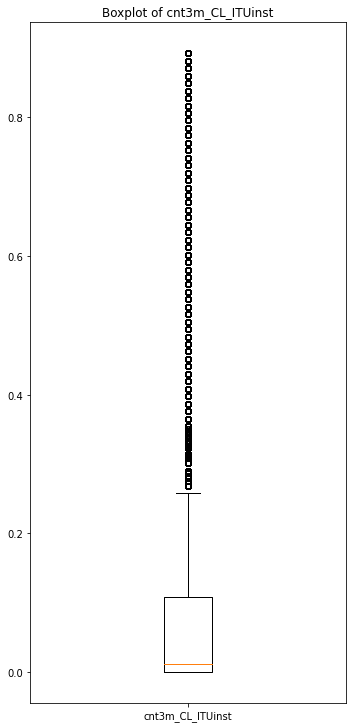

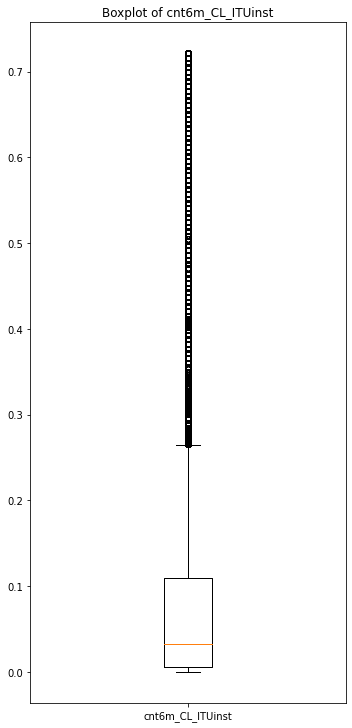

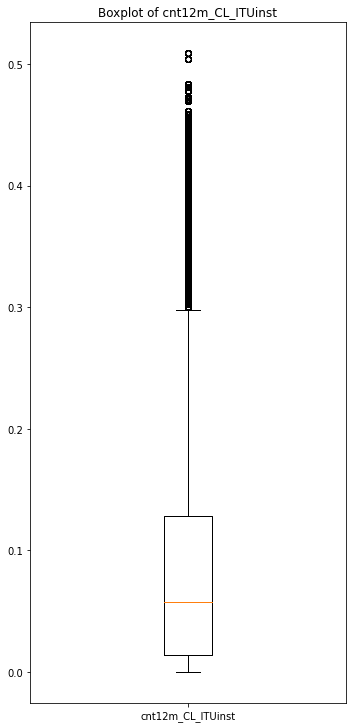

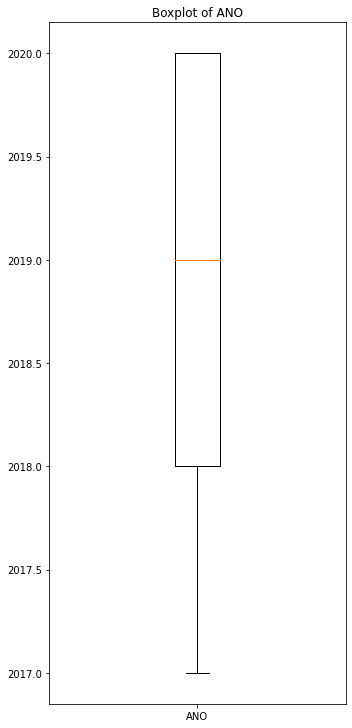



*****FIM IMPRIMIR BOXPLOT******
Function boxplot Took 0:00:19.667177



In [ ]:
# Print boxplot for each attribute
reports.boxplot(data_frame=precoce_ms_data_frame)

## Print boxplot for each attribute by target class


*****INICIO IMPRIMIR BOXPLOT GROUPED BY TARGET******


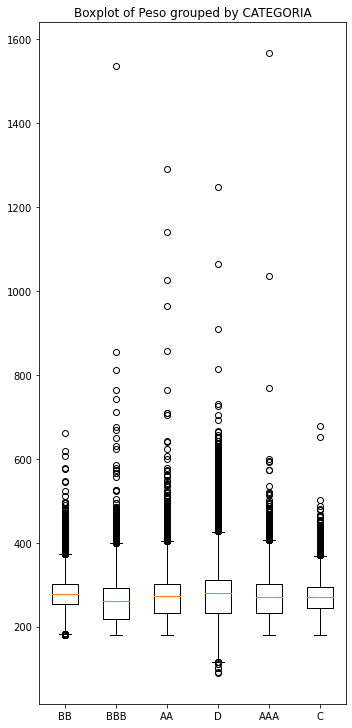

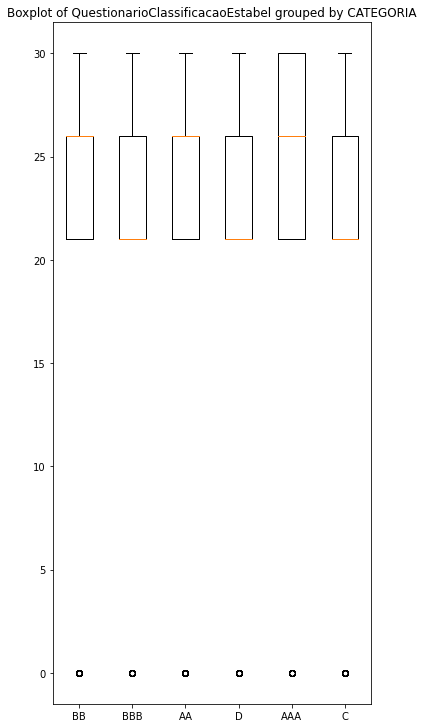

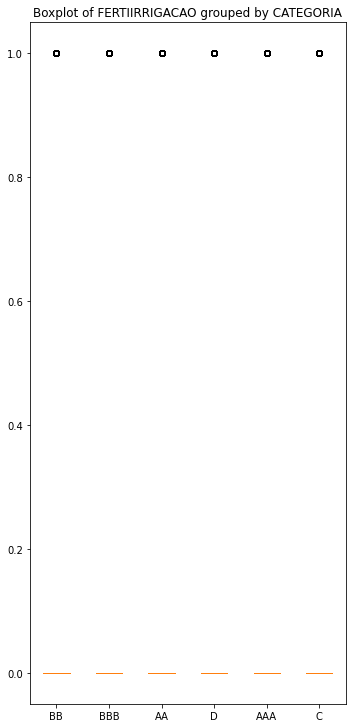

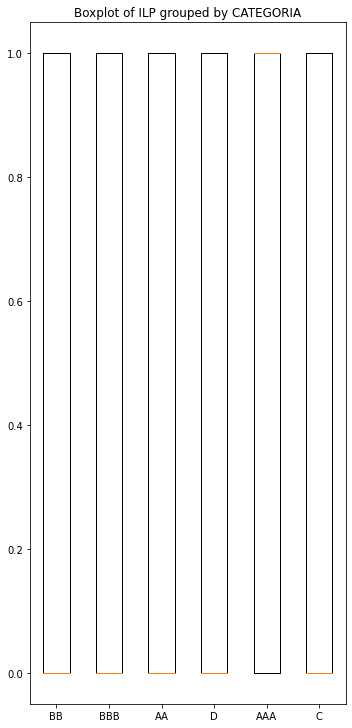

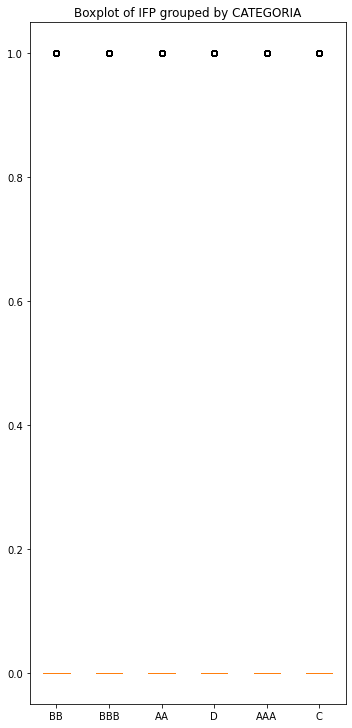

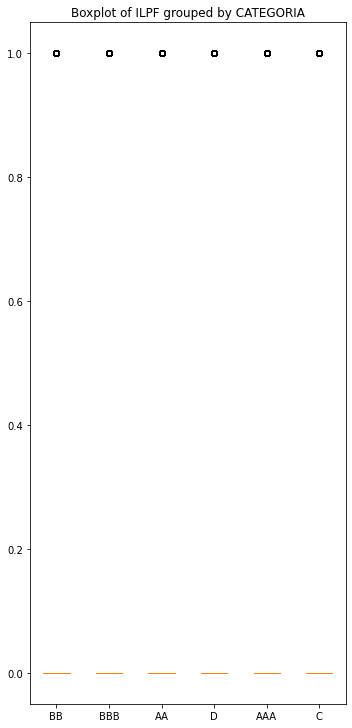

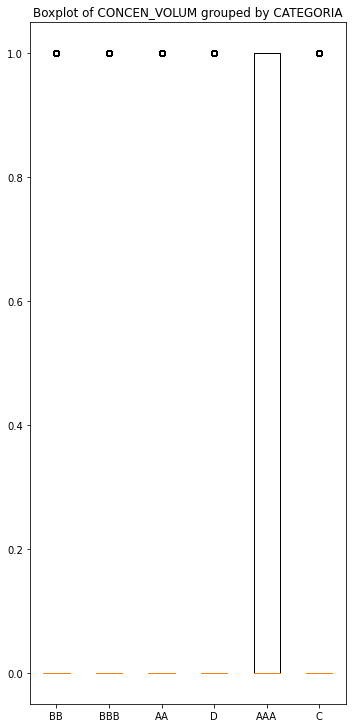

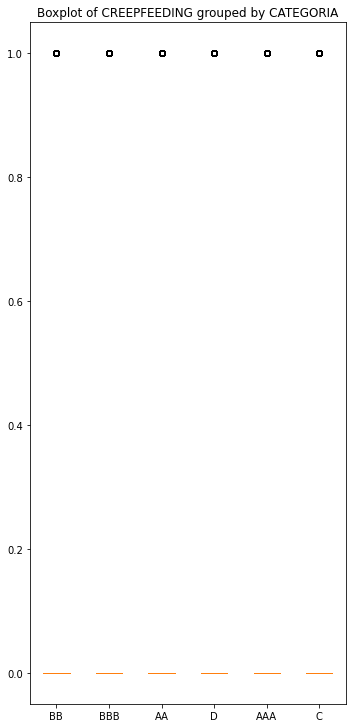

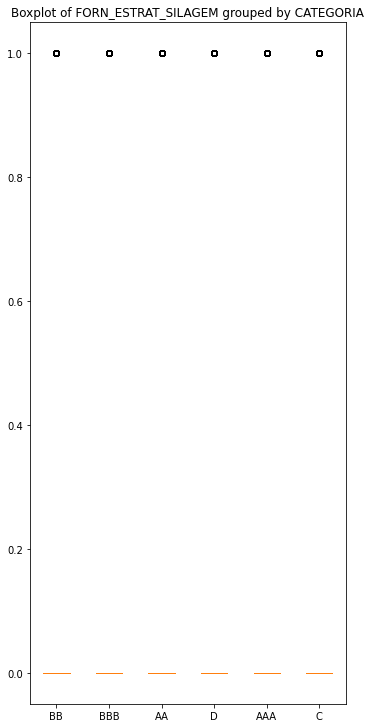

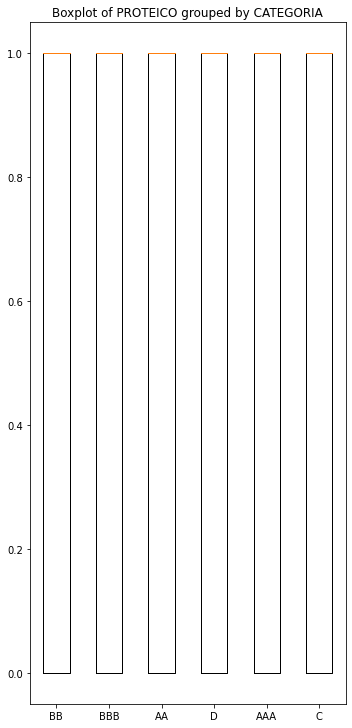

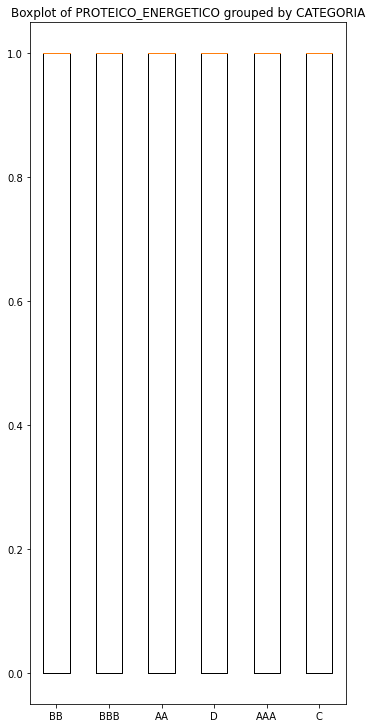

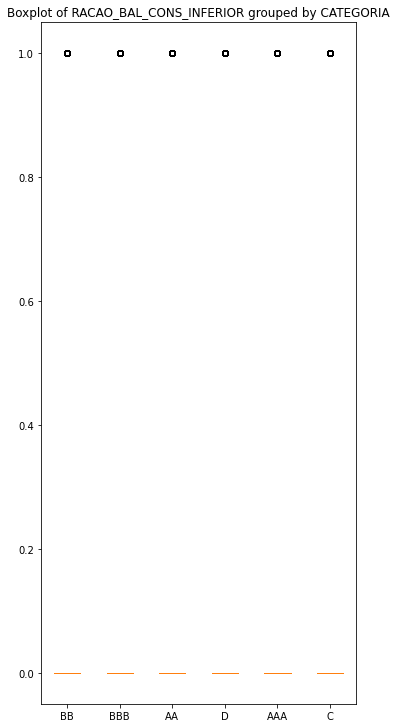

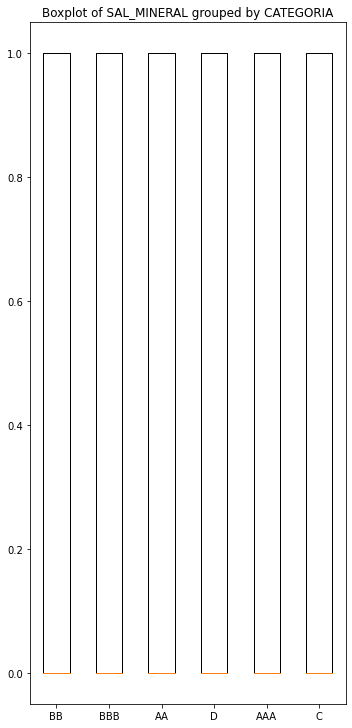

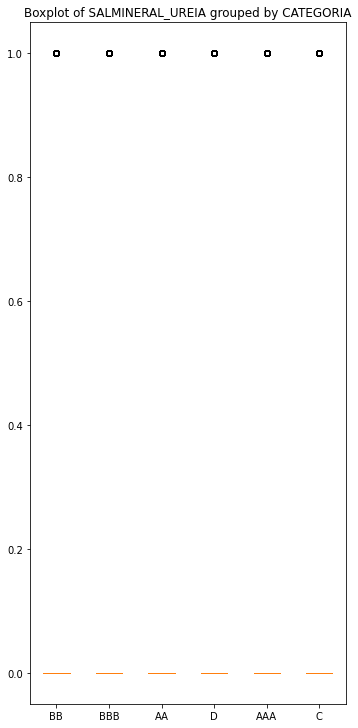

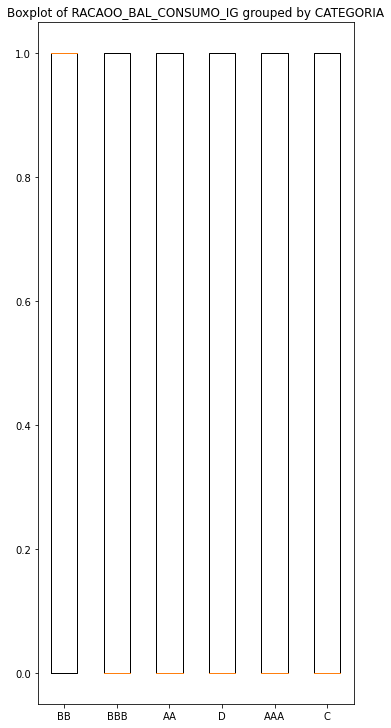

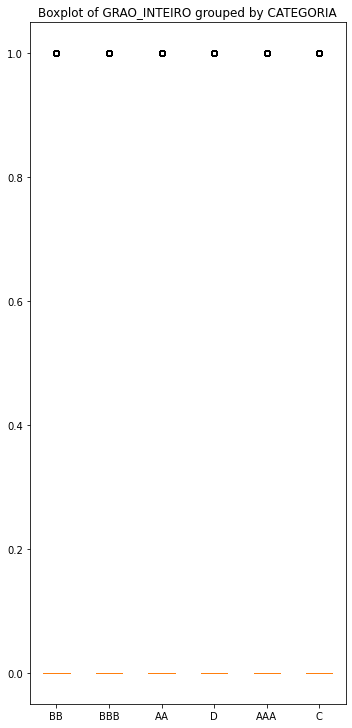

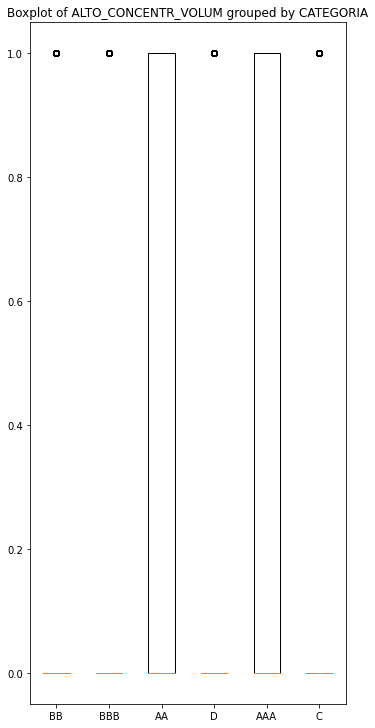

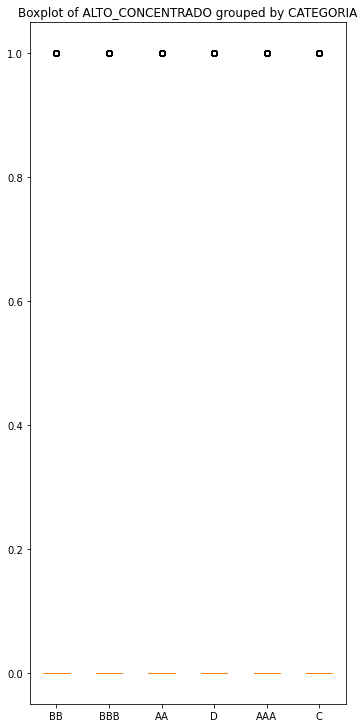

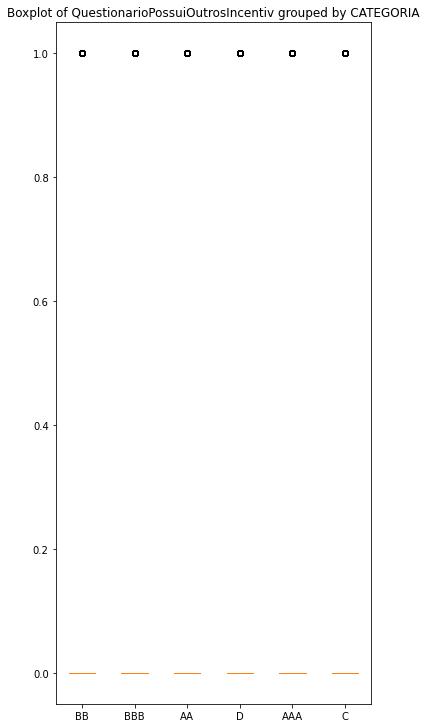

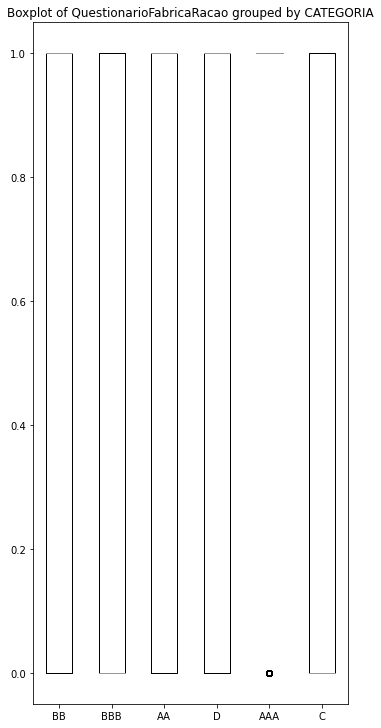

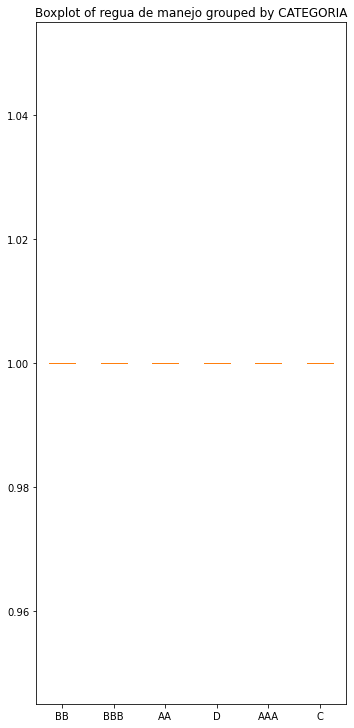

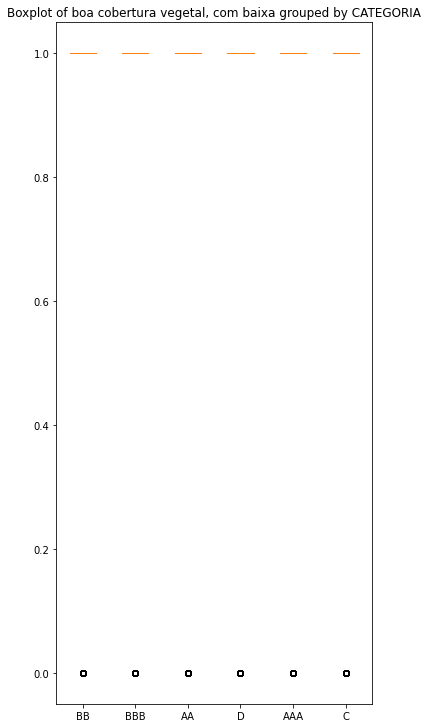

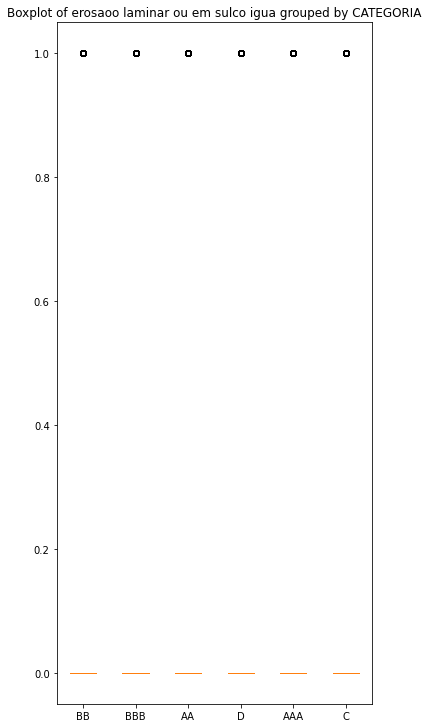

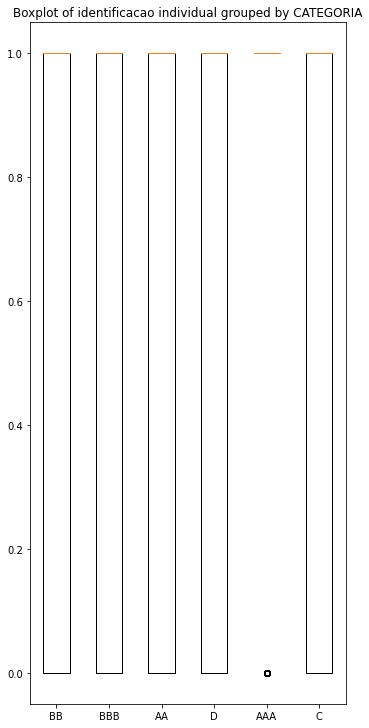

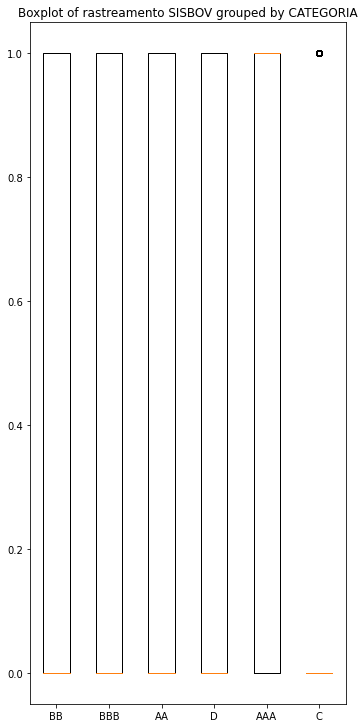

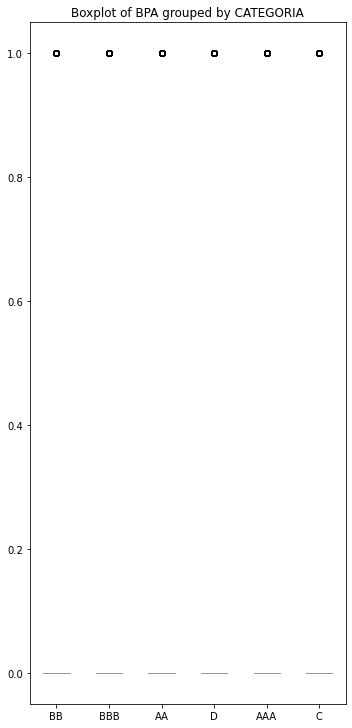

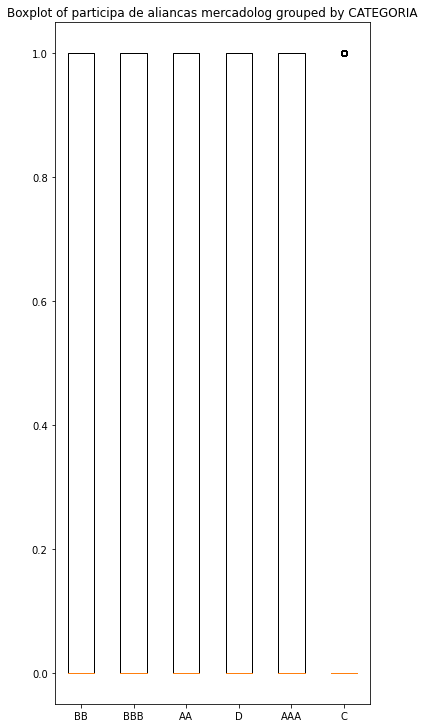

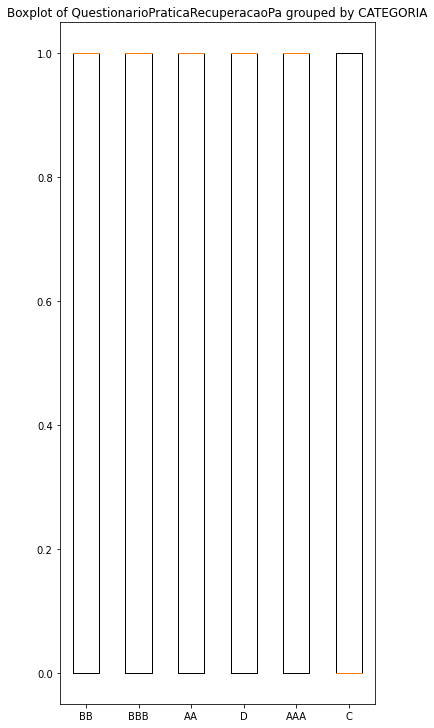

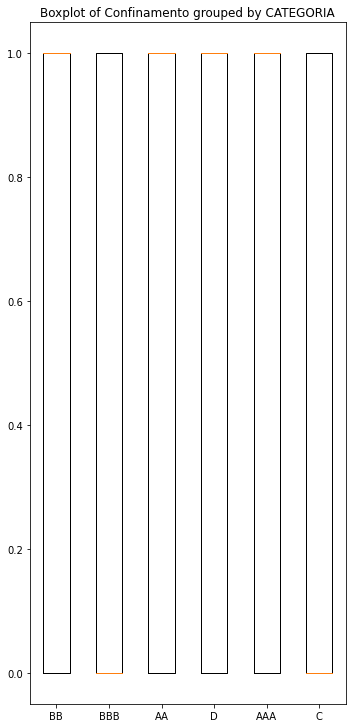

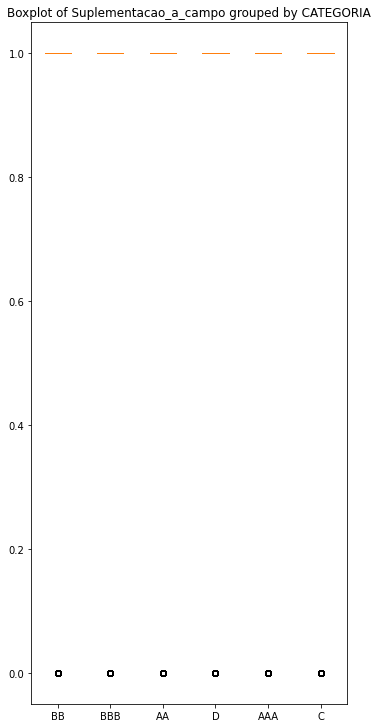

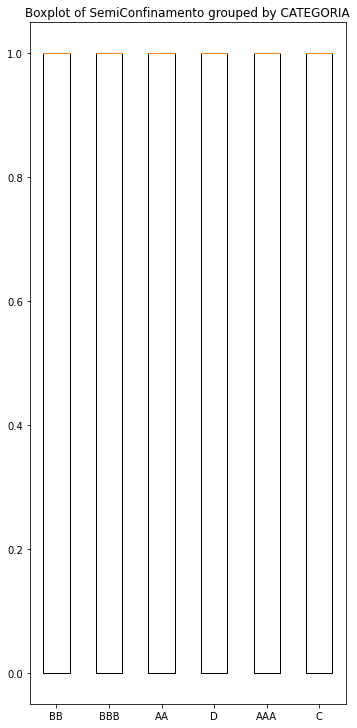

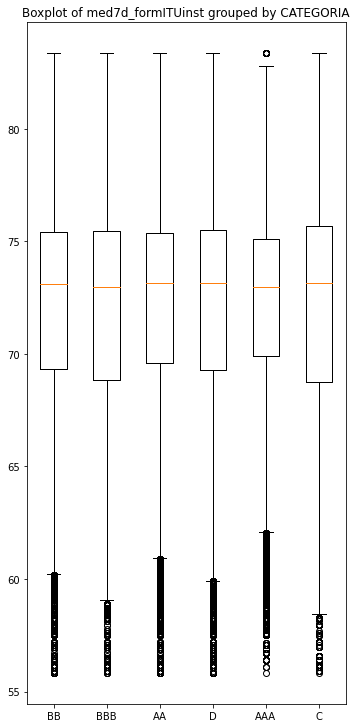

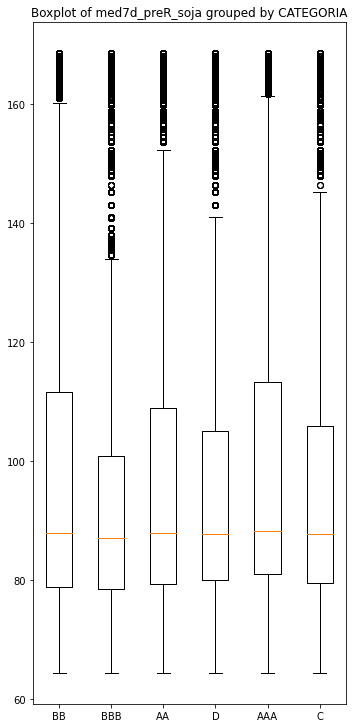

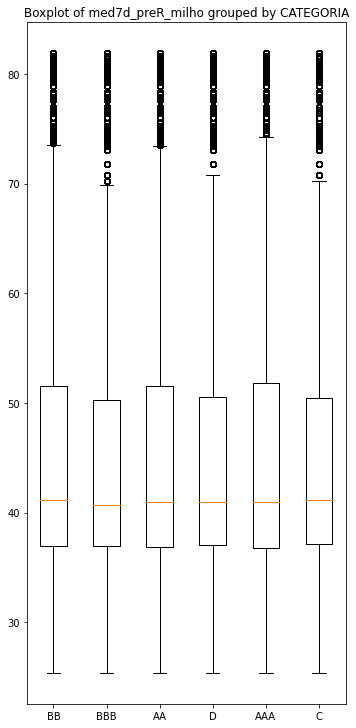

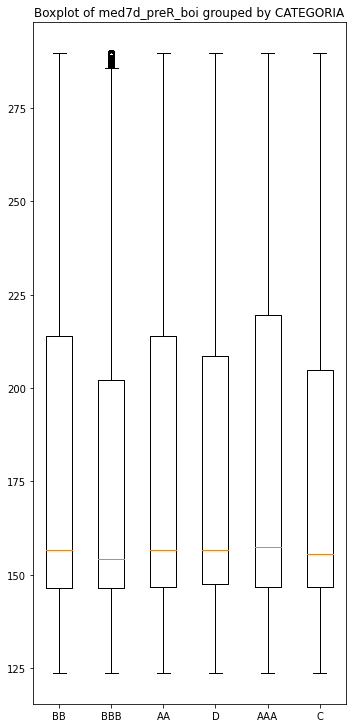

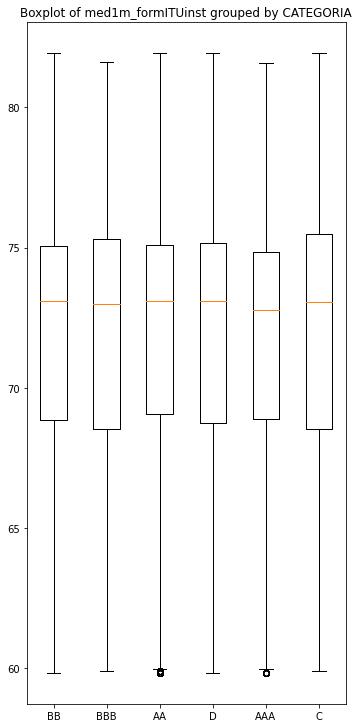

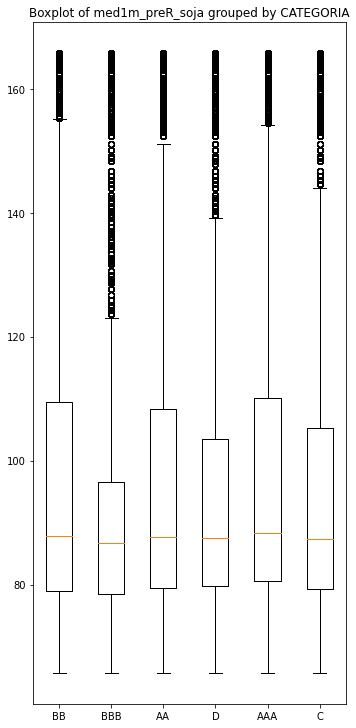

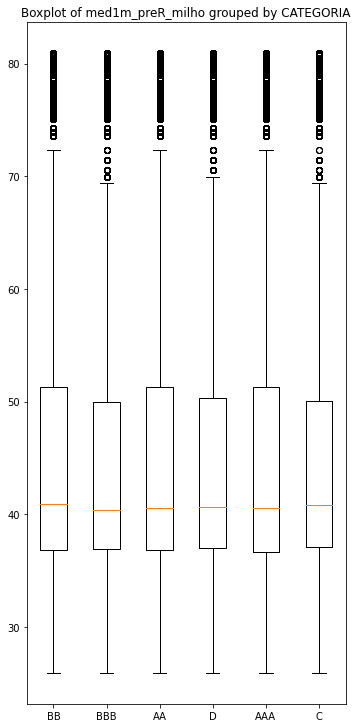

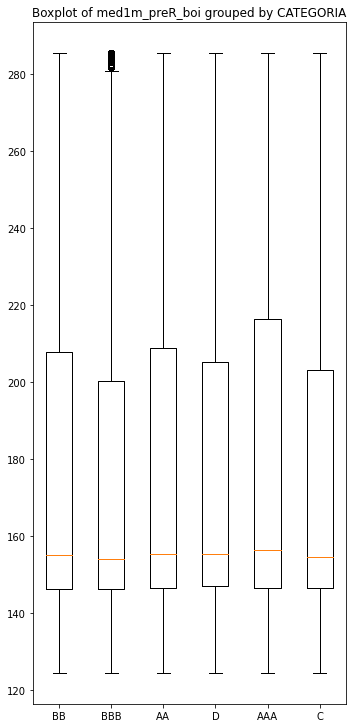

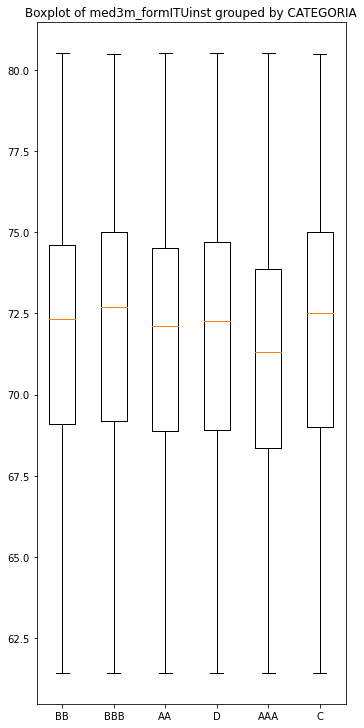

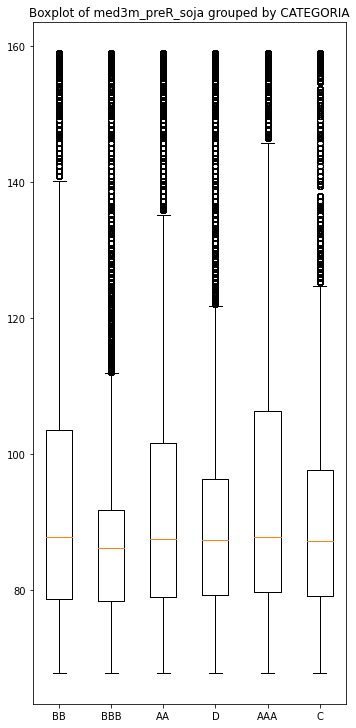

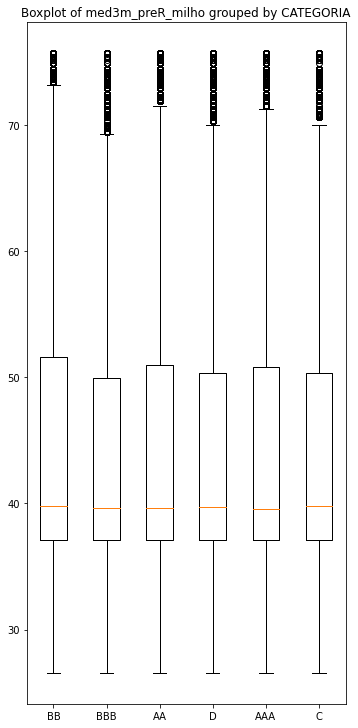

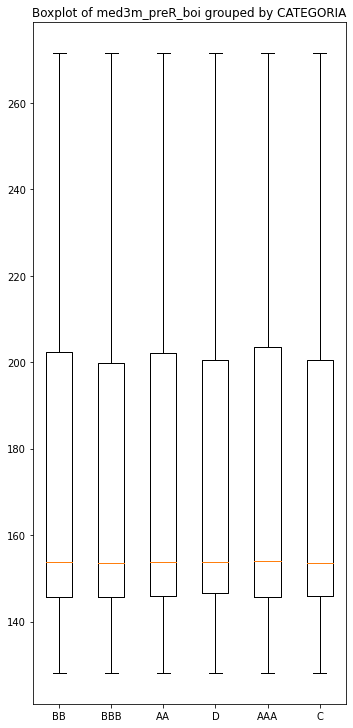

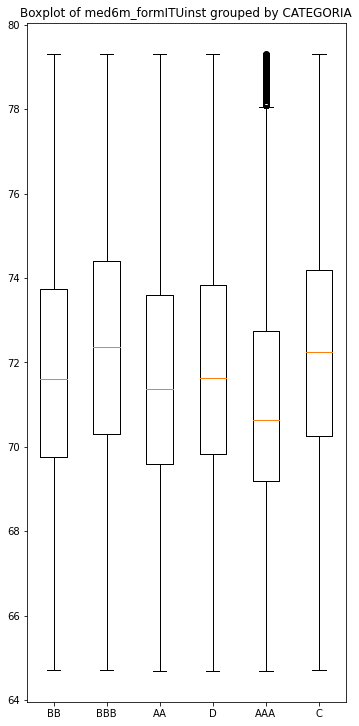

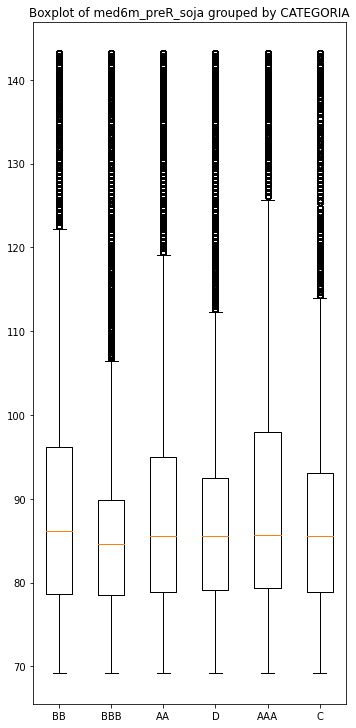

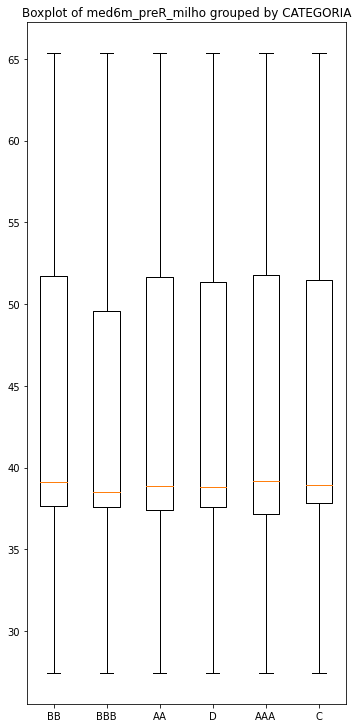

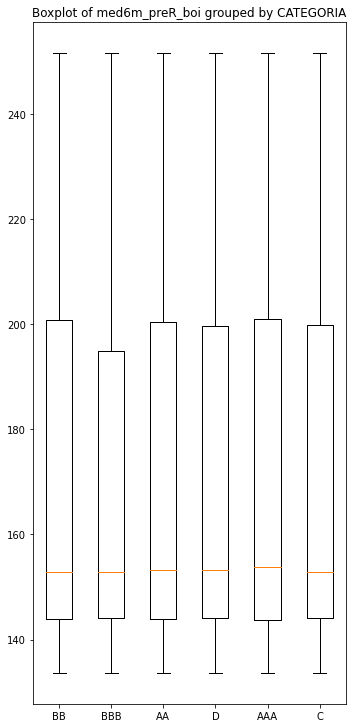

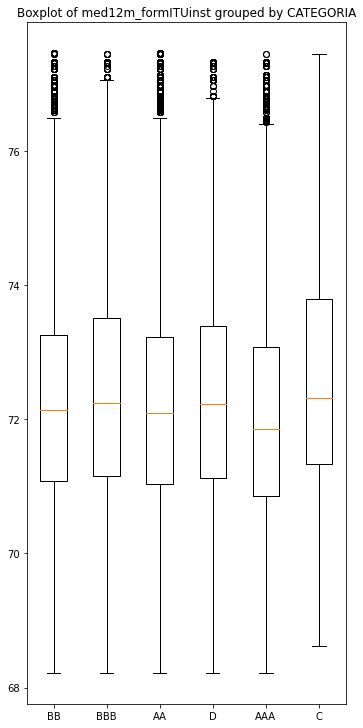

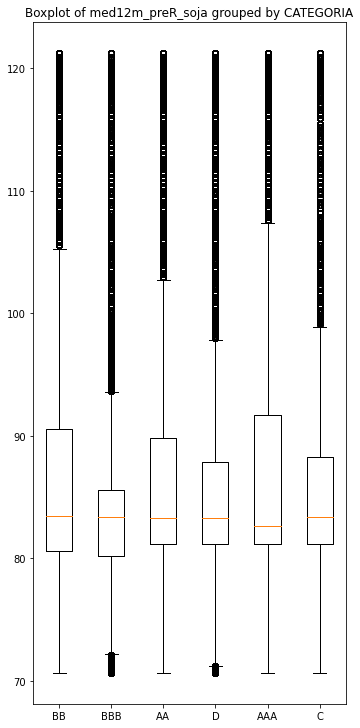

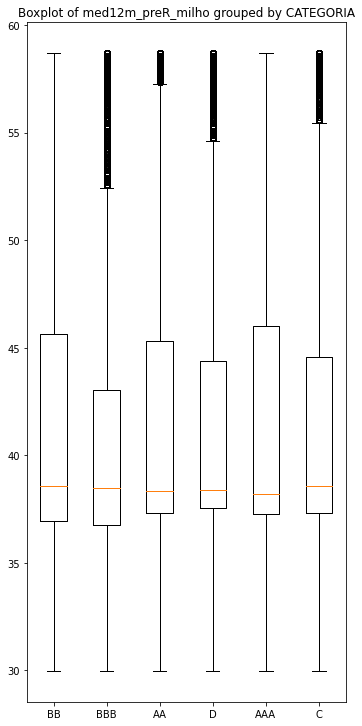

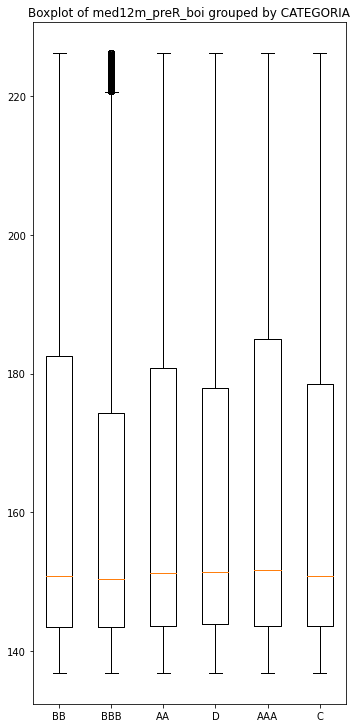

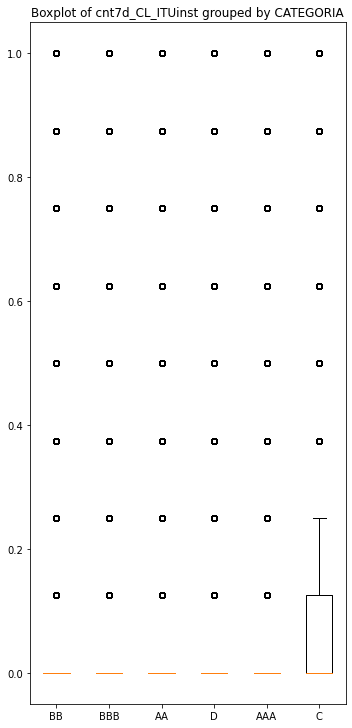

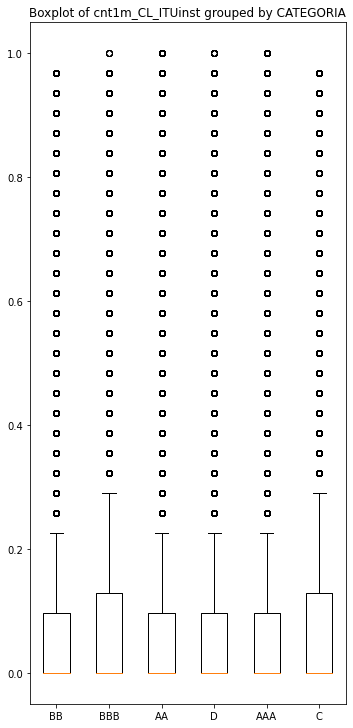

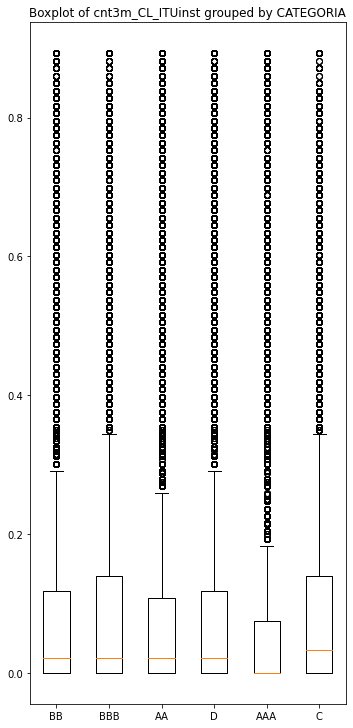

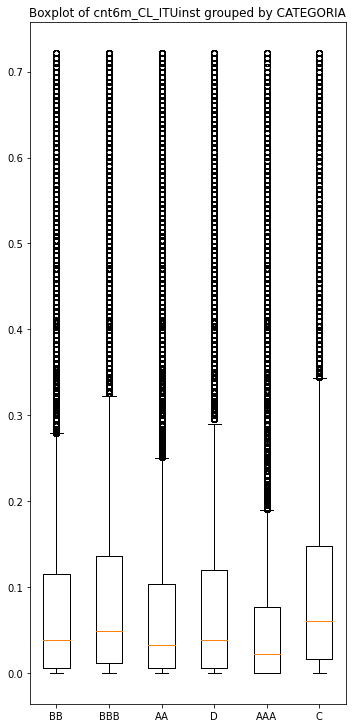

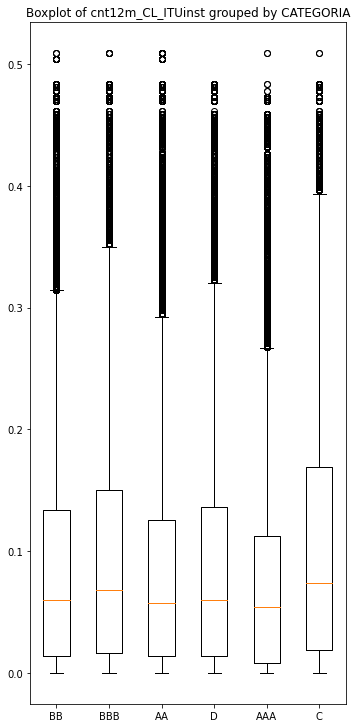

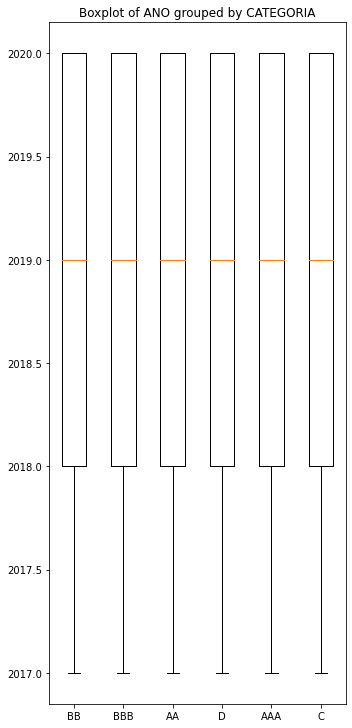



*****FIM IMPRIMIR BOXPLOT GROUPED BY TARGET******
Function boxplot_grouped_by_target Took 0:00:35.626751



In [ ]:
# Print boxplot for each attribute by target class
reports.boxplot_grouped_by_target(
    data_frame=precoce_ms_data_frame, target=settings.class_column)

## Print an attribute's outiliers

In [ ]:
# Print an attribute's outiliers
reports.detect_outiliers_from_attribute(
    data_frame=precoce_ms_data_frame, attribute_name='Peso')


*****INICIO DETECT OUTILIERS FROM ATTRIBUTE******
Outiliers for attribute "Peso":
Function detect_outliers Took 0:00:00.131840



8261      1566.000000
5332      1536.000000
5455      1291.199951
5980      1248.000000
5786      1140.000000
              ...    
2355368    110.000000
2236703    102.300003
3069078    102.000000
1156955     90.800003
1480110     90.000000
Name: Peso, Length: 56667, dtype: float32


*****FIM DETECT OUTILIERS FROM ATTRIBUTE******
Function detect_outiliers_from_attribute Took 0:00:00.419428



## Unique values

In [ ]:
# Print the unique values for each column
reports.unique_values_for_each_column(
    data_frame=precoce_ms_data_frame
)


*****INICIO IMPRIMIR UNIQUE VALUES FOR EACH COLUMN******


EstabelecimentoMunicipio              75
Tipificacao                            3
Maturidade                             5
Acabamento                             5
Peso                                3777
QuestionarioClassificacaoEstabel       4
FERTIIRRIGACAO                         2
ILP                                    2
IFP                                    2
ILPF                                   2
CONCEN_VOLUM                           2
CREEPFEEDING                           2
FORN_ESTRAT_SILAGEM                    2
PROTEICO                               2
PROTEICO_ENERGETICO                    2
RACAO_BAL_CONS_INFERIOR                2
SAL_MINERAL                            2
SALMINERAL_UREIA                       2
RACAOO_BAL_CONSUMO_IG                  2
GRAO_INTEIRO                           2
ALTO_CONCENTR_VOLUM                    2
ALTO_CONCENTRADO                       2
QuestionarioPossuiOutrosIncentiv       2
QuestionarioFabricaRacao               2
regua de manejo 

*****FIM IMPRIMIR UNIQUE VALUES FOR EACH COLUMN******
Function unique_values_for_each_column Took 0:00:01.227951



In [ ]:
precoce_ms_data_frame[settings.class_column].value_counts()

AA     890665
AAA    543117
D      411703
BB     407222
BBB    192811
C       97543
Name: CATEGORIA, dtype: int64

In [ ]:
for column in precoce_ms_data_frame.columns:
  try:
    print('Coluna: {} Variancia: {}'.format(column, precoce_ms_data_frame[column].var()))
  except:
    pass

Coluna: Peso Variancia: 2281.347412109375
Coluna: QuestionarioClassificacaoEstabel Variancia: 12.946052487378761
Coluna: FERTIIRRIGACAO Variancia: 0.10573559312948166
Coluna: ILP Variancia: 0.24880338434832885
Coluna: IFP Variancia: 0.047298579335953224
Coluna: ILPF Variancia: 0.044062929816520595
Coluna: CONCEN_VOLUM Variancia: 0.1612079400541439
Coluna: CREEPFEEDING Variancia: 0.07672995767413188
Coluna: FORN_ESTRAT_SILAGEM Variancia: 0.07372127177574284
Coluna: PROTEICO Variancia: 0.2471633409504197
Coluna: PROTEICO_ENERGETICO Variancia: 0.23749502498807268
Coluna: RACAO_BAL_CONS_INFERIOR Variancia: 0.1621871420678325
Coluna: SAL_MINERAL Variancia: 0.24575562148869354
Coluna: SALMINERAL_UREIA Variancia: 0.12863501294027577
Coluna: RACAOO_BAL_CONSUMO_IG Variancia: 0.24976344225656
Coluna: GRAO_INTEIRO Variancia: 0.06201280277637232
Coluna: ALTO_CONCENTR_VOLUM Variancia: 0.20185113694023707
Coluna: ALTO_CONCENTRADO Variancia: 0.011757463396811633
Coluna: QuestionarioPossuiOutrosIncent

## Percentage of unique values

In [ ]:
# Print the percentage of unique values for each column
reports.percentage_unique_values_for_each_column(
    data_frame=precoce_ms_data_frame, threshold=1
)


*****INICIO IMPRIMIR PERCENTAGE UNIQUE VALUES FOR EACH COLUMN******


Coluna  total_Unique  Porcentagem
0                   regua de manejo             1     0.000039
0  QuestionarioPraticaRecuperacaoPa             2     0.000079
0               ALTO_CONCENTR_VOLUM             2     0.000079
0                  ALTO_CONCENTRADO             2     0.000079
0  QuestionarioPossuiOutrosIncentiv             2     0.000079
0          QuestionarioFabricaRacao             2     0.000079
0  boa cobertura vegetal, com baixa             2     0.000079
0                      GRAO_INTEIRO             2     0.000079
0  erosaoo laminar ou em sulco igua             2     0.000079
0               rastreamento SISBOV             2     0.000079
0                               BPA             2     0.000079
0  participa de aliancas mercadolog             2     0.000079
0                      Confinamento             2     0.000079
0             Suplementacao_a_campo             2     0.000079
0                  SemiConfinamento             2     0.000079
0          identificacao individual             2     0.000079
0             RACAOO_BAL_CONSUMO_IG             2     0.000079
0                     classificacao             2     0.000079
0                       SAL_MINERAL             2     0.000079
0                    FERTIIRRIGACAO             2     0.000079
0                               IFP             2     0.000079
0                              ILPF             2     0.000079
0                      CONCEN_VOLUM             2     0.000079
0                               ILP             2     0.000079
0               FORN_ESTRAT_SILAGEM             2     0.000079
0                          PROTEICO             2     0.000079
0               PROTEICO_ENERGETICO             2     0.000079
0           RACAO_BAL_CONS_INFERIOR             2     0.000079
0                      CREEPFEEDING             2     0.000079
0                  SALMINERAL_UREIA             2     0.000079
0                       Tipificacao             3     0.000118
0  QuestionarioClassificacaoEstabel             4     0.000157
0                               ANO             4     0.000157
0                        Acabamento             5     0.000197
0                        Maturidade             5     0.000197
0                         CATEGORIA             6     0.000236
0                  cnt7d_CL_ITUinst             9     0.000354
0                  cnt1m_CL_ITUinst            32     0.001258
0          EstabelecimentoMunicipio            75     0.002949
0                  cnt3m_CL_ITUinst           113     0.004443
0                  cnt6m_CL_ITUinst           373     0.014667
0                  med12m_preR_soja           752     0.029571
0                 med12m_preR_milho           755     0.029689
0                  med6m_preR_milho           759     0.029846
0                med12m_formITUinst           814     0.032009
0                  med3m_preR_milho           834     0.032795
0                   med6m_preR_soja           892     0.035076
0                  med1m_preR_milho           904     0.035548
0                    med6m_preR_boi           916     0.036020
0                  med7d_preR_milho           916     0.036020
0                   med3m_preR_soja           927     0.036452
0                   med12m_preR_boi           952     0.037435
0                    med3m_preR_boi           968     0.038064
0                   med1m_preR_soja           970     0.038143
0                   med7d_preR_soja           978     0.038458
0                 cnt12m_CL_ITUinst           987     0.038811
0                    med7d_preR_boi          1008     0.039637
0                    med1m_preR_boi          1012     0.039795
0                 med6m_formITUinst          1380     0.054265
0                 med3m_formITUinst          1696     0.066691
0                 med1m_formITUinst          1864     0.073297
0                 med7d_formITUinst          2117     0.083246
0                              Peso          3777     0.1485

*****FIM IMPRIMIR PERCENTAGE UNIQUE VALUES FOR EACH COLUMN******
Function percentage_unique_values_for_each_column Took 0:00:14.556441



## Delete columns with single value

In [ ]:
# Identify columns that contain a single value, and delete them
precoce_ms_data_frame = pre_processing.delete_columns_with_single_value(
    data_frame=precoce_ms_data_frame
)



*****INICIO DELETE COLUMNS WITH SINGLE VALUE******
>>> Colunas removidas com valor único: ['regua de manejo']
*****FIM DELETE COLUMNS WITH SINGLE VALUE*********
Function delete_columns_with_single_value Took 0:00:01.683409



## Attributes that have a low variance


*****INICIO IMPRIMIR SIMULATE DELETE COLUMNS WITH LOW VARIANCE******
Shape do X antes: (2543061, 61).
X shape (Dados originais): (2543061, 61)
*****INICIO DELETE COLUNAS******
Coluna Peso excluída.
Coluna QuestionarioClassificacaoEstabel excluída.
Coluna FERTIIRRIGACAO excluída.
Coluna ILP excluída.
Coluna IFP excluída.
Coluna ILPF excluída.
Coluna CONCEN_VOLUM excluída.
Coluna CREEPFEEDING excluída.
Coluna FORN_ESTRAT_SILAGEM excluída.
Coluna PROTEICO excluída.
Coluna PROTEICO_ENERGETICO excluída.
Coluna RACAO_BAL_CONS_INFERIOR excluída.
Coluna SAL_MINERAL excluída.
Coluna SALMINERAL_UREIA excluída.
Coluna RACAOO_BAL_CONSUMO_IG excluída.
Coluna GRAO_INTEIRO excluída.
Coluna ALTO_CONCENTR_VOLUM excluída.
Coluna ALTO_CONCENTRADO excluída.
Coluna QuestionarioPossuiOutrosIncentiv excluída.
Coluna QuestionarioFabricaRacao excluída.
Coluna boa cobertura vegetal, com baixa excluída.
Coluna erosaoo laminar ou em sulco igua excluída.
Coluna identificacao individual excluída.
Coluna rastreamen

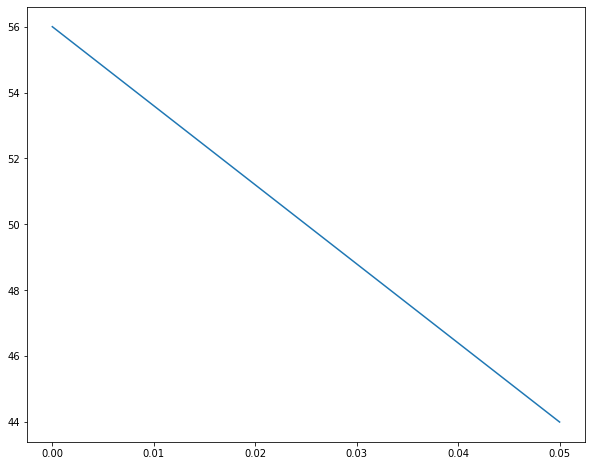


*****FIM IMPRIMIR SIMULATE DELETE COLUMNS WITH LOW VARIANCE******
Function simulate_delete_columns_with_low_variance Took 0:00:19.253970



In [ ]:
# Simulate delete columns with low variance, using VarianceThreshold from sklearn
reports.simulate_delete_columns_with_low_variance(
    data_frame=precoce_ms_data_frame,
    thresholds=np.arange(0.0, 0.10, 0.05),
    separate_numeric_columns=True,
    path_save_fig=settings.PATH_SAVE_PLOTS,
    display_figure=True
)


## Apply encoders and move target to last position in dataframe

In [8]:
# Apply ordinal encoder to the columns
precoce_ms_data_frame, settings.columns_ordinal_encoded = pre_processing.ordinal_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_ordinal_encoded=settings.columns_ordinal_encoded,
    columns_names=settings.ordinal_encoder_columns_names
)



*****INICIO ORDINAL ENCODER******
*****FIM ORDINAL ENCODER*********
Function ordinal_encoder_columns Took 0:00:02.466469



In [9]:
# Apply label encoder to the columns
precoce_ms_data_frame, settings.columns_label_encoded = pre_processing.label_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_label_encoded=settings.columns_label_encoded,
    columns_names=settings.label_encoder_columns_names
)



*****INICIO LABEL ENCODER******
*****FIM LABEL ENCODER*********
Function label_encoder_columns Took 0:00:01.386016



In [10]:
# Apply one hot encoder to the columns
precoce_ms_data_frame, settings.columns_one_hot_encoded = pre_processing.one_hot_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_one_hot_encoded=settings.columns_one_hot_encoded,
    columns_names=settings.one_hot_encoder_columns_names
)



*****INICIO ONE-HOT ENCODER******


tcmalloc: large alloc 1525841920 bytes == 0x55c4b8c40000 @  0x7f9bdfdde001 0x7f9bdb078fae 0x7f9bdb07988e 0x7f9bdb0d7d17 0x7f9bdb0d986a 0x7f9bdb177b9b 0x55c47227c753 0x55c472252cc7 0x55c4722b0376 0x55c472253149 0x55c4722a5066 0x55c4722b04c6 0x55c472253149 0x55c4722a5768 0x55c472253254 0x55c4722a49c9 0x55c4722b04c6 0x55c472253149 0x55c4722a5132 0x55c4722a585f 0x55c472253254 0x55c4722a5066 0x55c4722a585f 0x55c472279ede 0x55c4722d8120 0x55c4722a5132 0x55c4722a585f 0x55c472252cc7 0x55c4722a49c9 0x55c4722eee8f 0x55c47227c61d


*****INICIO DELETE COLUNAS******
Coluna EstabelecimentoMunicipio excluída.
*****FIM DELETE COLUNAS*********
*****INICIO DELETE COLUNAS******
Coluna Tipificacao excluída.
*****FIM DELETE COLUNAS*********
*****INICIO DELETE COLUNAS******
Coluna ANO excluída.
*****FIM DELETE COLUNAS*********
*****FIM ONE-HOT ENCODER*********
Function one_hot_encoder_columns Took 0:00:11.160859



In [11]:
# Apply min max scaler to the columns
precoce_ms_data_frame, settings.columns_min_max_scaled = pre_processing.min_max_scaler_columns(
    data_frame=precoce_ms_data_frame, columns_min_max_scaled=settings.columns_min_max_scaled,
    columns_names=settings.min_max_scaler_columns_names
)



*****INICIO MIN-MAX SCALER******
!!!>>> Coluna med1m_preR_soja não encontrada no DataFrame para min-max scaler.
!!!>>> Coluna med1m_preR_milho não encontrada no DataFrame para min-max scaler.
!!!>>> Coluna med1m_preR_boi não encontrada no DataFrame para min-max scaler.
!!!>>> Coluna med3m_preR_boi não encontrada no DataFrame para min-max scaler.
!!!>>> Coluna med6m_preR_soja não encontrada no DataFrame para min-max scaler.
!!!>>> Coluna med6m_preR_boi não encontrada no DataFrame para min-max scaler.
!!!>>> Coluna med12m_preR_milho não encontrada no DataFrame para min-max scaler.
!!!>>> Coluna med12m_preR_boi não encontrada no DataFrame para min-max scaler.
*****FIM MIN-MAX SCALER*********
Function min_max_scaler_columns Took 0:00:00.671637



In [12]:
# Move the target column to the last position in dataframe
precoce_ms_data_frame = utils.move_cloumns_last_positions(
    data_frame=precoce_ms_data_frame, columns_names=[settings.class_column])

## Target attribute distribution

In [ ]:
# Target attribute distribution
reports.class_distribution(
    y=precoce_ms_data_frame[settings.class_column].values)


*****INICIO RELATÓRIO DISTRIBUIÇÃO DE CLASSES******
Distribuição da classe 0: 35%
Distribuição da classe 1: 21%
Distribuição da classe 2: 16%
Distribuição da classe 3: 8%
Distribuição da classe 4: 4%
Distribuição da classe 5: 16%
*****FIM RELATÓRIO DISTRIBUIÇÃO DE CLASSES******
Function class_distribution Took 0:00:00.076701



## Correlation matrix

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

*Spearman's Correlation, Further, the two variables being considered may have a non-Gaussian distribution.*

### Pearson method

In [ ]:
# Correlation matrix using pearson method, between all attributes
reports.correlation_matrix(
    data_frame=precoce_ms_data_frame, method='pearson',
    display_matrix=True, export_matrix=True, path_save_matrix=settings.PATH_SAVE_PLOTS,
    print_corr_matrix_summarized=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Correlation matrix using pearson method, between all attributes and the class attribute
reports.correlation_matrix(
    data_frame=precoce_ms_data_frame, method='pearson', attribute=settings.class_column,
    display_matrix=True, export_matrix=True, path_save_matrix=settings.PATH_SAVE_PLOTS)


*****INICIO CORRELATION MATRIX******


[0104/235114.585817:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[0104/235114.588465:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[0104/235114.598200:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0104/235114.686924:WARNING:sandbox_linux.cc(380)] InitializeSandbox() called with multiple threads in process gpu-process.
[0104/235114.950237:INFO:headless_shell.cc(623)] Written to file /tmp/tmp3pufmu9p/temp.png.
[0104/235115.380556:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[0104/235115.382668:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[0104/235115.389049:WARNING:bluez_dbus_manag

Figure correlation_matrix-pearson-CATEGORIA-04-01-2023_23:51:14.png saved in ./plots/ directory.
*****FIM CORRELATION MATRIX*********
Function correlation_matrix Took 0:02:43.896828



### Spearman method

In [ ]:
# Correlation matrix using spearman method, between all attributes
reports.correlation_matrix(
    data_frame=precoce_ms_data_frame, method='spearman',
    display_matrix=True, export_matrix=True, path_save_matrix=settings.PATH_SAVE_PLOTS,
    print_corr_matrix_summarized=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Correlation matrix using spearman method, between all attributes and the class attribute
reports.correlation_matrix(
    data_frame=precoce_ms_data_frame, method='spearman', attribute=settings.class_column,
    display_matrix=True, export_matrix=True, path_save_matrix=settings.PATH_SAVE_PLOTS)


*****INICIO CORRELATION MATRIX******


[0105/002429.663839:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[0105/002429.664368:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[0105/002429.915460:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0105/002430.198935:WARNING:sandbox_linux.cc(380)] InitializeSandbox() called with multiple threads in process gpu-process.
[0105/002431.082481:INFO:headless_shell.cc(623)] Written to file /tmp/tmpwl1hwg4y/temp.png.
[0105/002431.662287:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[0105/002431.662596:ERROR:bus.cc(399)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[0105/002431.667814:WARNING:bluez_dbus_manag

Figure correlation_matrix-spearman-CATEGORIA-05-01-2023_00:24:27.png saved in ./plots/ directory.
*****FIM CORRELATION MATRIX*********
Function correlation_matrix Took 0:15:09.301982



### Delete features by correlation

In [ ]:
# Delete features by correlation
precoce_ms_data_frame = pre_processing.drop_feature_by_correlation(
    data_frame=precoce_ms_data_frame,
    method='spearman',
    columns_names=settings.columns_names_drop_feature_by_correlation)


*****INICIO DROP FEATURE BY CORRELATION******
>>> Correlação, para o limite de 0.95, entre o atributo med7d_preR_soja e o(s) atributo(s) ['med1m_preR_soja'] foi encontrada.
>>>>Removendo o(s) atributo(s) do dataframe.
!!!>>> Coluna med1m_preR_soja não encontrada no DataFrame para drop feature by correlation.
>>> Correlação, para o limite de 0.95, entre o atributo med3m_preR_soja e o(s) atributo(s) ['med6m_preR_soja'] foi encontrada.
>>>>Removendo o(s) atributo(s) do dataframe.
!!!>>> Coluna med6m_preR_soja não encontrada no DataFrame para drop feature by correlation.
>>> Correlação, para o limite de 0.95, entre o atributo med12m_preR_soja e o(s) atributo(s) ['med12m_preR_milho'] foi encontrada.
>>>>Removendo o(s) atributo(s) do dataframe.
>>> Correlação, para o limite de 0.95, entre o atributo med7d_preR_milho e o(s) atributo(s) ['med1m_preR_milho'] foi encontrada.
>>>>Removendo o(s) atributo(s) do dataframe.
>>> Correlação, para o limite de 0.95, entre o atributo med7d_preR_boi e o(s

#### Save result dataframe after delete features by correlation

In [ ]:
# Apply inverse ordinal encoder to the columns
precoce_ms_data_frame, settings.columns_ordinal_encoded = pre_processing.inverse_ordinal_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_ordinal_encoded=settings.columns_ordinal_encoded)

# Apply inverse label encoder to the columns
precoce_ms_data_frame, settings.columns_label_encoded = pre_processing.inverse_label_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_label_encoded=settings.columns_label_encoded)

# Apply inverse one hot encoder to the columns
precoce_ms_data_frame, settings.columns_one_hot_encoded = pre_processing.inverse_one_hot_encoder_columns(
    data_frame=precoce_ms_data_frame, columns_one_hot_encoded=settings.columns_one_hot_encoded)

# Apply inverse min max scaler to the columns
precoce_ms_data_frame, settings.columns_min_max_scaled = pre_processing.inverse_min_max_scaler_columns(
    data_frame=precoce_ms_data_frame, columns_min_max_scaled=settings.columns_min_max_scaled)

# Move the target column to the last position in dataframe
precoce_ms_data_frame = utils.move_cloumns_last_positions(
    data_frame=precoce_ms_data_frame, columns_names=[settings.class_column])

# Save dataframe to csv file
csv_treatments.generate_new_csv(
    data_frame=precoce_ms_data_frame,
    csv_path='/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/base_dados/TAB_MODELAGEM_RAFAEL_2020_1-after_drop_feature_by_correlation-{}.csv'.format(
        utils.get_current_datetime()
    )
)

## Calcule feature importance with linear models


*****INICIO IMPRIMIR FEATURE IMPORTANCE USING COEFFICIENTS OF LINEAR MODELS******


Model: LogisticRegression(class_weight='balanced', n_jobs=-1)

Feature importance using coefficients of linear models:


Feature  Importance
49                                       classificacao   12.312703
127                          Tipificacao_Macho Inteiro    4.177706
1                                           Acabamento    4.069873
2                                                 Peso    1.560350
45                                    cnt1m_CL_ITUinst    0.739607
131                                           ANO_2020    0.696476
128                                           ANO_2017    0.686429
87                  EstabelecimentoMunicipio_ITAQUIRAI    0.604158
94              EstabelecimentoMunicipio_LAGUNA CARAPA    0.596131
98                    EstabelecimentoMunicipio_NAVIRAI    0.595592
27                    participa de aliancas mercadolog    0.590164
130                                           ANO_2019    0.506686
33                                     med7d_preR_soja    0.480227
59               EstabelecimentoMunicipio_ARAL MOREIRA    0.449356
105                  EstabelecimentoMunicipio_PARANHOS    0.426245
52                    EstabelecimentoMunicipio_AMAMBAI    0.405906
6                                                  IFP    0.387923
46                                    cnt3m_CL_ITUinst    0.349836
51                EstabelecimentoMunicipio_ALCINOPOLIS    0.314312
84                   EstabelecimentoMunicipio_IGUATEMI    0.300485
55                   EstabelecimentoMunicipio_ANGELICA    0.298844
108            EstabelecimentoMunicipio_PORTO MURTINHO    0.297081
26                                                 BPA    0.284159
117               EstabelecimentoMunicipio_SETE QUEDAS    0.252822
56               EstabelecimentoMunicipio_ANTONIO JOAO    0.252799
129                                           ANO_2018    0.250709
63                 EstabelecimentoMunicipio_BELA VISTA    0.245298
92                      EstabelecimentoMunicipio_JATEI    0.244049
119                    EstabelecimentoMunicipio_SONORA    0.234723
78                 EstabelecimentoMunicipio_DEODAPOLIS    0.224475
107                EstabelecimentoMunicipio_PONTA PORA    0.219462
74           EstabelecimentoMunicipio_CORONEL SAPUCAIA    0.213781
101            EstabelecimentoMunicipio_NOVA ANDRADINA    0.199332
102     EstabelecimentoMunicipio_NOVO HORIZONTE DO SUL    0.193808
67                    EstabelecimentoMunicipio_CAARAPO    0.186265
77                      EstabelecimentoMunicipio_COXIM    0.178948
54               EstabelecimentoMunicipio_ANAURILANDIA    0.167918
81                   EstabelecimentoMunicipio_ELDORADO    0.166161
34                                    med7d_preR_milho    0.165974
16                               RACAOO_BAL_CONSUMO_IG    0.165371
10                                 FORN_ESTRAT_SILAGEM    0.155351
95                   EstabelecimentoMunicipio_MARACAJU    0.153014
25                                 rastreamento SISBOV    0.147927
90                  EstabelecimentoMunicipio_JARAGUARI    0.144748
71                EstabelecimentoMunicipio_CASSILANDIA    0.142225
76                 EstabelecimentoMunicipio_COSTA RICA    0.132003
121                EstabelecimentoMunicipio_TAQUARUSSU    0.131564
120                    EstabelecimentoMunicipio_TACURU    0.130367
122                   EstabelecimentoMunicipio_TERENOS    0.120673
62                  EstabelecimentoMunicipio_BATAYPORA    0.111199
100      EstabelecimentoMunicipio_NOVA ALVORADA DO SUL    0.095114
83       EstabelecimentoMunicipio_GUIA LOPES DA LAGUNA    0.085543
116                  EstabelecimentoMunicipio_SELVIRIA    0.077159
88                   EstabelecimentoMunicipio_IVINHEMA    0.069696
13                             RACAO_BAL_CONS_INFERIOR    0.069553
57       EstabelecimentoMunicipio_APARECIDA DO TABOADO    0.066165
110             EstabelecimentoMunicipio_RIO BRILHANTE    0.058603
14                                         SAL_MINERAL    0.058591
47                                    cnt6m_CL_ITUinst    0.054813
79      EstabelecimentoMuni

Figure bar-feature_importance_using_coefficients_of_linear_models-LogisticRegression-05-01-2023_03:16:27.png saved in ./plots/ directory.


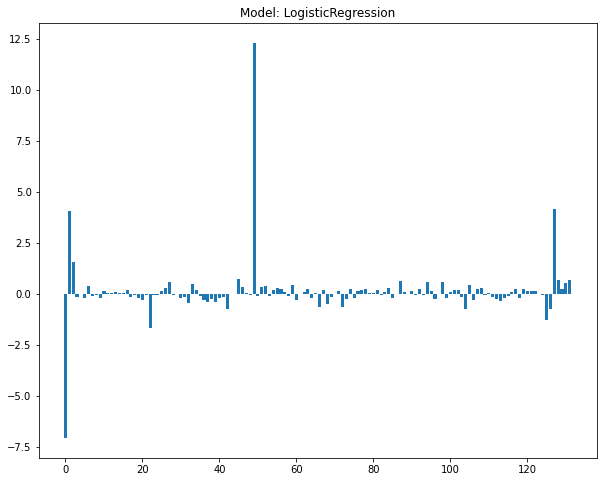

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(




Model: LinearSVC(class_weight='balanced')

Feature importance using coefficients of linear models:


Feature  Importance
49                                       classificacao    0.594721
43                                    med12m_preR_soja    0.325841
33                                     med7d_preR_soja    0.216891
78                 EstabelecimentoMunicipio_DEODAPOLIS    0.211336
105                  EstabelecimentoMunicipio_PARANHOS    0.192809
102     EstabelecimentoMunicipio_NOVO HORIZONTE DO SUL    0.171934
86                    EstabelecimentoMunicipio_ITAPORA    0.162816
40                                   med6m_formITUinst    0.152076
94              EstabelecimentoMunicipio_LAGUNA CARAPA    0.130028
39                                    med3m_preR_milho    0.129032
1                                           Acabamento    0.095996
59               EstabelecimentoMunicipio_ARAL MOREIRA    0.095550
42                                  med12m_formITUinst    0.093854
37                                   med3m_formITUinst    0.089398
66                EstabelecimentoMunicipio_BRASILANDIA    0.078301
67                    EstabelecimentoMunicipio_CAARAPO    0.076067
99                    EstabelecimentoMunicipio_NIOAQUE    0.074631
45                                    cnt1m_CL_ITUinst    0.068450
32                                   med7d_formITUinst    0.063857
100      EstabelecimentoMunicipio_NOVA ALVORADA DO SUL    0.063572
52                    EstabelecimentoMunicipio_AMAMBAI    0.062573
71                EstabelecimentoMunicipio_CASSILANDIA    0.058531
98                    EstabelecimentoMunicipio_NAVIRAI    0.058350
92                      EstabelecimentoMunicipio_JATEI    0.054883
81                   EstabelecimentoMunicipio_ELDORADO    0.054053
4                                       FERTIIRRIGACAO    0.043157
123               EstabelecimentoMunicipio_TRES LAGOAS    0.040177
110             EstabelecimentoMunicipio_RIO BRILHANTE    0.034762
116                  EstabelecimentoMunicipio_SELVIRIA    0.029004
6                                                  IFP    0.026735
24                            identificacao individual    0.026665
82                  EstabelecimentoMunicipio_FIGUEIRAO    0.023436
122                   EstabelecimentoMunicipio_TERENOS    0.022977
68                    EstabelecimentoMunicipio_CAMAPUA    0.020327
50                 EstabelecimentoMunicipio_AGUA CLARA    0.019256
111                 EstabelecimentoMunicipio_RIO NEGRO    0.018912
91                     EstabelecimentoMunicipio_JARDIM    0.018355
95                   EstabelecimentoMunicipio_MARACAJU    0.018164
55                   EstabelecimentoMunicipio_ANGELICA    0.017200
27                    participa de aliancas mercadolog    0.013757
84                   EstabelecimentoMunicipio_IGUATEMI    0.013740
5                                                  ILP    0.013137
21                            QuestionarioFabricaRacao    0.012980
47                                    cnt6m_CL_ITUinst    0.011657
30                               Suplementacao_a_campo    0.011063
31                                    SemiConfinamento    0.009267
108            EstabelecimentoMunicipio_PORTO MURTINHO    0.007597
29                                        Confinamento    0.005017
12                                 PROTEICO_ENERGETICO    0.004704
8                                         CONCEN_VOLUM    0.003815
9                                         CREEPFEEDING    0.003042
15                                    SALMINERAL_UREIA    0.001010
56               EstabelecimentoMunicipio_ANTONIO JOAO   -0.000266
17                                        GRAO_INTEIRO   -0.000777
13                             RACAO_BAL_CONS_INFERIOR   -0.001045
26                                                 BPA   -0.001584
10                                 FORN_ESTRAT_SILAGEM   -0.001835
35                                      med7d_preR_boi   -0.001982
115      EstabelecimentoMunicipio_SAO GABRIEL DO OESTE   -0.003560
113                   Estab

Figure bar-feature_importance_using_coefficients_of_linear_models-LinearSVC-05-01-2023_04:43:46.png saved in ./plots/ directory.


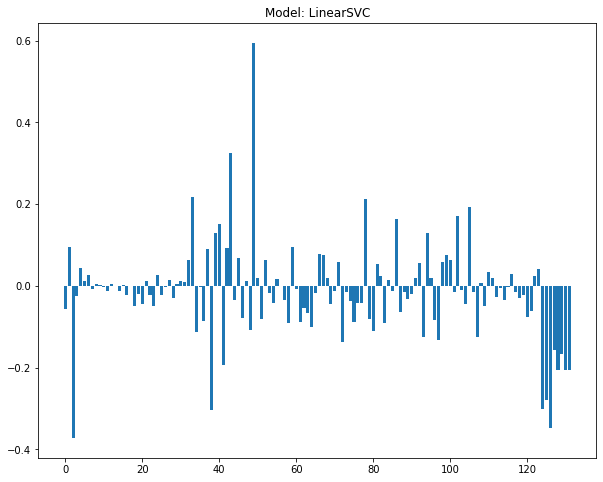



Model: SGDClassifier(class_weight='balanced', n_jobs=-1)

Feature importance using coefficients of linear models:


Feature  Importance
127                          Tipificacao_Macho Inteiro    0.183983
125                                  Tipificacao_Fêmea    0.178322
126                         Tipificacao_Macho Castrado    0.177604
130                                           ANO_2019    0.137082
129                                           ANO_2018    0.135952
128                                           ANO_2017    0.133949
131                                           ANO_2020    0.132926
49                                       classificacao    0.026582
102     EstabelecimentoMunicipio_NOVO HORIZONTE DO SUL    0.012829
78                 EstabelecimentoMunicipio_DEODAPOLIS    0.012236
95                   EstabelecimentoMunicipio_MARACAJU    0.012164
86                    EstabelecimentoMunicipio_ITAPORA    0.012100
94              EstabelecimentoMunicipio_LAGUNA CARAPA    0.012073
105                  EstabelecimentoMunicipio_PARANHOS    0.011522
98                    EstabelecimentoMunicipio_NAVIRAI    0.010309
52                    EstabelecimentoMunicipio_AMAMBAI    0.010263
123               EstabelecimentoMunicipio_TRES LAGOAS    0.010221
68                    EstabelecimentoMunicipio_CAMAPUA    0.009973
59               EstabelecimentoMunicipio_ARAL MOREIRA    0.009946
71                EstabelecimentoMunicipio_CASSILANDIA    0.009894
110             EstabelecimentoMunicipio_RIO BRILHANTE    0.009841
84                   EstabelecimentoMunicipio_IGUATEMI    0.009594
115      EstabelecimentoMunicipio_SAO GABRIEL DO OESTE    0.009461
122                   EstabelecimentoMunicipio_TERENOS    0.009022
113                   EstabelecimentoMunicipio_ROCHEDO    0.008714
116                  EstabelecimentoMunicipio_SELVIRIA    0.008547
111                 EstabelecimentoMunicipio_RIO NEGRO    0.008525
70                    EstabelecimentoMunicipio_CARACOL    0.008488
90                  EstabelecimentoMunicipio_JARAGUARI    0.008470
96                    EstabelecimentoMunicipio_MIRANDA    0.008444
100      EstabelecimentoMunicipio_NOVA ALVORADA DO SUL    0.008347
55                   EstabelecimentoMunicipio_ANGELICA    0.008295
66                EstabelecimentoMunicipio_BRASILANDIA    0.008278
119                    EstabelecimentoMunicipio_SONORA    0.008196
75                    EstabelecimentoMunicipio_CORUMBA    0.008084
99                    EstabelecimentoMunicipio_NIOAQUE    0.007802
101            EstabelecimentoMunicipio_NOVA ANDRADINA    0.007643
74           EstabelecimentoMunicipio_CORONEL SAPUCAIA    0.007407
77                      EstabelecimentoMunicipio_COXIM    0.007323
73                  EstabelecimentoMunicipio_CORGUINHO    0.007296
92                      EstabelecimentoMunicipio_JATEI    0.007175
50                 EstabelecimentoMunicipio_AGUA CLARA    0.007165
91                     EstabelecimentoMunicipio_JARDIM    0.007111
120                    EstabelecimentoMunicipio_TACURU    0.007063
62                  EstabelecimentoMunicipio_BATAYPORA    0.007015
82                  EstabelecimentoMunicipio_FIGUEIRAO    0.006878
88                   EstabelecimentoMunicipio_IVINHEMA    0.006850
67                    EstabelecimentoMunicipio_CAARAPO    0.006794
81                   EstabelecimentoMunicipio_ELDORADO    0.006736
61                 EstabelecimentoMunicipio_BATAGUASSU    0.006646
63                 EstabelecimentoMunicipio_BELA VISTA    0.006620
64                  EstabelecimentoMunicipio_BODOQUENA    0.006425
53                  EstabelecimentoMunicipio_ANASTACIO    0.006415
43                                    med12m_preR_soja    0.006404
87                  EstabelecimentoMunicipio_ITAQUIRAI    0.006372
58                 EstabelecimentoMunicipio_AQUIDAUANA    0.006309
103         EstabelecimentoMunicipio_PARAISO DAS AGUAS    0.006306
121                EstabelecimentoMunicipio_TAQUARUSSU    0.006150
114       EstabelecimentoMunicipio_SANTA RITA DO PARDO    0.006126
93                       Es

Figure bar-feature_importance_using_coefficients_of_linear_models-SGDClassifier-05-01-2023_04:45:31.png saved in ./plots/ directory.


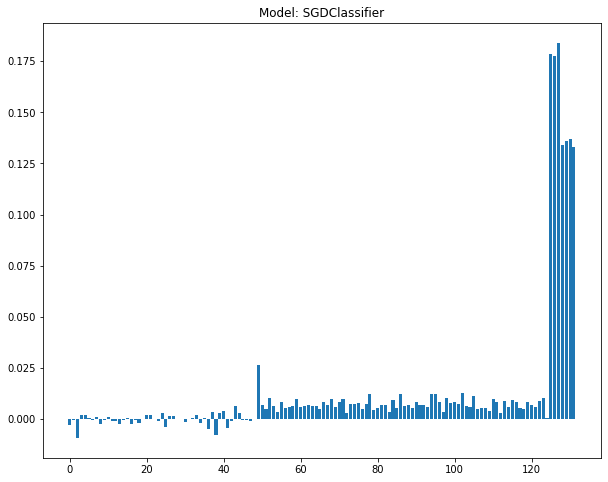

*****FIM IMPRIMIR FEATURE IMPORTANCE USING COEFFICIENTS OF LINEAR MODELS******
Function feature_importance_using_coefficients_of_linear_models Took 1:33:38.698149



In [ ]:
# Calculate feature importance with linear models
reports.feature_importance_using_coefficients_of_linear_models(
    data_frame=precoce_ms_data_frame,
    models=['logistic_regression', 'linear_svc', 'sgd_classifier'],
    path_save_fig=settings.PATH_SAVE_PLOTS,
    display_figure=True,
    class_weight='balanced',
    n_jobs=settings.n_jobs
)


## Calcule feature importance with tree based models


*****INICIO IMPRIMIR FEATURE IMPORTANCE USING TREE BASED MODELS******


tcmalloc: large alloc 1342742528 bytes == 0x55c4befae000 @  0x7f9bdfddc1e7 0x7f9bdb079064 0x7f9bdb0797ff 0x7f9bdb0d7f55 0x7f9bdb0d992b 0x7f9bdb1779eb 0x55c47227c753 0x55c472252cc7 0x55c4722a5066 0x55c4722b04c6 0x55c472252cc7 0x55c4722a5066 0x55c4722a585f 0x55c472253254 0x55c4722a5768 0x55c47228d223 0x55c47227b3f3 0x55c47228fa11 0x55c4722d3999 0x55c4722a5768 0x55c47228d223 0x55c47227b3f3 0x55c47228fa11 0x55c4722d3999 0x55c4722a49c9 0x55c4722a585f 0x55c4722b0549 0x55c472195daf 0x55c472279499 0x7f9bdb0d6c57 0x7f9bdb0d950e




Model: DecisionTreeClassifier(class_weight='balanced')

Feature importance using tree based models:


Feature  Importance
1                                           Acabamento    0.461512
0                                           Maturidade    0.340252
49                                       classificacao    0.197264
2                                                 Peso    0.000792
125                                  Tipificacao_Fêmea    0.000168
127                          Tipificacao_Macho Inteiro    0.000013
128                                           ANO_2017    0.000000
14                                         SAL_MINERAL    0.000000
19                                    ALTO_CONCENTRADO    0.000000
16                               RACAOO_BAL_CONSUMO_IG    0.000000
101            EstabelecimentoMunicipio_NOVA ANDRADINA    0.000000
68                    EstabelecimentoMunicipio_CAMAPUA    0.000000
114       EstabelecimentoMunicipio_SANTA RITA DO PARDO    0.000000
31                                    SemiConfinamento    0.000000
5                                                  ILP    0.000000
88                   EstabelecimentoMunicipio_IVINHEMA    0.000000
89                     EstabelecimentoMunicipio_JAPORA    0.000000
93                       EstabelecimentoMunicipio_JUTI    0.000000
90                  EstabelecimentoMunicipio_JARAGUARI    0.000000
91                     EstabelecimentoMunicipio_JARDIM    0.000000
92                      EstabelecimentoMunicipio_JATEI    0.000000
86                    EstabelecimentoMunicipio_ITAPORA    0.000000
94              EstabelecimentoMunicipio_LAGUNA CARAPA    0.000000
95                   EstabelecimentoMunicipio_MARACAJU    0.000000
87                  EstabelecimentoMunicipio_ITAQUIRAI    0.000000
81                   EstabelecimentoMunicipio_ELDORADO    0.000000
85                  EstabelecimentoMunicipio_INOCENCIA    0.000000
84                   EstabelecimentoMunicipio_IGUATEMI    0.000000
83       EstabelecimentoMunicipio_GUIA LOPES DA LAGUNA    0.000000
82                  EstabelecimentoMunicipio_FIGUEIRAO    0.000000
97                 EstabelecimentoMunicipio_MUNDO NOVO    0.000000
80                   EstabelecimentoMunicipio_DOURADOS    0.000000
79      EstabelecimentoMunicipio_DOIS IRMAOS DO BURITI    0.000000
78                 EstabelecimentoMunicipio_DEODAPOLIS    0.000000
77                      EstabelecimentoMunicipio_COXIM    0.000000
76                 EstabelecimentoMunicipio_COSTA RICA    0.000000
75                    EstabelecimentoMunicipio_CORUMBA    0.000000
74           EstabelecimentoMunicipio_CORONEL SAPUCAIA    0.000000
73                  EstabelecimentoMunicipio_CORGUINHO    0.000000
96                    EstabelecimentoMunicipio_MIRANDA    0.000000
103         EstabelecimentoMunicipio_PARAISO DAS AGUAS    0.000000
98                    EstabelecimentoMunicipio_NAVIRAI    0.000000
115      EstabelecimentoMunicipio_SAO GABRIEL DO OESTE    0.000000
130                                           ANO_2019    0.000000
129                                           ANO_2018    0.000000
126                         Tipificacao_Macho Castrado    0.000000
124                 EstabelecimentoMunicipio_VICENTINA    0.000000
123               EstabelecimentoMunicipio_TRES LAGOAS    0.000000
122                   EstabelecimentoMunicipio_TERENOS    0.000000
121                EstabelecimentoMunicipio_TAQUARUSSU    0.000000
120                    EstabelecimentoMunicipio_TACURU    0.000000
119                    EstabelecimentoMunicipio_SONORA    0.000000
118               EstabelecimentoMunicipio_SIDROLANDIA    0.000000
117               EstabelecimentoMunicipio_SETE QUEDAS    0.000000
116                  EstabelecimentoMunicipio_SELVIRIA    0.000000
113                   EstabelecimentoMunicipio_ROCHEDO    0.000000
99                    EstabelecimentoMunicipio_NIOAQUE    0.000000
112  EstabelecimentoMunicipio_RIO VERDE DE MATO GROSSO    0.000000
111                 EstabelecimentoMunicipio_RIO NEGRO    0.000000
110             Estabelecim

Figure bar-feature_importance_using_tree_based_models-DecisionTreeClassifier-05-01-2023_12:43:29.png saved in ./plots/ directory.


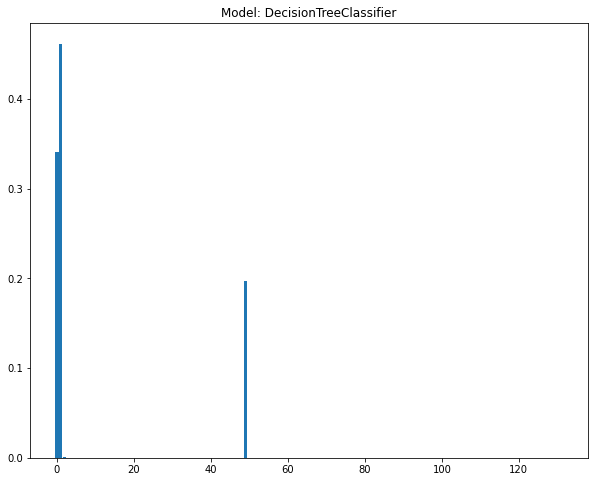



Model: RandomForestClassifier(class_weight='balanced', n_jobs=-1)

Feature importance using tree based models:


Feature  Importance
0                                           Maturidade    0.376288
1                                           Acabamento    0.231819
49                                       classificacao    0.153429
2                                                 Peso    0.041313
127                          Tipificacao_Macho Inteiro    0.034794
126                         Tipificacao_Macho Castrado    0.025155
125                                  Tipificacao_Fêmea    0.010789
29                                        Confinamento    0.007485
42                                  med12m_formITUinst    0.005615
40                                   med6m_formITUinst    0.005340
48                                   cnt12m_CL_ITUinst    0.004995
37                                   med3m_formITUinst    0.004423
21                            QuestionarioFabricaRacao    0.004339
38                                     med3m_preR_soja    0.004286
35                                      med7d_preR_boi    0.004226
43                                    med12m_preR_soja    0.004215
33                                     med7d_preR_soja    0.004168
36                                   med1m_formITUinst    0.004160
41                                    med6m_preR_milho    0.004122
32                                   med7d_formITUinst    0.004064
34                                    med7d_preR_milho    0.004003
39                                    med3m_preR_milho    0.003993
47                                    cnt6m_CL_ITUinst    0.003614
3                     QuestionarioClassificacaoEstabel    0.003488
25                                 rastreamento SISBOV    0.003059
18                                 ALTO_CONCENTR_VOLUM    0.002683
46                                    cnt3m_CL_ITUinst    0.002327
27                    participa de aliancas mercadolog    0.001877
8                                         CONCEN_VOLUM    0.001749
45                                    cnt1m_CL_ITUinst    0.001582
31                                    SemiConfinamento    0.001492
11                                            PROTEICO    0.001465
14                                         SAL_MINERAL    0.001423
28                    QuestionarioPraticaRecuperacaoPa    0.001387
12                                 PROTEICO_ENERGETICO    0.001368
16                               RACAOO_BAL_CONSUMO_IG    0.001267
24                            identificacao individual    0.001264
5                                                  ILP    0.001169
13                             RACAO_BAL_CONS_INFERIOR    0.001167
15                                    SALMINERAL_UREIA    0.000976
44                                    cnt7d_CL_ITUinst    0.000927
72            EstabelecimentoMunicipio_CHAPADAO DO SUL    0.000911
20                    QuestionarioPossuiOutrosIncentiv    0.000878
9                                         CREEPFEEDING    0.000872
4                                       FERTIIRRIGACAO    0.000717
109        EstabelecimentoMunicipio_RIBAS DO RIO PARDO    0.000685
10                                 FORN_ESTRAT_SILAGEM    0.000681
30                               Suplementacao_a_campo    0.000599
17                                        GRAO_INTEIRO    0.000597
87                  EstabelecimentoMunicipio_ITAQUIRAI    0.000555
118               EstabelecimentoMunicipio_SIDROLANDIA    0.000537
7                                                 ILPF    0.000532
75                    EstabelecimentoMunicipio_CORUMBA    0.000519
6                                                  IFP    0.000505
66                EstabelecimentoMunicipio_BRASILANDIA    0.000505
130                                           ANO_2019    0.000500
114       EstabelecimentoMunicipio_SANTA RITA DO PARDO    0.000498
94              EstabelecimentoMunicipio_LAGUNA CARAPA    0.000483
129                                           ANO_2018    0.000459
88                   Estabe

Figure bar-feature_importance_using_tree_based_models-RandomForestClassifier-05-01-2023_12:51:56.png saved in ./plots/ directory.


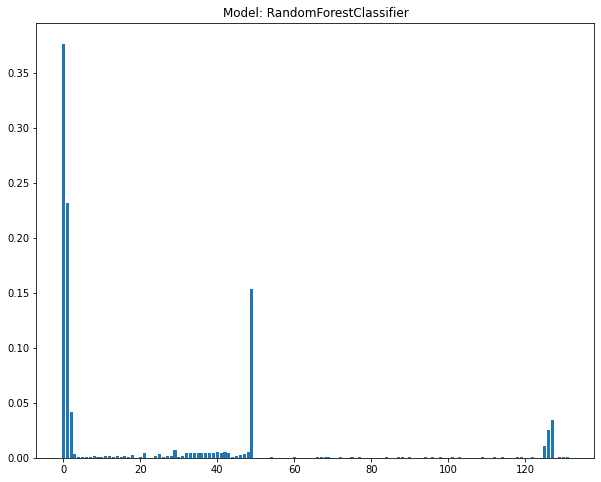

tcmalloc: large alloc 2685476864 bytes == 0x55c52ba9e000 @  0x7f9bdfdde887 0x7f9baffc2482 0x7f9baffc2a13 0x7f9baffc7c77 0x7f9bafff8eea 0x7f9baffb8575 0x7f9baff024f3 0x7f9bddfd19dd 0x7f9bddfd1067 0x7f9bddfebf96 0x7f9bddfec90c 0x55c472278da8 0x55c4722d76f8 0x55c4722a5768 0x55c472252e14 0x55c4722a5768 0x55c472252e14 0x55c4722a5066 0x55c4722a585f 0x55c472252cc7 0x55c4722a5381 0x55c4722a585f 0x55c472279ede 0x55c4722d8120 0x55c4722a5132 0x55c4722a585f 0x55c472290242 0x55c472291fef 0x55c4722afdea 0x55c47227a061 0x55c4722d8120
tcmalloc: large alloc 2685476864 bytes == 0x55c5d6a50000 @  0x7f9bdfdde887 0x7f9baffc2482 0x7f9baffc2dd0 0x7f9baffad18a 0x7f9baffea54b 0x7f9bb01630ab 0x7f9bb016e93b 0x7f9bb0020c80 0x7f9bb0021ae0 0x7f9bb005db72 0x7f9bafef7098 0x7f9bddfd19dd 0x7f9bddfd1067 0x7f9bddfebf96 0x7f9bddfec90c 0x55c472278da8 0x55c4722d76f8 0x55c4722a49c9 0x55c4722a585f 0x55c472253254 0x55c4722a5381 0x55c4722a585f 0x55c472279ede 0x55c4722d8120 0x55c4722a5132 0x55c4722a585f 0x55c472252cc7 0x55c4722a



Model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

Feature importance using tree based models:


Feature  Importance
49                                       classificacao    0.392760
0                                           Maturidade    0.310271
1                                           Acabamento    0.293617
2                                                 Peso    0.002382
125                                  Tipificacao_Fêmea    0.000533
127                          Tipificacao_Macho Inteiro    0.000209
94              EstabelecimentoMunicipio_LAGUNA CARAPA    0.000083
36                                   med1m_formITUinst    0.000051
126                         Tipificacao_Macho Castrado    0.000051
35                                      med7d_preR_boi    0.000014
41                                    med6m_preR_milho    0.000011
29                                        Confinamento    0.000009
33                                     med7d_preR_soja    0.000003
42                                  med12m_formITUinst    0.000001
39                                    med3m_preR_milho    0.000001
34                                    med7d_preR_milho    0.000001
16                               RACAOO_BAL_CONSUMO_IG    0.000001
48                                   cnt12m_CL_ITUinst    0.000000
129                                           ANO_2018    0.000000
5                                                  ILP    0.000000
40                                   med6m_formITUinst    0.000000
45                                    cnt1m_CL_ITUinst    0.000000
47                                    cnt6m_CL_ITUinst    0.000000
38                                     med3m_preR_soja    0.000000
37                                   med3m_formITUinst    0.000000
24                            identificacao individual    0.000000
28                    QuestionarioPraticaRecuperacaoPa    0.000000
31                                    SemiConfinamento    0.000000
18                                 ALTO_CONCENTR_VOLUM    0.000000
32                                   med7d_formITUinst    0.000000
46                                    cnt3m_CL_ITUinst    0.000000
12                                 PROTEICO_ENERGETICO    0.000000
43                                    med12m_preR_soja    0.000000
25                                 rastreamento SISBOV    0.000000
3                     QuestionarioClassificacaoEstabel    0.000000
130                                           ANO_2019    0.000000
11                                            PROTEICO    0.000000
21                            QuestionarioFabricaRacao    0.000000
14                                         SAL_MINERAL    0.000000
8                                         CONCEN_VOLUM    0.000000
128                                           ANO_2017    0.000000
102     EstabelecimentoMunicipio_NOVO HORIZONTE DO SUL    0.000000
101            EstabelecimentoMunicipio_NOVA ANDRADINA    0.000000
100      EstabelecimentoMunicipio_NOVA ALVORADA DO SUL    0.000000
99                    EstabelecimentoMunicipio_NIOAQUE    0.000000
98                    EstabelecimentoMunicipio_NAVIRAI    0.000000
97                 EstabelecimentoMunicipio_MUNDO NOVO    0.000000
96                    EstabelecimentoMunicipio_MIRANDA    0.000000
95                   EstabelecimentoMunicipio_MARACAJU    0.000000
93                       EstabelecimentoMunicipio_JUTI    0.000000
104                 EstabelecimentoMunicipio_PARANAIBA    0.000000
92                      EstabelecimentoMunicipio_JATEI    0.000000
91                     EstabelecimentoMunicipio_JARDIM    0.000000
90                  EstabelecimentoMunicipio_JARAGUARI    0.000000
89                     EstabelecimentoMunicipio_JAPORA    0.000000
88                   EstabelecimentoMunicipio_IVINHEMA    0.000000
87                  EstabelecimentoMunicipio_ITAQUIRAI    0.000000
86                    EstabelecimentoMunicipio_ITAPORA    0.000000
85                  EstabelecimentoMunicipio_INOCENCIA    0.000000
103         Estabelecimento

Figure bar-feature_importance_using_tree_based_models-XGBClassifier-05-01-2023_14:24:05.png saved in ./plots/ directory.


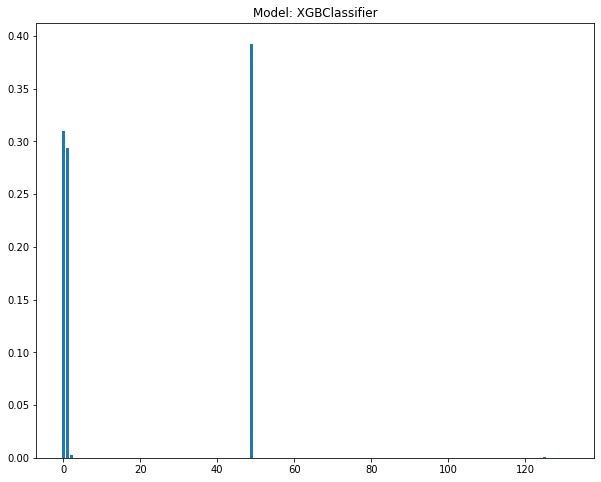

*****FIM IMPRIMIR FEATURE IMPORTANCE USING TREE BASED MODELS******
Function feature_importance_using_tree_based_models Took 1:41:01.764337



In [13]:
# Calculate feature importance with tree based models
reports.feature_importance_using_tree_based_models(
    data_frame=precoce_ms_data_frame,
    models=['decision_tree_classifier',
            'random_forest_classifier', 'xgb_classifier'],
    path_save_fig=settings.PATH_SAVE_PLOTS,
    display_figure=True,
    class_weight='balanced',
    n_jobs=settings.n_jobs
)


In [14]:
reports.informations(data_frame=precoce_ms_data_frame)


*****INICIO PRINT INFOS******
Número total de linhas do DataFrame: 2543061
Número de colunas: 133
Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543061 entries, 0 to 2543060
Data columns (total 133 columns):
 #    Column                                             Dtype  
---   ------                                             -----  
 0    Maturidade                                         uint8  
 1    Acabamento                                         uint8  
 2    Peso                                               float32
 3    QuestionarioClassificacaoEstabel                   uint8  
 4    FERTIIRRIGACAO                                     uint8  
 5    ILP                                                uint8  
 6    IFP                                                uint8  
 7    ILPF                                               uint8  
 8    CONCEN_VOLUM                                       uint8  
 9    CREEPFEEDING                            

## Calcule feature importance using permutation importance

--- It didn't work. I don't know why. ---

In [ ]:
# Calculate feature importance using permutation importance
# reports.feature_importance_using_permutation_importance(
#     data_frame=precoce_ms_data_frame,
#     models=['knneighbors_classifier', 'gaussian_nb'],
#     n_repeats=3,
#     n_jobs=settings.n_jobs,
#     path_save_fig=settings.PATH_SAVE_PLOTS,
#     display_figure=True,
# )


## Simulate sequential feature selector

### Sequential forward selection

In [ ]:
# Simulate sequential feature selector (SFS)
reports.simulate_sequential_feature_selector(
    data_frame=precoce_ms_data_frame,
    estimator=KNeighborsClassifier(),
    k_features=(3, (precoce_ms_data_frame.shape[1] - 1)),
    forward=True,
    floating=False,
    scoring='accuracy',
    cv=3,
    save_fig=True,
    path_save_fig=settings.PATH_SAVE_PLOTS,
    n_jobs=settings.n_jobs
)


*****INICIO SIMULATE SEQUENTIAL FEATURE SELECTOR******


### Sequential forward floating selection

In [ ]:
# Simulate sequential feature selector (SFFS)
reports.simulate_sequential_feature_selector(
    data_frame=precoce_ms_data_frame,
    estimator=KNeighborsClassifier(),
    k_features=(3, (precoce_ms_data_frame.shape[1] - 1)),
    forward=True,
    floating=True,
    scoring='accuracy',
    cv=3,
    save_fig=True,
    path_save_fig=settings.PATH_SAVE_PLOTS,
    n_jobs=settings.n_jobs
)

### Sequential backward selection

In [ ]:
# Simulate sequential feature selector (SBS)
reports.simulate_sequential_feature_selector(
    data_frame=precoce_ms_data_frame,
    estimator=KNeighborsClassifier(),
    k_features=(3, (precoce_ms_data_frame.shape[1] - 1)),
    forward=False,
    floating=False,
    scoring='accuracy',
    cv=3,
    save_fig=True,
    path_save_fig=settings.PATH_SAVE_PLOTS,
    n_jobs=settings.n_jobs
)

### Sequential backward floating selection

In [ ]:
# Simulate sequential feature selector (SBFS)
reports.simulate_sequential_feature_selector(
    data_frame=precoce_ms_data_frame,
    estimator=KNeighborsClassifier(),
    k_features=(3, (precoce_ms_data_frame.shape[1] - 1)),
    forward=False,
    floating=True,
    scoring='accuracy',
    cv=3,
    save_fig=True,
    path_save_fig=settings.PATH_SAVE_PLOTS,
    n_jobs=settings.n_jobs
)

## Simulate recursive feature elimination with cross validation

*****INICIO SIMULATE RECURSIVE FEATURE ELIMINATION CV******


tcmalloc: large alloc 1074192384 bytes == 0x56196798c000 @  0x7f2ef0d761e7 0x7f2eeeb20064 0x7f2eeeb207ff 0x7f2eeeb7ef55 0x7f2eeeb7f0b6 0x7f2eeec1176a 0x7f2eeec121cb 0x56196439119b 0x5619643e3da8 0x5619644426f8 0x561964410132 0x5619644107fb 0x5619643009fd 0x561964305ee3 0x5619643fabb4 0x56196441b9c0 0x56196443f245 0x561964410066 0x56196441085f 0x5619643bdcc7 0x561964410381 0x5619644107fb 0x5619643bde14 0x561964410066 0x56196441085f 0x5619643bde14 0x561964410132 0x5619644107fb 0x5619643e4ede 0x561964443120 0x56196440f9c9
tcmalloc: large alloc 1074192384 bytes == 0x5600b1d34000 @  0x7fdbf67dd1e7 0x7fdbf4587064 0x7fdbf45877ff 0x7fdbf45e5f55 0x7fdbf45e60b6 0x7fdbf467876a 0x7fdbf46791cb 0x5600aee3d19b 0x5600aee8fda8 0x5600aeeee6f8 0x5600aeebc132 0x5600aeebc7fb 0x5600aedac9fd 0x5600aedb1ee3 0x5600aeea6bb4 0x5600aeec79c0 0x5600aeeeb245 0x5600aeebc066 0x5600aeebc85f 0x5600aee69cc7 0x5600aeebc381 0x5600aeebc7fb 0x5600aee69e14 0x5600aeebc066 0x5600aeebc85f 0x5600aee69e14 0x5600aeebc132 0x5600aeeb

Column: Maturidade, Selected True, Rank: 1.000
Column: Acabamento, Selected True, Rank: 1.000
Column: Peso, Selected True, Rank: 1.000
Column: QuestionarioClassificacaoEstabel, Selected False, Rank: 15.000
Column: FERTIIRRIGACAO, Selected False, Rank: 13.000
Column: ILP, Selected False, Rank: 12.000
Column: IFP, Selected False, Rank: 11.000
Column: ILPF, Selected False, Rank: 10.000
Column: CONCEN_VOLUM, Selected False, Rank: 17.000
Column: CREEPFEEDING, Selected False, Rank: 19.000
Column: FORN_ESTRAT_SILAGEM, Selected False, Rank: 21.000
Column: PROTEICO, Selected False, Rank: 23.000
Column: PROTEICO_ENERGETICO, Selected False, Rank: 25.000
Column: RACAO_BAL_CONS_INFERIOR, Selected False, Rank: 27.000
Column: SAL_MINERAL, Selected False, Rank: 29.000
Column: SALMINERAL_UREIA, Selected False, Rank: 31.000
Column: RACAOO_BAL_CONSUMO_IG, Selected False, Rank: 33.000
Column: GRAO_INTEIRO, Selected False, Rank: 35.000
Column: ALTO_CONCENTR_VOLUM, Selected False, Rank: 37.000
Column: ALTO_

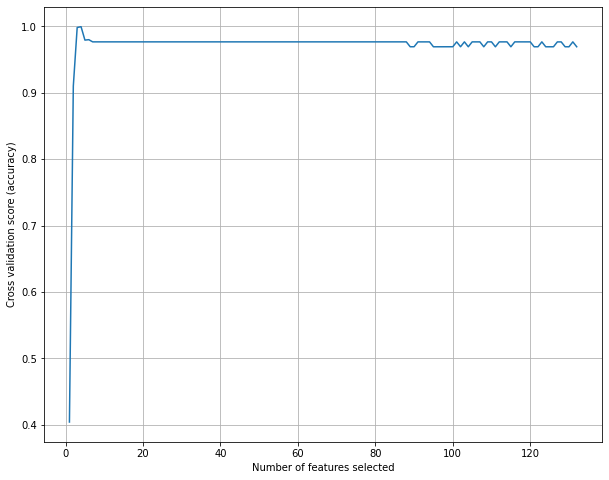

*****FIM SIMULATE RECURSIVE FEATURE ELIMINATION CV******

Function simulate_recursive_feature_elimination_with_cv Took 2:13:04.463241



In [15]:
reports.simulate_recursive_feature_elimination_with_cv(
    data_frame=precoce_ms_data_frame,
    estimator=DecisionTreeClassifier(),
    scoring='accuracy',
    n_jobs=settings.n_jobs,
    save_fig=True,
    path_save_fig=settings.PATH_SAVE_PLOTS
)